# Comparing Genes across the tools for UC & RA

## 0. Set Up & Read in data

In [2]:
library(tidyverse)
library (plyr)
library(data.table)
library(glue)
library(ggrepel)
library(cowplot)
#library(reshape2)

In [40]:
ra_scdrs_genes[ra_scdrs_genes$V1 %in% c("MERTK", "GAS6", "PROS1", "PTK2", "TIM", "RAC1", "SPP1", "SELP", "LYVE1", "HBEGF", "LAMP3", "S100A8"),]
ra_scpagwas_genes[ra_scpagwas_genes$V1 %in% c("MERTK", "GAS6", "PROS1", "PTK2", "TIM", "RAC1", "SPP1", "SELP", "LYVE1", "HBEGF", "LAMP3", "S100A8"),]


ra_magma_genes_5035[ra_magma_genes_5035$GENE %in% c("MERTK", "GAS6", "PROS1", "PTK2", "TIM", "RAC1", 
                                                   "SPP1", "SELP", "LYVE1", "HBEGF", "LAMP3", "S100A8"),]

V1     CORR        RANK 
1  LYVE1   0.13125871   653
2  MERTK   0.12150657   768
3  S100A8  0.11547457   866
4  SPP1    0.03942999  3662
5  LAMP3   0.03379869  4164
6  HBEGF  -0.02752125 17994
7  RAC1   -0.06326698 20475
8  PTK2   -0.15715143 22411
9  SELP   -0.17418530 22591
10 GAS6   -0.18442988 22675
11 PROS1  -0.28915122 23145

V1     PCC          RANK  RANK_abs
1  RAC1   -0.497219156 33522    15   
2  S100A8 -0.320817504 33377   184   
3  SPP1   -0.210120401 33201   509   
4  GAS6   -0.198320597 33170   585   
5  LYVE1  -0.193050267 33153   616   
6  HBEGF  -0.182280164 33119   697   
7  MERTK  -0.113443822 32774  2180   
8  PROS1  -0.077907779 32475  5120   
9  SELP    0.025999056 10014 11782   
10 PTK2    0.013101012 12783 14924   
11 LAMP3  -0.004847079 30936 19829

GENE   RA     
1 PROS1  0.10646
2 GAS6   0.13442
3 LYVE1  0.15792
4 MERTK  0.20592
5 HBEGF  0.52797
6 PTK2   0.65802
7 LAMP3  0.73911
8 S100A8 0.74420

In [3]:
# read in scGWAS gene modules
out_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/scGWAS/"
ra_scgwas_results <- fread(paste0(out_dir, "RA_signif_clusters_2023.sig_module.txt"))
ra_scgwas_results[1:2,]
dim(ra_scgwas_results)
# read in scDRS gene scores
dir <- "/Users/hopekirby/Downloads/scpgwas/scdrs/RA/RA_10kb/"
ra_scdrs_genes <- fread(paste0(dir, "RA.scdrs_gene"))
ra_scdrs_genes[1:2,]
dim(ra_scdrs_genes)
# read in scpagwas genes
ra_scpagwas_genes <- fread("/Users/hopekirby/Downloads/scpgwas/RA_output_micro_subset/micro_white_subset_10.21.24_gene_PCC.csv")
ra_scpagwas_genes[1:2,]
dim(ra_scpagwas_genes)
# get rankings
ra_scpagwas_genes <- ra_scpagwas_genes[order(-ra_scpagwas_genes$PCC),]
ra_scpagwas_genes$RANK = seq(0, nrow(ra_scpagwas_genes)-1)
ra_scpagwas_genes <- ra_scpagwas_genes[order(-abs(ra_scpagwas_genes$PCC)),]
ra_scpagwas_genes$RANK_abs = seq(0, nrow(ra_scpagwas_genes)-1)
ra_scpagwas_genes[1:2,]
length(intersect(ra_scpagwas_genes$V1, ra_scdrs_genes$V1))

module_genes                seed   edges                      module_score
1 DDX6:JUN:REL                ZC3H15 113337:113292               9.019003   
2 CD79B:IKZF3:PTPRC:REL:STAT1 ZC3H18 73363:269622:187528:187544 10.421933   
  m_gwas   m_scrnaseq module_score_z z_gwas   z_scrnaseq
1 6.152196 4.227660   3.129591       2.000352 2.360476  
2 7.581322 4.804278   2.880466       1.869148 1.975298  
  cell_type                  trait panel   p           p_gwas     p_scrn    
1 B-2: IgM+IgD+TCL1A+ naive  RA    amp2_RA 0.001178055 0.04543925 0.01279031
2 B-3: IgM+IgD+CD1c+ MZ-like RA    amp2_RA 0.001849672 0.04792332 0.02791323

[1] 124  15

V1     CORR      RANK
1 PTPRC  0.4918608 0   
2 LAPTM5 0.4444338 1

[1] 23341     3

V1          PCC
1 MIR1302-2HG 0  
2 FAM138A     0

[1] 33538     2

V1    PCC        RANK  RANK_abs
1 CST3  -0.5816643 33537 0       
2 ANXA2 -0.5480286 33536 1

[1] 23341

In [4]:
# read in scGWAS gene modules
out_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/scGWAS/UC/"
uc_scgwas_results <- fread(paste0(out_dir, "UC_signif_clusters.sig_module.txt"))
uc_scgwas_results[1:2,]
dim(uc_scgwas_results)
# read in scDRS gene scores
dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/SCDRS/UC_10_dec/"
uc_scdrs_genes <- fread(paste0(dir, "UC.scdrs_gene"))
uc_scdrs_genes[1:2,]
dim(uc_scdrs_genes)
# read in scpagwas genes
uc_scpagwas_genes <- fread("~/Downloads//scpgwas/UC_output_micro//UCmicro_white_10.22.24_gene_PCC.csv")
# get rankings
uc_scpagwas_genes <- uc_scpagwas_genes[order(-uc_scpagwas_genes$PCC),]
uc_scpagwas_genes$RANK = seq(0, nrow(uc_scpagwas_genes)-1)
uc_scpagwas_genes <- uc_scpagwas_genes[order(-abs(uc_scpagwas_genes$PCC)),]
uc_scpagwas_genes$RANK_abs = seq(0, nrow(uc_scpagwas_genes)-1)
uc_scpagwas_genes[1:2,]
dim(uc_scpagwas_genes)
length(intersect(uc_scpagwas_genes$V1, uc_scdrs_genes$V1))

module_genes      seed   edges       module_score m_gwas   m_scrnaseq
1 CLDN3:CLDN4:PARK7 SMYD2  38854:38904 7.702989     5.679359 3.537883  
2 CLDN3:CLDN4:PARK7 ARPC5L 38854:38904 7.976879     5.449464 3.737767  
  module_score_z z_gwas   z_scrnaseq cell_type       trait panel     
1 2.832472       2.254308 1.761050   Enteroendocrine UC    Similie_UC
2 2.726836       2.079764 1.982617   M cells         UC    Similie_UC
  p           p_gwas     p_scrn    
1 0.003988036 0.02592223 0.04885344
2 0.015763547 0.03152709 0.03546798

[1]  2 15

V1    CORR      RANK
1 IGLC7 0.2578454 0   
2 IGLL1 0.2035864 1

[1] 18010     3

V1    PCC       RANK RANK_abs
1 RPS24 0.5553919 0    0       
2 RPL23 0.3940468 1    1

[1] 18172     4

[1] 18006

## 1. Reorganize scGWAS gene modules for comparison with scDRS

In [5]:
# have each cell type: genes for scgwas
ra_cell_gene_dict = list()
ra_cell_cluster_list = list()
ra_cell_gene_list = list()
for (cluster in unique(ra_scgwas_results$cell_type)) {
    # get only the gene modules for cell type
    filtered <- ra_scgwas_results[ra_scgwas_results$cell_type == cluster,]
    ra_cell_gene_dict[cluster] = list(c(do.call(c, strsplit(filtered$module_genes, split = ":")), 
                                    filtered$seed))
    ra_cell_cluster_list <- append(ra_cell_cluster_list, cluster)
    ra_cell_gene_list <- append(ra_cell_gene_list, 
                             list(c(do.call(c, strsplit(filtered$module_genes, split = ":")), 
                                    filtered$seed)))
    }
ra_cell_gene_dict[cluster]

# have each cell type: genes for scgwas
uc_cell_gene_dict = list()
uc_cell_cluster_list = list()
uc_cell_gene_list = list()
for (cluster in unique(uc_scgwas_results$cell_type)) {
    # get only the gene modules for cell type
    filtered <- uc_scgwas_results[uc_scgwas_results$cell_type == cluster,]
    uc_cell_gene_dict[cluster] = list(c(do.call(c, strsplit(filtered$module_genes, split = ":")), 
                                    filtered$seed))
    uc_cell_cluster_list <- append(uc_cell_cluster_list, cluster)
    uc_cell_gene_list <- append(uc_cell_gene_list, 
                             list(c(do.call(c, strsplit(filtered$module_genes, split = ":")), 
                                    filtered$seed)))
    }
uc_cell_gene_dict[cluster]

$`T-9: CD4+ CD25-low Treg`
 [1] "CD2"     "CD247"   "CORO1A"  "CTLA4"   "ETS1"    "PTPRC"   "CD2"    
 [8] "CORO1A"  "CTLA4"   "ETS1"    "LCK"     "PTPRC"   "CD2"     "CORO1A" 
[15] "DDX6"    "ETS1"    "JUN"     "CD2"     "DDX6"    "PTPRC"   "REL"    
[22] "CORO1A"  "ETS1"    "HCST"    "REL"     "MED17"   "TSPAN17" "ASCL2"  
[29] "TMEM91"  "HCST"

$`M cells`
[1] "CLDN3"  "CLDN4"  "PARK7"  "ARPC5L"

In [6]:
ra_cell_gene_df <- ldply(ra_cell_cluster_list, data.frame)
colnames(ra_cell_gene_df) <- c("cluster")
ra_cell_gene_df$genes <- ra_cell_gene_list

ra_cell_gene_df <- ra_cell_gene_df %>% unnest_wider(genes, names_sep="_")
ra_cell_gene_df[1:4,]

uc_cell_gene_df <- ldply(uc_cell_cluster_list, data.frame)
colnames(uc_cell_gene_df) <- c("cluster")
uc_cell_gene_df$genes <- uc_cell_gene_list

uc_cell_gene_df <- uc_cell_gene_df %>% unnest_wider(genes, names_sep="_")
uc_cell_gene_df[1:4,]

cluster                    genes_1 genes_2 genes_3 genes_4 genes_5 genes_6
1 B-2: IgM+IgD+TCL1A+ naive  DDX6    JUN     REL     ZC3H15  NA      NA     
2 B-3: IgM+IgD+CD1c+ MZ-like CD79B   IKZF3   PTPRC   REL     STAT1   ZC3H18 
3 B-4: AICDA+BCL6+ GC-like   CORO1A  EIF3A   ETS1    REL     NOL10   NA     
4 M-11: CD16+/DC4            ACTR2   CORO1A  FCGR2A  FCGR3A  RAC2    RAC2   
  genes_7 genes_8 genes_9 ⋯ genes_66 genes_67 genes_68 genes_69 genes_70
1 NA      NA      NA      ⋯ NA       NA       NA       NA       NA      
2 NA      NA      NA      ⋯ NA       NA       NA       NA       NA      
3 NA      NA      NA      ⋯ NA       NA       NA       NA       NA      
4 NA      NA      NA      ⋯ NA       NA       NA       NA       NA      
  genes_71 genes_72 genes_73 genes_74 genes_75
1 NA       NA       NA       NA       NA      
2 NA       NA       NA       NA       NA      
3 NA       NA       NA       NA       NA      
4 NA       NA       NA       NA       NA

cluster         genes_1 genes_2 genes_3 genes_4
1 Enteroendocrine CLDN3   CLDN4   PARK7   SMYD2  
2 M cells         CLDN3   CLDN4   PARK7   ARPC5L 
3 NA              NA      NA      NA      NA     
4 NA              NA      NA      NA      NA

In [7]:
ra_cell_gene_dict[["NK-8: CD56bright CD16- IFN response"]]

[1] "CORO1A"  "ETS1"    "JAK1"    "PTPRC"   "STAT1"   "TNFAIP3" "CD2"    
 [8] "CDC42"   "IL2RB"   "PTPRC"   "STAT1"   "TNFAIP3" "CD2"     "IL2RB"  
[15] "JAK1"    "PTPRC"   "STAT1"   "TNFAIP3" "CORO1A"  "ETS1"    "GATA3"  
[22] "PTPRC"   "STAT1"   "TNFAIP3" "CD2"     "CD247"   "CFLAR"   "CORO1A" 
[29] "ETS1"    "IL2RB"   "CORO1A"  "ETS1"    "PTPRC"   "STAT1"   "STK4"   
[36] "TNFAIP3" "CD2"     "IL2RB"   "PTPRC"   "STAT1"   "TNFAIP3" "CORO1A" 
[43] "ETS1"    "PTPRC"   "STAT1"   "TNFAIP3" "UBE2I"   "CD2"     "CD247"  
[50] "CORO1A"  "ETS1"    "RAC2"    "TAGAP"   "CD2"     "LMNA"    "PTPRC"  
[57] "RTF1"    "STAT1"   "TNFAIP3" "CD2"     "CD247"   "IL2RB"   "STAT1"  
[64] "TNFAIP3" "PCBD1"   "NOL10"   "TXNL4A"  "MED11"   "AMBRA1"  "SRP54"  
[71] "JTB"     "UBE2I"   "WDR4"    "PKD2"    "COX5B"

### Make a dataframe to hold all the info

In [8]:
# have each cell type: genes
ra_cell_cluster_list = list()
ra_cell_gene_list = list()
for (cluster in names(ra_cell_gene_dict)) {
    ra_cell_cluster_list <- append(ra_cell_cluster_list, rep(cluster, length(unlist(ra_cell_gene_dict[cluster]))))
    for (gene in ra_cell_gene_dict[cluster]) {
        ra_cell_gene_list <- append(ra_cell_gene_list, gene)
        }
    }
length(ra_cell_cluster_list)
length(ra_cell_gene_list)
ra_df <- ldply (ra_cell_cluster_list, data.frame)
colnames(ra_df) <- c("cluster")
ra_df$genes <- ra_cell_gene_list

ra_df[1:4,]

# have each cell type: genes
uc_cell_cluster_list = list()
uc_cell_gene_list = list()
for (cluster in names(uc_cell_gene_dict)) {
    uc_cell_cluster_list <- append(uc_cell_cluster_list, rep(cluster, length(unlist(uc_cell_gene_dict[cluster]))))
    for (gene in uc_cell_gene_dict[cluster]) {
        uc_cell_gene_list <- append(uc_cell_gene_list, gene)
        }
    }
length(uc_cell_cluster_list)
length(uc_cell_gene_list)
uc_df <- ldply (uc_cell_cluster_list, data.frame)
colnames(uc_df) <- c("cluster")
uc_df$genes <- uc_cell_gene_list

uc_df[1:4,]

[1] 697

[1] 697

cluster                   genes 
1 B-2: IgM+IgD+TCL1A+ naive DDX6  
2 B-2: IgM+IgD+TCL1A+ naive JUN   
3 B-2: IgM+IgD+TCL1A+ naive REL   
4 B-2: IgM+IgD+TCL1A+ naive ZC3H15

[1] 8

[1] 8

cluster         genes
1 Enteroendocrine CLDN3
2 Enteroendocrine CLDN4
3 Enteroendocrine PARK7
4 Enteroendocrine SMYD2

## 2. Add scDRS & scPagwas correlation scores to scGWAS genes

In [9]:
ra_scpagwas_genes[1:2,]

V1    PCC        RANK  RANK_abs
1 CST3  -0.5816643 33537 0       
2 ANXA2 -0.5480286 33536 1

In [10]:
# add scDRS scores
# make a dictionary with the scDRS scores
ra_scdrs_genes[1:2,]
ra_scdrs_gene_corr <- ra_scdrs_genes$CORR
names(ra_scdrs_gene_corr) <- ra_scdrs_genes$V1
ra_scdrs_gene_rank <- ra_scdrs_genes$RANK
names(ra_scdrs_gene_rank) <- ra_scdrs_genes$V1
# make a dictionary with the scPagwas scores
ra_scpagwas_gene_corr <- ra_scpagwas_genes$PCC
names(ra_scpagwas_gene_corr) <- ra_scpagwas_genes$V1
ra_scpagwas_gene_rank <- ra_scpagwas_genes$RANK
names(ra_scpagwas_gene_rank) <- ra_scpagwas_genes$V1
# add this to them
rank_list = list(); sp_rank_list = list()
corr_list = list(); sp_corr_list = list()
for (gene in ra_df$genes) {
    rank_list <- c(rank_list, ra_scdrs_gene_rank[gene])
    corr_list <- c(corr_list, ra_scdrs_gene_corr[gene])
    sp_rank_list <- c(sp_rank_list, ra_scpagwas_gene_rank[gene])
    sp_corr_list <- c(sp_corr_list, ra_scpagwas_gene_corr[gene])
    }
# add to the dataframe
ra_df$scdrs_rank <- rank_list
ra_df$scdrs_corr <- corr_list
ra_df$scgpwas_rank <- sp_rank_list
ra_df$scgpwas_corr <- sp_corr_list
ra_df[1:4,]


# add scDRS scores
# make a dictionary with the scDRS scores
uc_scdrs_genes[1:2,]
uc_scdrs_gene_corr <- uc_scdrs_genes$CORR
names(uc_scdrs_gene_corr) <- uc_scdrs_genes$V1
uc_scdrs_gene_rank <- uc_scdrs_genes$RANK
names(uc_scdrs_gene_rank) <- uc_scdrs_genes$V1
# make a dictionary with the scPagwas scores
uc_scpagwas_gene_corr <- uc_scpagwas_genes$PCC
names(uc_scpagwas_gene_corr) <- uc_scpagwas_genes$V1
uc_scpagwas_gene_rank <- uc_scpagwas_genes$RANK
names(uc_scpagwas_gene_rank) <- uc_scpagwas_genes$V1
# add this to them
rank_list = list(); sp_rank_list = list()
corr_list = list(); sp_corr_list = list()
for (gene in uc_df$genes) {
    rank_list <- c(rank_list, uc_scdrs_gene_rank[gene])
    corr_list <- c(corr_list, uc_scdrs_gene_corr[gene])
    sp_rank_list <- c(sp_rank_list, uc_scpagwas_gene_rank[gene])
    sp_corr_list <- c(sp_corr_list, uc_scpagwas_gene_corr[gene])
    }
# add to the dataframe
uc_df$scdrs_rank <- rank_list
uc_df$scdrs_corr <- corr_list
uc_df$scgpwas_rank <- sp_rank_list
uc_df$scgpwas_corr <- sp_corr_list

uc_df[1:4,]

V1     CORR      RANK
1 PTPRC  0.4918608 0   
2 LAPTM5 0.4444338 1

cluster                   genes  scdrs_rank scdrs_corr scgpwas_rank
1 B-2: IgM+IgD+TCL1A+ naive DDX6   666        0.1297841  251         
2 B-2: IgM+IgD+TCL1A+ naive JUN    3078       0.04740428 30205       
3 B-2: IgM+IgD+TCL1A+ naive REL    18         0.3354952  6840        
4 B-2: IgM+IgD+TCL1A+ naive ZC3H15 4957       0.0260538  3304        
  scgpwas_corr 
1 0.1889613    
2 -0.0009513823
3 0.05309148   
4 0.08551945

V1    CORR      RANK
1 IGLC7 0.2578454 0   
2 IGLL1 0.2035864 1

cluster         genes scdrs_rank scdrs_corr   scgpwas_rank scgpwas_corr
1 Enteroendocrine CLDN3 29         0.1206359    474          0.09405703  
2 Enteroendocrine CLDN4 23         0.1227653    981          0.06199557  
3 Enteroendocrine PARK7 3672       0.01299783   521          0.08925593  
4 Enteroendocrine SMYD2 8289       0.0005338179 9827         0.005753914

In [11]:
# ensure all are the right format
ra_df$genes <- as.character(ra_df$genes)
ra_df$scdrs_rank <- as.numeric(ra_df$scdrs_rank)
ra_df$scdrs_corr <- as.numeric(ra_df$scdrs_corr)
ra_df$scgpwas_rank <- as.numeric(ra_df$scgpwas_rank)
ra_df$scgpwas_corr <- as.numeric(ra_df$scgpwas_corr)

uc_df$genes <- as.character(uc_df$genes)
uc_df$scdrs_rank <- as.numeric(uc_df$scdrs_rank)
uc_df$scdrs_corr <- as.numeric(uc_df$scdrs_corr)
uc_df$scgpwas_rank <- as.numeric(uc_df$scgpwas_rank)
uc_df$scgpwas_corr <- as.numeric(uc_df$scgpwas_corr)

### Compare the top genes
* scGWAS significant gene modules
* scDRS and scPagwas top 1000 correlated genes to disease scores or gPAS, respectively
* MAGMA top 1000 genes

In [56]:
# read in magma used
ra_magma_genes_5035 <- fread("~/Desktop/SCRNA-GWAS-Benchmarking/output/MAGMA/RA/RA_5035_Pval_2023_06_13.tsv")
uc_magma_genes_5035 <- fread("~/Desktop/SCRNA-GWAS-Benchmarking/output/MAGMA/UC/UC_53kb_Pval_onlyinrna_nodups_12-20-23.tsv")
ra_magma_genes_5035 <- fread("~/Desktop/SCRNA-GWAS-Benchmarking/output/MAGMA/RA/RA_10kb_Pval_onlyinrna_nodups_07-09-23.tsv")
uc_magma_genes_5035 <- fread("~/Desktop/SCRNA-GWAS-Benchmarking/output/MAGMA/UC/UC_10kb_Pval_onlyinrna_nodups_12-22-23.tsv")
ra_magma_genes_5035[1:5,]
uc_magma_genes_5035[1:5,]

GENE    RA        
1 COG6    7.0940e-16
2 ANKRD55 2.7264e-15
3 SPRED2  6.0120e-15
4 MAGI3   6.2135e-15
5 AP4B1   1.4988e-14

GENE       UC        
1 IFNG-AS1   7.4818e-17
2 APEH       3.8858e-16
3 GPX1       4.9960e-16
4 CTB-13F3.1 8.8818e-16
5 AMT        1.4988e-15

V1   PCC          RANK  RANK_abs
1 7SK  -0.006141705 16430 11289   
2 A1BG  0.009412774  7557  8887

pdf 
  2

$ScGWAS
[1] 8

$scDRS
[1] 1000

$scPagwas
[1] 1000

$MAGMA
[1] 1000

pdf 
  2

$ScGWAS
[1] 697

$scDRS
[1] 1000

$scPagwas
[1] 1000

$MAGMA
[1] 1000

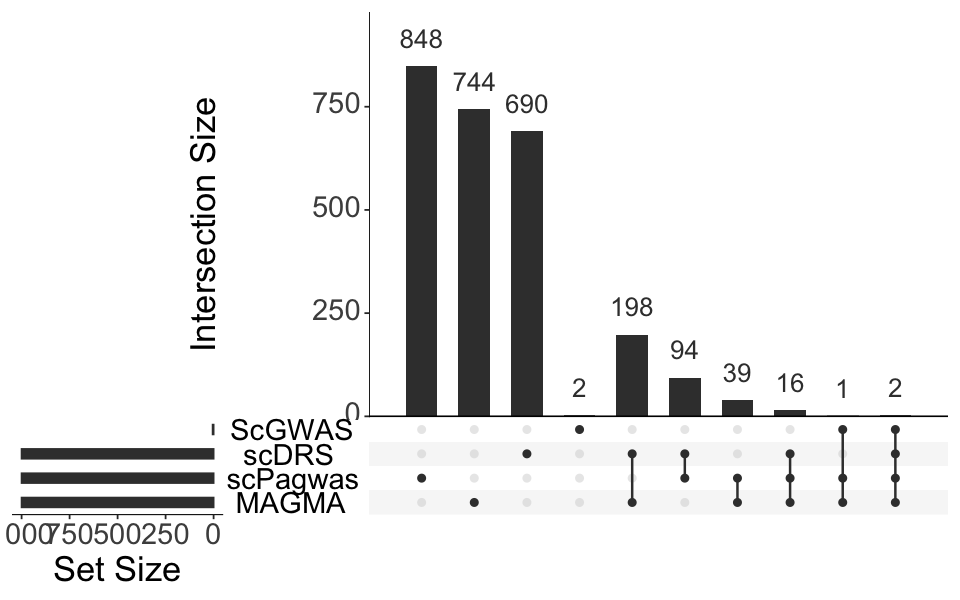

In [177]:
options(repr.plot.height=5, repr.plot.width=8)
uc_scpagwas_genes[1:2,]
uc_top_gene_list = list("ScGWAS"=uc_df$genes, "scDRS"=uc_scdrs_genes[uc_scdrs_genes$RANK < 1000,]$V1, "scPagwas"=uc_scpagwas_genes[uc_scpagwas_genes$RANK < 1000,]$V1, "MAGMA"=uc_magma_genes_5035$GENE[1:1000])
png("UC_gene_comp_UpSet.png", width=8, height=5, units="in", res=300)
upset(fromList(uc_top_gene_list), nsets=4, text.scale=2.5)
dev.off()
upset(fromList(uc_top_gene_list), nsets=4, text.scale=2.5)
lapply(uc_top_gene_list, length)
# Percentages unique: 25%, 69%, 85%, 74%
ra_top_gene_list = list("ScGWAS"=ra_df$genes, "scDRS"=ra_scdrs_genes[ra_scdrs_genes$RANK < 1000,]$V1, "scPagwas"=ra_scpagwas_genes[ra_scpagwas_genes$RANK < 1000,]$V1, "MAGMA"=ra_magma_genes_5035$GENE[1:1000])
png("RA_gene_comp_UpSet.png", width=8, height=5, units="in", res=300)
upset(fromList(ra_top_gene_list), nsets=4, text.scale=2.5)

dev.off()
lapply(ra_top_gene_list, length)
# Percentages unique: 10%, 59%, 62%, 82%

## 4. Vizualize scGWAS & MAGMA scores as Distribution based graphs 

In [13]:
# first see if any of the MAGMA or scGWAS genes aren't  in scGWAS or scDRS
scg_noscp <- setdiff(uc_df$genes, uc_scpagwas_genes$V1)
length(scg_noscp)
scg_noscp <- setdiff(uc_df$genes, uc_scdrs_genes$V1)
length(scg_noscp)
mag_noscp <- setdiff(uc_magma_genes_5035$GENE[1:1000], uc_scpagwas_genes$V1)
length(mag_noscp)
mag_noscp <- setdiff(uc_magma_genes_5035$GENE[1:1000], uc_scdrs_genes$V1)
length(mag_noscp)

scg_noscp <- setdiff(ra_df$genes, ra_scpagwas_genes$V1)
length(scg_noscp)
scg_noscp <- setdiff(ra_df$genes, ra_scdrs_genes$V1)
length(scg_noscp)
mag_noscp <- setdiff(ra_magma_genes_5035$GENE[1:1000], ra_scpagwas_genes$V1)
length(mag_noscp)
mag_noscp <- setdiff(ra_magma_genes_5035$GENE[1:1000], ra_scdrs_genes$V1)
length(mag_noscp)

[1] 0

[1] 0

[1] 0

[1] 5

[1] 0

[1] 0

[1] 0

[1] 75

In [14]:
uc_scpagwas_genes <- uc_scpagwas_genes[uc_scpagwas_genes$V1 %in% intersect(uc_scpagwas_genes$V1, uc_scdrs_genes$V1),]
uc_scdrs_genes <- uc_scdrs_genes[uc_scdrs_genes$V1 %in% intersect(uc_scpagwas_genes$V1, uc_scdrs_genes$V1),]

uc_scdrs_genes <- uc_scdrs_genes[order(uc_scdrs_genes$V1),]
uc_scpagwas_genes <- uc_scpagwas_genes[order(uc_scpagwas_genes$V1),]
identical(uc_scpagwas_genes$V1, uc_scdrs_genes$V1)

ra_scpagwas_genes <- ra_scpagwas_genes[ra_scpagwas_genes$V1 %in% intersect(ra_scpagwas_genes$V1, ra_scdrs_genes$V1),]
ra_scdrs_genes <- ra_scdrs_genes[ra_scdrs_genes$V1 %in% intersect(ra_scpagwas_genes$V1, ra_scdrs_genes$V1),]

ra_scdrs_genes <- ra_scdrs_genes[order(ra_scdrs_genes$V1),]
ra_scpagwas_genes <- ra_scpagwas_genes[order(ra_scpagwas_genes$V1),]
identical(ra_scpagwas_genes$V1, ra_scdrs_genes$V1)

[1] TRUE

[1] TRUE

In [15]:
uc_scdrs_genes[1:2,]
uc_scpagwas_genes[1:2,]

ra_scdrs_genes[1:2,]
ra_scpagwas_genes[1:2,]

V1   CORR         RANK 
1 7SK   0.006709491  5290
2 A1BG -0.005362581 11691

V1   PCC          RANK  RANK_abs
1 7SK  -0.006141705 16430 11289   
2 A1BG  0.009412774  7557  8887

V1       CORR       RANK
1 A1BG     0.06943079 1986
2 A1BG-AS1 0.04529962 3215

V1       PCC        RANK RANK_abs
1 A1BG     0.11207905 1474 2248    
2 A1BG-AS1 0.05286374 6863 8172

In [16]:
uc_graph_df <- data.table("gene"=uc_scdrs_genes$V1, "scdrs"=uc_scdrs_genes$CORR,
                          "scpgwas"=uc_scpagwas_genes$PCC)
uc_graph_df[1:2,]

ra_graph_df <- data.table("gene"=ra_scdrs_genes$V1, "scdrs"=ra_scdrs_genes$CORR,
                          "scpgwas"=ra_scpagwas_genes$PCC)
ra_graph_df[1:2,]

gene scdrs        scpgwas     
1 7SK   0.006709491 -0.006141705
2 A1BG -0.005362581  0.009412774

gene     scdrs      scpgwas   
1 A1BG     0.06943079 0.11207905
2 A1BG-AS1 0.04529962 0.05286374

pdf 
  2

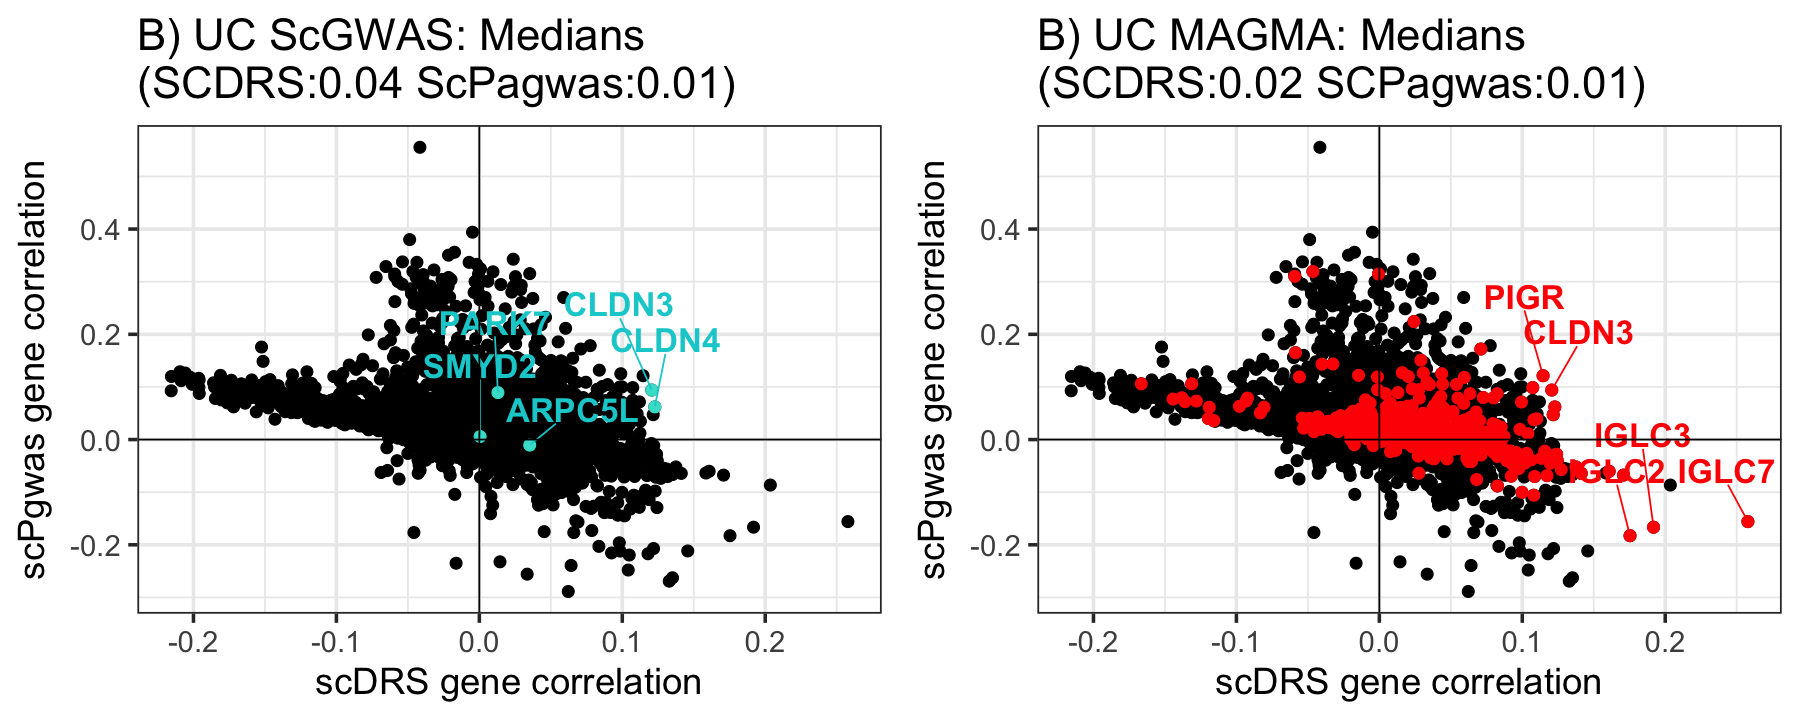

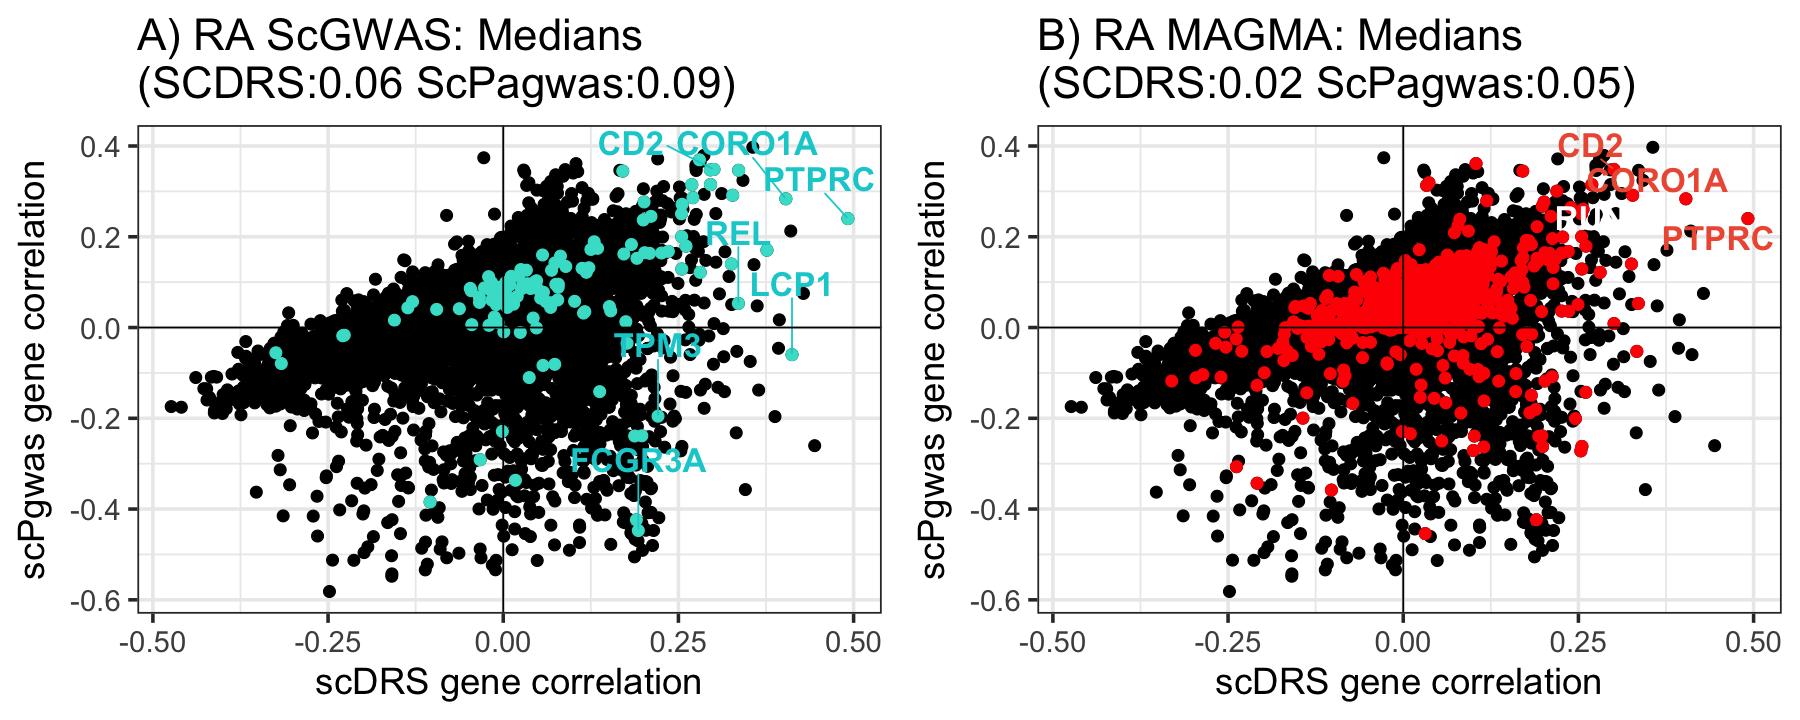

In [161]:
p1 <- ggplot(data=uc_graph_df, aes(x=scdrs, y=scpgwas)) + geom_point(size=3) + 
geom_point(data=uc_graph_df[uc_graph_df$gene %in% uc_df$genes], color="turquoise", size=3) + 
labs(x="scDRS gene correlation", y="scPgwas gene correlation") + 
ggtitle(paste0("B) UC ScGWAS") + #: Medians\n(SCDRS:", round(median(uc_graph_df[uc_graph_df$gene %in% uc_df$genes]$scdrs),2), 
       #" ScPagwas:", round(median(uc_graph_df[uc_graph_df$gene %in% uc_magma_genes_5035$GENE[1:100]]$scpgwas),2), ")")) +geom_text_repel(data=uc_graph_df[uc_graph_df$gene %in% uc_df$genes],
                aes(label=gene), vjust=-2.5, size=7, fontface="bold", color="darkturquoise") +
theme_bw(base_size=22) + geom_vline(xintercept=0) + geom_hline(yintercept=0)

p2 <- ggplot(data=uc_graph_df, aes(x=scdrs, y=scpgwas)) + geom_point(size=3) + 
geom_point(data=uc_graph_df[uc_graph_df$gene %in% uc_magma_genes_5035$GENE[1:1000]], color="red", size=3) + 
labs(x="scDRS gene correlation", y="scPgwas gene correlation") + 
ggtitle(paste0("B) UC MAGMA") + #: Medians\n(SCDRS:", round(median(uc_graph_df[uc_graph_df$gene %in% uc_magma_genes_5035$GENE[1:1000]]$scdrs),2), 
       #" SCPagwas:", round(median(uc_graph_df[uc_graph_df$gene %in% uc_magma_genes_5035$GENE[1:1000]]$scpgwas),2), ")")) +

geom_text_repel(data=uc_graph_df[uc_graph_df$gene %in% c("PIGR", "CLDN3", "IGLC7", "IGLC3", 'IGLC2')],
                aes(label=gene), vjust=-2.5, size=7, fontface="bold", color="red") +
theme_bw(base_size=22) + geom_vline(xintercept=0) + geom_hline(yintercept=0)

# IL7R PTPRC
p3 <- ggplot(data=ra_graph_df, aes(x=scdrs, y=scpgwas)) + geom_point(size=3) + 
geom_point(data=ra_graph_df[ra_graph_df$gene %in% ra_df$genes], color="turquoise", size=3) + 
labs(x="scDRS gene correlation", y="scPgwas gene correlation") + 
ggtitle(paste0("A) RA ScGWAS") +# Medians\n(SCDRS:", round(median(ra_graph_df[ra_graph_df$gene %in% ra_df$genes]$scdrs),2), 
                                          #                                     " ScPagwas:", round(median(ra_graph_df[ra_graph_df$gene %in% ra_df$genes]$scpgwas),2), ")")) +
geom_text_repel(data=ra_graph_df[ra_graph_df$gene %in% c("PTPRC", "CORO1A", "CD2", "REL", 
                                                        'LCP1','TPM3', 'FCGR3A'),],
                aes(label=gene), vjust=-2.5, size=7, fontface="bold", color="darkturquoise") +
theme_bw(base_size=22) + geom_vline(xintercept=0) + geom_hline(yintercept=0)

p4 <- ggplot(data=ra_graph_df, aes(x=scdrs, y=scpgwas)) + geom_point(size=3) + 
geom_point(data=ra_graph_df[ra_graph_df$gene %in% ra_magma_genes_5035$GENE[1:1000]], color="red", size=3) + 
geom_text_repel(data=ra_graph_df[ra_graph_df$gene %in% c("PTPRC", "CORO1A", 
                                                        'CD2'),],
                aes(label=gene),  size=7, fontface="bold", color="tomato2") +
geom_text_repel(data=ra_graph_df[ra_graph_df$gene %in% c('RUNX3'),],
                aes(label=gene),  size=7, fontface="bold", color="white") +
labs(x="scDRS gene correlation", y="scPgwas gene correlation") + 
ggtitle(paste0("B) RA MAGMA") #: Medians\n(SCDRS:", round(median(ra_graph_df[ra_graph_df$gene %in% ra_magma_genes_5035$GENE[1:1000]]$scdrs),2), 
      # " ScPagwas:", round(median(ra_graph_df[ra_graph_df$gene %in% ra_magma_genes_5035$GENE[1:1000]]$scpgwas),2), ")")) +

theme_bw(base_size=22) + geom_vline(xintercept=0) + geom_hline(yintercept=0)
options(repr.plot.height=6, repr.plot.width=15)
pdf("Gene_Corr_Plots.pdf", width=15, height=6)
full_plot <- plot_grid(p1, p2, p3, p4, nrow=2)
plot_grid(p3, p4, nrow=1)

dev.off()
plot_grid(p1, p2, nrow=1)
plot_grid(p3, p4, nrow=1)

pdf 
  2

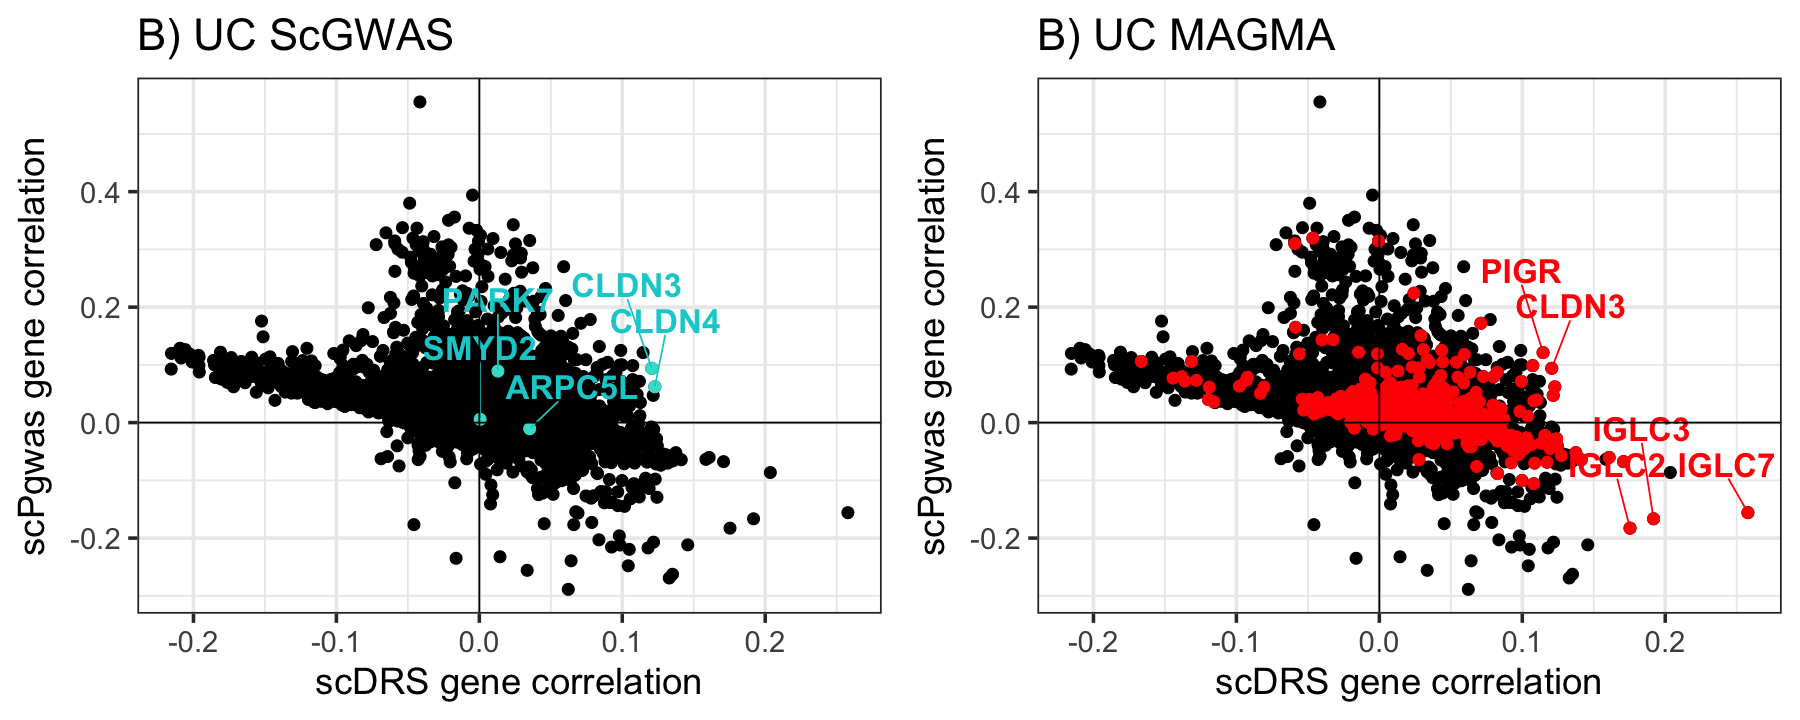

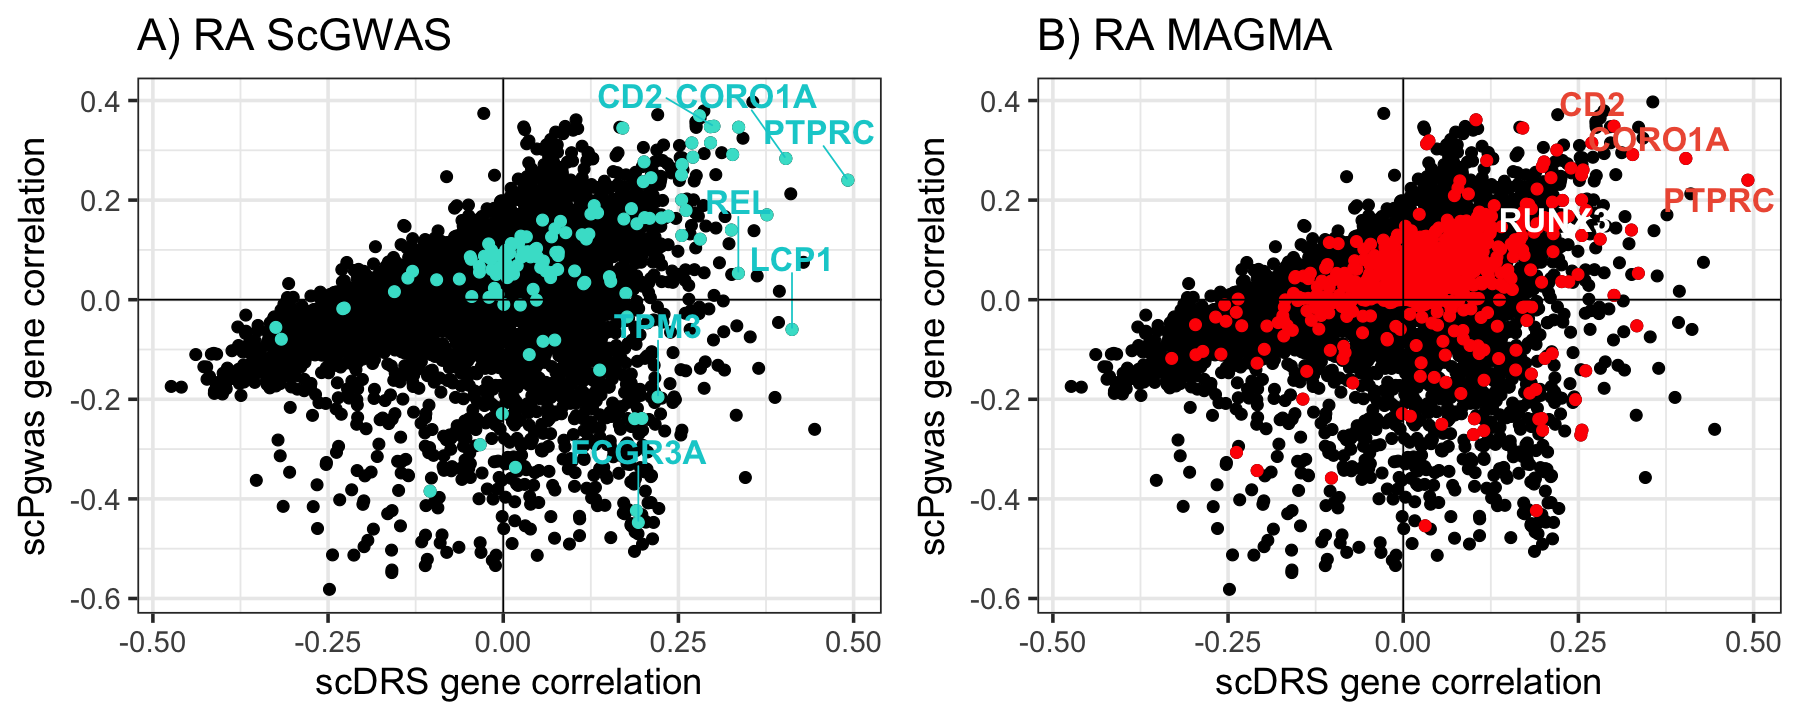

In [167]:
p1 <- ggplot(data=uc_graph_df, aes(x=scdrs, y=scpgwas)) + geom_point(size=3) + 
geom_point(data=uc_graph_df[uc_graph_df$gene %in% uc_df$genes], color="turquoise", size=3) + 
labs(x="scDRS gene correlation", y="scPgwas gene correlation") + 
ggtitle(paste0("B) UC ScGWAS")) + 
geom_text_repel(data=uc_graph_df[uc_graph_df$gene %in% uc_df$genes],
                aes(label=gene), vjust=-2.5, size=7, fontface="bold", color="darkturquoise") +
theme_bw(base_size=22) + geom_vline(xintercept=0) + geom_hline(yintercept=0)

p2 <- ggplot(data=uc_graph_df, aes(x=scdrs, y=scpgwas)) + geom_point(size=3) + 
geom_point(data=uc_graph_df[uc_graph_df$gene %in% uc_magma_genes_5035$GENE[1:1000]], color="red", size=3) + 
labs(x="scDRS gene correlation", y="scPgwas gene correlation") + 
ggtitle(paste0("B) UC MAGMA")) + 
geom_text_repel(data=uc_graph_df[uc_graph_df$gene %in% c("PIGR", "CLDN3", "IGLC7", "IGLC3", 'IGLC2')],
                aes(label=gene), vjust=-2.5, size=7, fontface="bold", color="red") +
theme_bw(base_size=22) + geom_vline(xintercept=0) + geom_hline(yintercept=0)

# IL7R PTPRC
p3 <- ggplot(data=ra_graph_df, aes(x=scdrs, y=scpgwas)) + geom_point(size=3) + 
geom_point(data=ra_graph_df[ra_graph_df$gene %in% ra_df$genes], color="turquoise", size=3) + 
labs(x="scDRS gene correlation", y="scPgwas gene correlation") + 
ggtitle(paste0("A) RA ScGWAS")) +
geom_text_repel(data=ra_graph_df[ra_graph_df$gene %in% c("PTPRC", "CORO1A", "CD2", "REL", 
                                                        'LCP1','TPM3', 'FCGR3A'),],
                aes(label=gene), vjust=-2.5, size=7, fontface="bold", color="darkturquoise") +
theme_bw(base_size=22) + geom_vline(xintercept=0) + geom_hline(yintercept=0)

p4 <- ggplot(data=ra_graph_df, aes(x=scdrs, y=scpgwas)) + geom_point(size=3) + 
geom_point(data=ra_graph_df[ra_graph_df$gene %in% ra_magma_genes_5035$GENE[1:1000]], color="red", size=3) + 
geom_text_repel(data=ra_graph_df[ra_graph_df$gene %in% c("PTPRC", "CORO1A", 
                                                        'CD2'),],
                aes(label=gene),  size=7, fontface="bold", color="tomato2") +
geom_text_repel(data=ra_graph_df[ra_graph_df$gene %in% c('RUNX3'),],
                aes(label=gene),  size=7, fontface="bold", color="white") +
labs(x="scDRS gene correlation", y="scPgwas gene correlation") + 
ggtitle(paste0("B) RA MAGMA")) +

theme_bw(base_size=22) + geom_vline(xintercept=0) + geom_hline(yintercept=0)
options(repr.plot.height=6, repr.plot.width=15)
pdf("Gene_Corr_Plots.pdf", width=15, height=5)
full_plot <- plot_grid(p1, p2, p3, p4, nrow=2)
plot_grid(p3, p4, nrow=1)

dev.off()
plot_grid(p1, p2, nrow=1)
plot_grid(p3, p4, nrow=1)

In [64]:
## graph just the ribosome genes
ra_scpagwas = ra_scpagwas_genes[ra_scpagwas_genes$RANK < 100 & ra_scpagwas_genes$RANK > -1,]$V1
ra_scdrs = ra_scdrs_genes[ra_scdrs_genes$RANK < 100 & ra_scdrs_genes$RANK > -1,]$V1
both_ra <- intersect(ra_scpagwas, ra_scdrs)

uc_scpagwas = uc_scpagwas_genes[uc_scpagwas_genes$RANK < 100 & uc_scpagwas_genes$RANK > -1,]$V1
uc_scdrs = uc_scdrs_genes[uc_scdrs_genes$RANK < 100 & uc_scdrs_genes$RANK > -1,]$V1
both_uc <- intersect(uc_scpagwas, uc_scdrs)
cat("\nRA: Number of ribosomal genes for scpagwas", length(ra_scpagwas[grepl("^RP", ra_scpagwas)]), "\tscdrs", length(ra_scdrs[grepl("^RP", ra_scdrs)]), 
   "\tBoth", length(both_ra[grepl("^RP", both_ra)]))
cat("\nUC: Number of ribosomal genes for scpagwas", length(uc_scpagwas[grepl("^RP", uc_scpagwas)]), "\tscdrs", length(uc_scdrs[grepl("^RP", uc_scdrs)]), 
   "\tBoth", length(both_uc[grepl("^RP", both_uc)]))


RA: Number of ribosomal genes for scpagwas 43 	scdrs 0 	Both 0
UC: Number of ribosomal genes for scpagwas 68 	scdrs 1 	Both 0


RA: Number of ribosomal genes for scpagwas 76 	scdrs 14 	Both 12
UC: Number of ribosomal genes for scpagwas 82 	scdrs 29 	Both 1

pdf 
  2

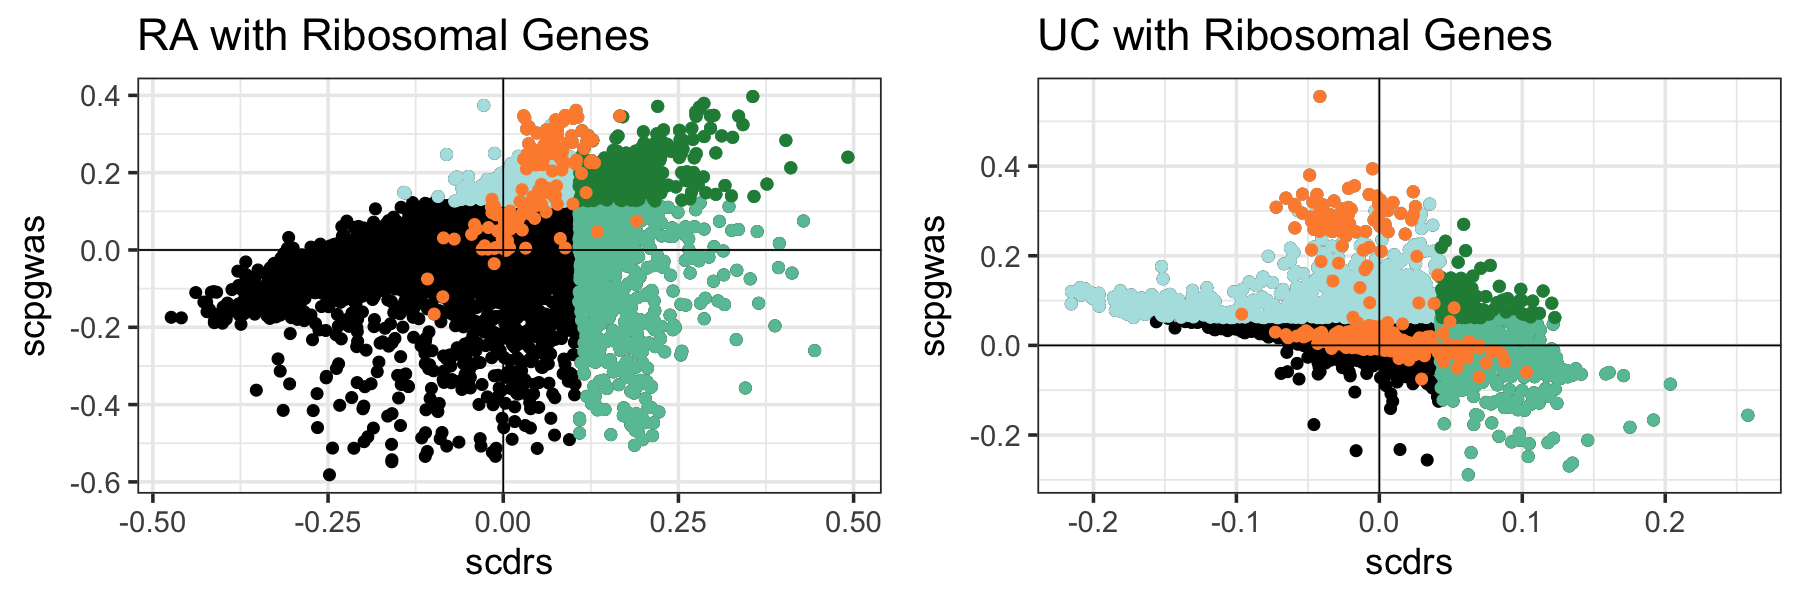

In [168]:
## graph just the ribosome genes
ra_scpagwas = ra_scpagwas_genes[ra_scpagwas_genes$RANK < 1000 & ra_scpagwas_genes$RANK > -1,]$V1
ra_scdrs = ra_scdrs_genes[ra_scdrs_genes$RANK < 1000 & ra_scdrs_genes$RANK > -1,]$V1
both_ra <- intersect(ra_scpagwas, ra_scdrs)

uc_scpagwas = uc_scpagwas_genes[uc_scpagwas_genes$RANK < 1000 & uc_scpagwas_genes$RANK > -1,]$V1
uc_scdrs = uc_scdrs_genes[uc_scdrs_genes$RANK < 1000 & uc_scdrs_genes$RANK > -1,]$V1
both_uc <- intersect(uc_scpagwas, uc_scdrs)
cat("\nRA: Number of ribosomal genes for scpagwas", length(ra_scpagwas[grepl("^RP", ra_scpagwas)]), "\tscdrs", length(ra_scdrs[grepl("^RP", ra_scdrs)]), 
   "\tBoth", length(both_ra[grepl("^RP", both_ra)]))
cat("\nUC: Number of ribosomal genes for scpagwas", length(uc_scpagwas[grepl("^RP", uc_scpagwas)]), "\tscdrs", length(uc_scdrs[grepl("^RP", uc_scdrs)]), 
   "\tBoth", length(both_uc[grepl("^RP", both_uc)]))

options(repr.plot.height=5, repr.plot.width=5)
p1_rib <- ggplot(ra_graph_df, aes(x=scdrs, y=scpgwas)) + 
geom_point(size=3) + theme_bw(base_size=22) + 
geom_point(data=ra_graph_df[ra_graph_df$gene %in% ra_scpagwas,], color="#b2e2e2", size=3) +
geom_point(data=ra_graph_df[ra_graph_df$gene %in% ra_scdrs,], color="#66c2a4", size=3) +
geom_point(data=ra_graph_df[ra_graph_df$gene %in% both_ra,], color="#238b45", size=3) +
geom_point(data=ra_graph_df[grepl("^RP", ra_graph_df$gene)], color="#fd8d3c", size=3) + 
geom_vline(xintercept=0) + geom_hline(yintercept=0) + ggtitle("RA with Ribosomal Genes") #+ 
# geom_vline(xintercept=ra_scdrs_genes[ra_scdrs_genes$RANK == 1000,]$CORR, color="purple", linewidth=1) + 
# geom_hline(yintercept=ra_scpagwas_genes[ra_scpagwas_genes$RANK == 1000,]$PCC, color="purple", linewidth=1)
p2_rib <- ggplot(uc_graph_df, aes(x=scdrs, y=scpgwas)) + 
geom_point(size=3, color="black") + theme_bw(base_size=22) + 
geom_point(data=uc_graph_df[uc_graph_df$gene %in% uc_scpagwas,], color="#b2e2e2", size=3) +
geom_point(data=uc_graph_df[uc_graph_df$gene %in% uc_scdrs,], color="#66c2a4", size=3) +
geom_point(data=uc_graph_df[uc_graph_df$gene %in% both_uc,], color="#238b45", size=3) +
geom_point(data=uc_graph_df[grepl("^RP", uc_graph_df$gene)], color="#fd8d3c", size=3) + 

geom_vline(xintercept=0) + geom_hline(yintercept=0) + ggtitle("UC with Ribosomal Genes") #+ 
# geom_vline(xintercept=uc_scdrs_genes[uc_scdrs_genes$RANK == 1000,]$CORR, color="purple", linewidth=1) + 
# geom_hline(yintercept=uc_scpagwas_genes[uc_scpagwas_genes$RANK == 1000,]$PCC, color="purple", linewidth=1)
options(repr.plot.height=5, repr.plot.width=15)
pdf("Gene_Corr_Rib_Plots.pdf", width=15, height=5)
plot_grid(p1_rib, p2_rib, nrow=1)
dev.off()
plot_grid(p1_rib, p2_rib, nrow=1)


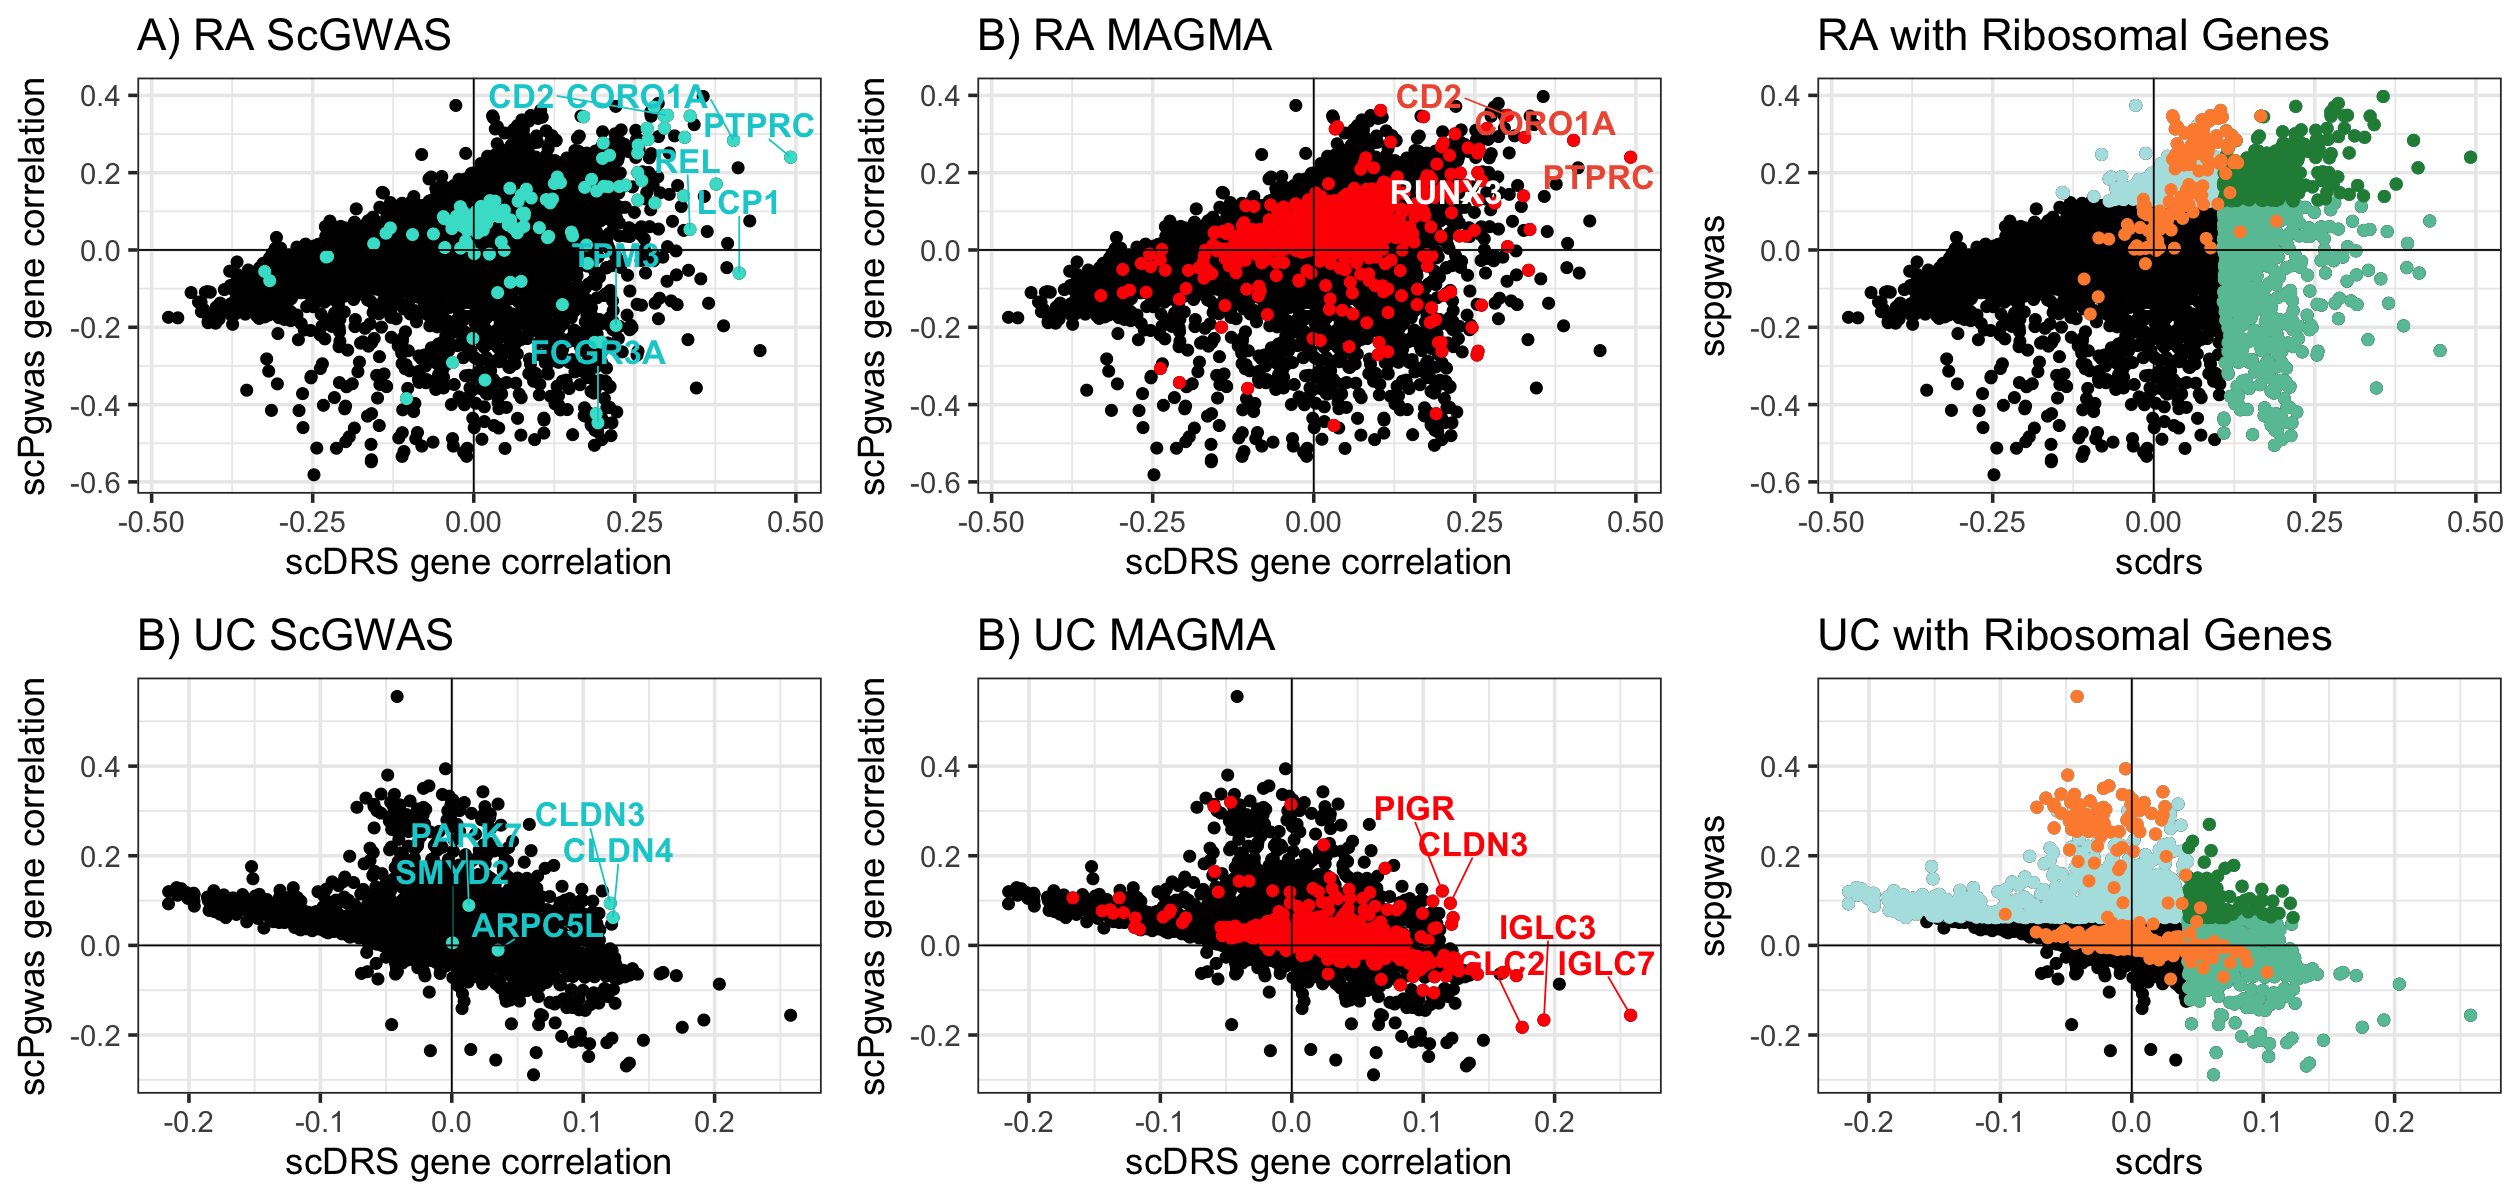

In [172]:
options(repr.plot.height=10, repr.plot.width=21)
full_plot <- plot_grid(p3, p4, p1_rib, 
                       p1, p2, p2_rib, nrow=2)
full_plot
save_plot("Gene_Corr_Plots.svg", full_plot, base_width=21, base_height=10)

### Write out geneset files to use scpagwas genes (w/ and w/o RPS) to run scDRS

In [22]:
# write out a gene set file to run for UC
add_gs <- uc_scpagwas_genes[uc_scpagwas_genes$RANK < 1000 & uc_scpagwas_genes$RANK > -1,]
# remove the ribosomal
add_gs_norib <- add_gs[!grepl("^RP", add_gs$V1)]
add_gs <- add_gs[order(add_gs$RANK),]
add_gs_norib <- add_gs_norib[order(add_gs_norib$RANK),]
add_gs$gs <- paste0(add_gs$V1, ":", add_gs$PCC)
add_gs_norib$gs <- paste0(add_gs_norib$V1, ":", add_gs_norib$PCC)
add_gs[1:2,]
add_gs_norib[1:2,]
dim(add_gs)
dim(add_gs_norib)


gs_df <- data.table("TRAIT"=c("UC_scP", "UC_scP_noRib"), 
                    "GENESET"=c(paste0(add_gs$gs,collapse = ","), 
                                paste0(add_gs_norib$gs,  collapse = ",")))
gs_df[1:3,]
write.table(gs_df, "UC_scpagwas_10.24.24.gs", 
            quote=FALSE, sep="\t", row.names=FALSE)
# unweighted
gs_df <- data.table("TRAIT"=c("UC_scP", "UC_scP_noRib"), 
                    "GENESET"=c(paste0(add_gs$V1,collapse = ","), 
                                paste0(add_gs_norib$V1,  collapse = ",")))
gs_df[1:3,]
write.table(gs_df, "UC_scpagwas_10.24.24_unweighted.gs", 
            quote=FALSE, sep="\t", row.names=FALSE)


add_gs <- ra_scpagwas_genes[ra_scpagwas_genes$RANK < 1000 & ra_scpagwas_genes$RANK > -1,]
# remove the ribosomal
add_gs_norib <- add_gs[!grepl("^RP", add_gs$V1)]
add_gs <- add_gs[order(add_gs$RANK),]
add_gs_norib <- add_gs_norib[order(add_gs_norib$RANK),]
add_gs$gs <- paste0(add_gs$V1, ":", add_gs$PCC)
add_gs_norib$gs <- paste0(add_gs_norib$V1, ":", add_gs_norib$PCC)
add_gs[1:2,]
add_gs_norib[1:2,]
dim(add_gs)
dim(add_gs_norib)


gs_df <- data.table("TRAIT"=c("RA_scP", "RA_scP_noRib"), 
                    "GENESET"=c(paste0(add_gs$gs,collapse = ","), 
                                paste0(add_gs_norib$gs,  collapse = ",")))
gs_df[1:3,]
write.table(gs_df, "RA_scpagwas_10.24.24.gs", 
            quote=FALSE, sep="\t", row.names=FALSE)

# unweighted
gs_df <- data.table("TRAIT"=c("RA_scP", "RA_scP_noRib"), 
                    "GENESET"=c(paste0(add_gs$V1,collapse = ","), 
                                paste0(add_gs_norib$V1,  collapse = ",")))
gs_df[1:3,]
write.table(gs_df, "RA_scpagwas_10.24.24_unweighted.gs", 
            quote=FALSE, sep="\t", row.names=FALSE)


V1    PCC       RANK RANK_abs gs                     
1 RPS24 0.5553919 0    0        RPS24:0.555391911196289
2 RPL23 0.3940468 1    1        RPL23:0.394046789031104

V1     PCC       RANK RANK_abs gs                      
1 TPT1   0.3153340 15   15       TPT1:0.315333978528617  
2 TMSB10 0.3104904 19   19       TMSB10:0.310490442208533

[1] 1000    5

[1] 918   5

TRAIT       
1 UC_scP      
2 UC_scP_noRib
3 NA          
  GENESET                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

TRAIT       
1 UC_scP      
2 UC_scP_noRib
3 NA          
  GENESET                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

V1   PCC       RANK RANK_abs gs                    
1 CD52 0.3971618 0    79       CD52:0.397161782923871
2 LTB  0.3792907 1    90       LTB:0.379290698098229

V1   PCC       RANK RANK_abs gs                    
1 CD52 0.3971618 0    79       CD52:0.397161782923871
2 LTB  0.3792907 1    90       LTB:0.379290698098229

[1] 1000    5

[1] 924   5

TRAIT       
1 RA_scP      
2 RA_scP_noRib
3 NA          
  GENESET                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

TRAIT       
1 RA_scP      
2 RA_scP_noRib
3 NA          
  GENESET                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [64]:
uc_scpagwas_genes[uc_scpagwas_genes$RANK == 1000,]
ra_scpagwas_genes[ra_scpagwas_genes$RANK == 1000,]

dim(uc_scpagwas_genes[uc_scpagwas_genes$RANK < 1000 & uc_scpagwas_genes$RANK > -1,])

V1   PCC        RANK RANK_abs
1 MYH9 0.06143947 1000 1137

V1    PCC      RANK RANK_abs
1 RHOT2 0.125519 1000 1684

[1] 1000    4

## Gene set comparison

In [67]:
library(org.Hs.eg.db)
library(clusterProfiler)

In [68]:
sessionInfo()

R version 4.4.0 (2024-04-24)
Platform: x86_64-apple-darwin20
Running under: macOS Ventura 13.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.4-x86_64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.4-x86_64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/Denver
tzcode source: internal

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] clusterProfiler_4.12.2 org.Hs.eg.db_3.19.1    AnnotationDbi_1.66.0  
 [4] IRanges_2.38.1         S4Vectors_0.42.1       Biobase_2.64.0        
 [7] BiocGenerics_0.50.0    UpSetR_1.4.0           plotly_4.10.4         
[10] cowplot_1.1.3          ggrepel_0.9.6          glue_1.8.0            
[13] data.table_1.16.2      plyr_1.8.9             lubridate_1.9.3       
[16] forcats_1.0.0          stringr_1

In [25]:
run_go_analysis <- function(gene_symbols) {
    # gene_ids <- bitr(gene_symbols, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = org.Hs.eg.db)
    # # Extract the Entrez IDs
    # entrez_gene_list <- gene_ids$ENTREZID
    # GO enrichment analysis
    go_enrichment <- enrichGO(gene = gene_symbols,
                          OrgDb = org.Hs.eg.db,
                          keyType = "SYMBOL",
                          ont = "ALL",  # Can be "BP", "MF", or "CC" for specific ontology categories
                          pAdjustMethod = "BH",
                          pvalueCutoff = 0.05,
                          qvalueCutoff = 0.05)

    return(go_enrichment)
    }

In [110]:
uc_scdrs_genes[1:4,]

V1       CORR         RANK 
1 7SK       0.010729950  4346
2 A1BG     -0.004429156 11416
3 A1BG-AS1 -0.009142704 13335
4 A1CF      0.020268911  2702

### RA GO analysis

In [27]:
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:BiocGenerics’:

    combine


The following object is masked from ‘package:dplyr’:

    combine




In [28]:
GO_scDRS_top100 <- run_go_analysis(ra_scdrs_genes[ra_scdrs_genes$RANK < 100,]$V1)
GO_scPagwas_top100 <- run_go_analysis(ra_scpagwas_genes[ra_scpagwas_genes$RANK < 100,]$V1)
GO_scDRS_top500 <- run_go_analysis(ra_scdrs_genes[ra_scdrs_genes$RANK < 500,]$V1)
GO_scPagwas_top500 <- run_go_analysis(ra_scpagwas_genes[ra_scpagwas_genes$RANK < 500,]$V1)
GO_scDRS_top1000_ <- run_go_analysis(ra_scdrs_genes[ra_scdrs_genes$RANK < 1000,]$V1)
GO_scPagwas_top1000_ <- run_go_analysis(ra_scpagwas_genes[ra_scpagwas_genes$RANK < 1000,]$V1)

pdf 
  2

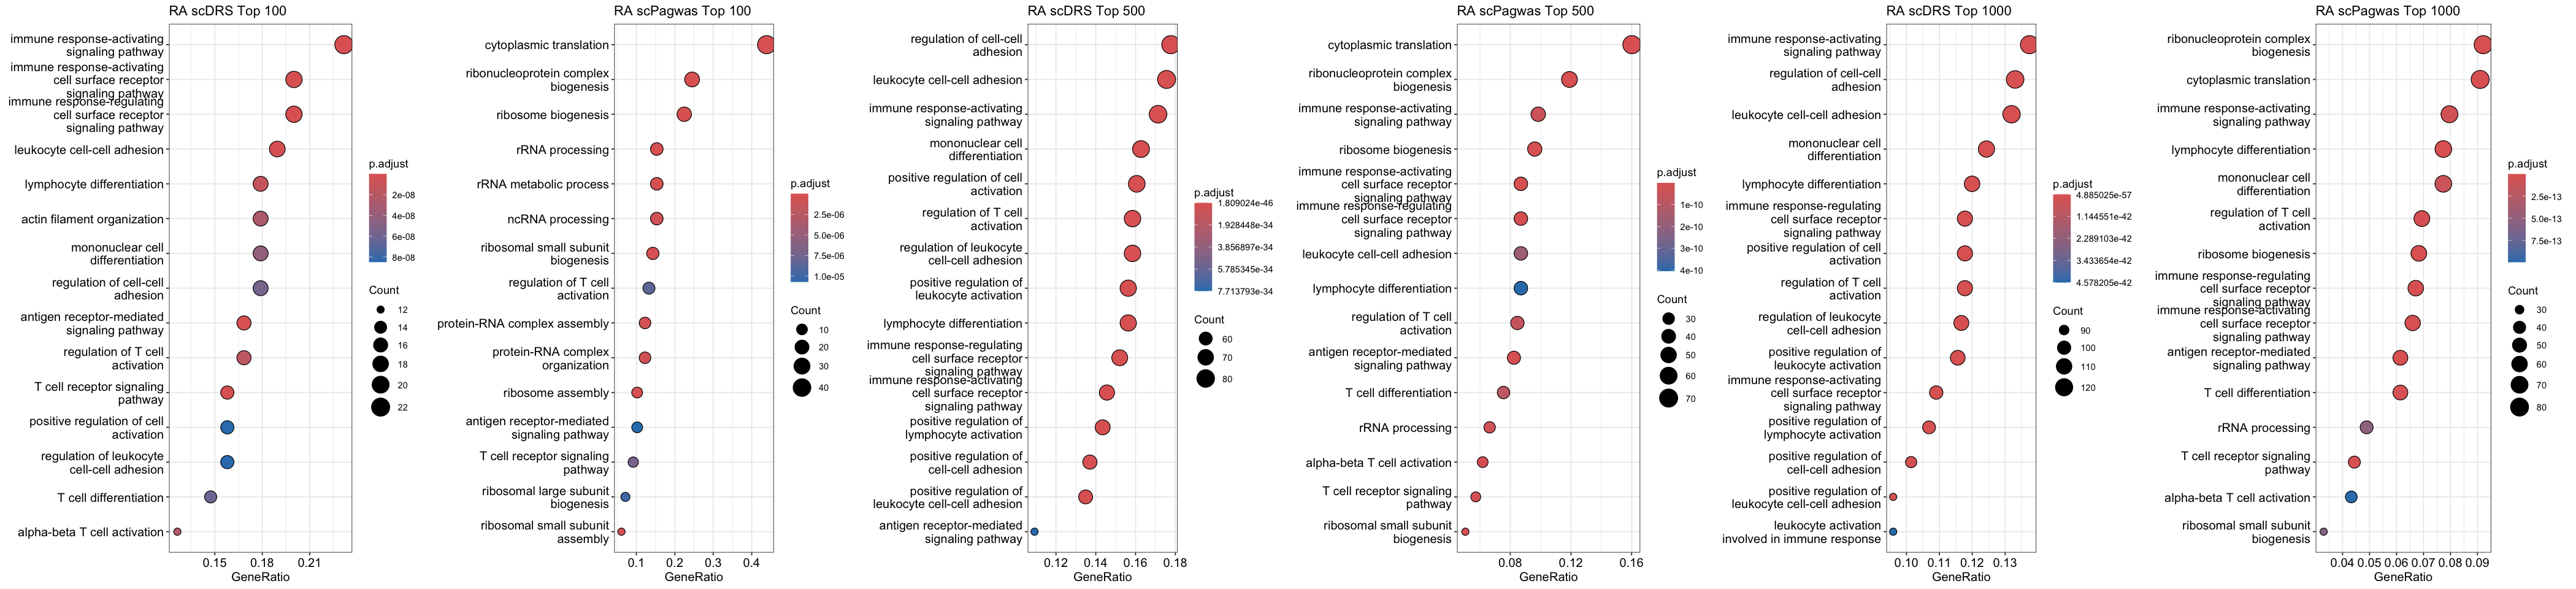

In [36]:
options(repr.plot.height=8, repr.plot.width=35)
p1 <- dotplot(GO_scDRS_top100, showCategory = 15, title="RA scDRS Top 100")
p2 <- dotplot(GO_scPagwas_top100, showCategory = 15, title="RA scPagwas Top 100")
p3 <- dotplot(GO_scDRS_top500, showCategory = 15, title="RA scDRS Top 500")
p4 <- dotplot(GO_scPagwas_top500, showCategory = 15, title="RA scPagwas Top 500")
p5 <- dotplot(GO_scDRS_top1000_, showCategory = 15, title="RA scDRS Top 1000")
p6 <- dotplot(GO_scPagwas_top1000_, showCategory = 15, title="RA scPagwas Top 1000")
grid.arrange(p1, p2, p3, p4, p5, p6, ncol = 6)

options(repr.plot.height=10, repr.plot.width=24)
png("./RA_GO_gene_comparison.png", height=10, width=24, units="in", res=300)
grid.arrange(p1, p2, p5, p6, ncol = 4)
dev.off()

### UC GO analysis

In [37]:
GO_scDRS_top100 <- run_go_analysis(uc_scdrs_genes[uc_scdrs_genes$RANK < 100,]$V1)
GO_scPagwas_top100 <- run_go_analysis(uc_scpagwas_genes[uc_scpagwas_genes$RANK < 100,]$V1)
GO_scDRS_top500 <- run_go_analysis(uc_scdrs_genes[uc_scdrs_genes$RANK < 500,]$V1)
GO_scPagwas_top500 <- run_go_analysis(uc_scpagwas_genes[uc_scpagwas_genes$RANK < 500,]$V1)
GO_scDRS_top1000_ <- run_go_analysis(uc_scdrs_genes[uc_scdrs_genes$RANK < 1000,]$V1)
GO_scPagwas_top1000_ <- run_go_analysis(uc_scpagwas_genes[uc_scpagwas_genes$RANK < 1000,]$V1)

pdf 
  2

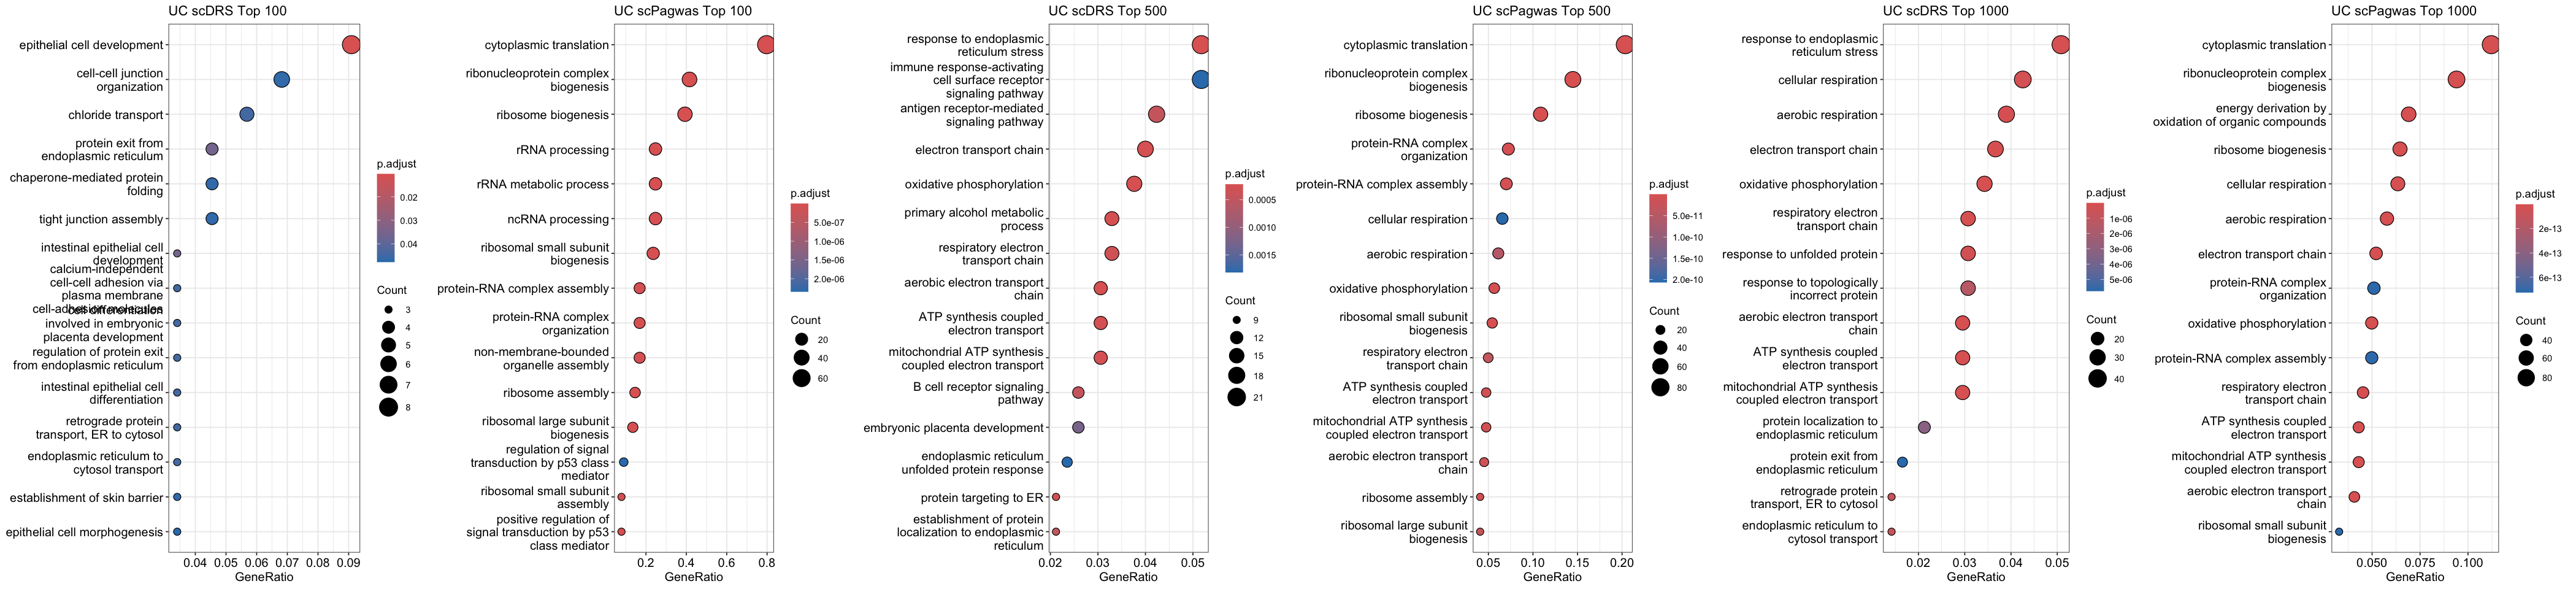

In [38]:
options(repr.plot.height=8, repr.plot.width=35)
p1 <- dotplot(GO_scDRS_top100, showCategory = 15, title="UC scDRS Top 100")
p2 <- dotplot(GO_scPagwas_top100, showCategory = 15, title="UC scPagwas Top 100")
p3 <- dotplot(GO_scDRS_top500, showCategory = 15, title="UC scDRS Top 500")
p4 <- dotplot(GO_scPagwas_top500, showCategory = 15, title="UC scPagwas Top 500")
p5 <- dotplot(GO_scDRS_top1000_, showCategory = 15, title="UC scDRS Top 1000")
p6 <- dotplot(GO_scPagwas_top1000_, showCategory = 15, title="UC scPagwas Top 1000")
grid.arrange(p1, p2, p3, p4, p5, p6, ncol = 6)

options(repr.plot.height=10, repr.plot.width=24)
png("./UC_GO_gene_comparison.png", height=10, width=24, units="in", res=300)
grid.arrange(p1, p2, p5, p6, ncol = 4)
dev.off()

In [140]:
#GO_scDRS_top100$Description

In [166]:
# Which gene sets are shared across them all?
all <- intersect(intersect(gene_comp$scPagwas, gene_comp$scPagwas_abs), intersect(gene_comp$scDRS, gene_comp$scDRS_abs))

cat("\nAll", length(all))
sort(all)
# Which gene sets are shared across them all without concern 
both <- intersect(gene_comp$scPagwas_abs, gene_comp$scDRS_abs)
length(setdiff(both, all))
cat("\nBoth ABS", length(both))
sort(setdiff(both, all))

# Only scPagwas
only_scpagwas = setdiff(union(gene_comp$scPagwas, gene_comp$scPagwas_abs), union(gene_comp$scDRS, gene_comp$scDRS_abs))
cat("\nOnly scpagwas", length(only_scpagwas))
sort(only_scpagwas)

# Only scDRS
only_scdrs = setdiff(union(gene_comp$scDRS, gene_comp$scDRS_abs), union(gene_comp$scPagwas, gene_comp$scPagwas_abs))
cat("\nOnly scdrs", length(only_scdrs))
sort(only_scdrs)


All 107

[1] "aerobic electron transport chain"                                                         
  [2] "ameboidal-type cell migration"                                                            
  [3] "antimicrobial humoral response"                                                           
  [4] "azurophil granule"                                                                        
  [5] "azurophil granule lumen"                                                                  
  [6] "blood microparticle"                                                                      
  [7] "brush border"                                                                             
  [8] "cell projection membrane"                                                                 
  [9] "cellular response to tumor necrosis factor"                                               
 [10] "cellular response to type II interferon"                                                  
 [11] "chaperone-mediated protein folding"                                                       
 [12] "complement activation, classical pathway"                                                 
 [13] "cytochrome complex"                                                                       
 [14] "electron transfer activity"                                                               
 [15] "endoderm development"                                                                     
 [16] "endoderm formation"                                                                       
 [17] "endoplasmic reticulum lumen"                                                              
 [18] "epithelial cell migration"                                                                
 [19] "epithelial cell proliferation"                                                            
 [20] "epithelium migration"                                                                     
 [21] "ERK1 and ERK2 cascade"                                                                    
 [22] "external side of plasma membrane"                                                         
 [23] "ficolin-1-rich granule lumen"                                                             
 [24] "gland development"                                                                        
 [25] "Golgi lumen"                                                                              
 [26] "homeostasis of number of cells"                                                           
 [27] "humoral immune response"                                                                  
 [28] "humoral immune response mediated by circulating immunoglobulin"                           
 [29] "immune response-activating cell surface receptor signaling pathway"                       
 [30] "immune response-activating signaling pathway"                                             
 [31] "immune response-regulating cell surface receptor signaling pathway"                       
 [32] "inflammatory response to antigenic stimulus"                                              
 [33] "intrinsic apoptotic signaling pathway"                                                    
 [34] "leukocyte cell-cell adhesion"                                                             
 [35] "leukocyte mediated immunity"                                                              
 [36] "leukocyte proliferation"                                                                  
 [37] "lymphocyte differentiation"                                                               
 [38] "lymphocyte proliferation"                                                                 
 [39] "melanosome"                                                                               
 [40] "mitochondrial electron transport, ubiquinol to cytochrome c"                              
 [41] "mitochondrial respirasome"                                                 

[1] 266


Both ABS 373

[1] "actin binding"                                                                                                            
  [2] "actin filament"                                                                                                           
  [3] "actin filament bundle"                                                                                                    
  [4] "actin filament bundle assembly"                                                                                           
  [5] "actin filament bundle organization"                                                                                       
  [6] "actin filament organization"                                                                                              
  [7] "actomyosin"                                                                                                               
  [8] "acute inflammatory response"                                                                                              
  [9] "adaptive immune response based on somatic recombination of immune receptors built from immunoglobulin superfamily domains"
 [10] "anoikis"                                                                                                                  
 [11] "antigen binding"                                                                                                          
 [12] "antigen receptor-mediated signaling pathway"                                                                              
 [13] "apoptotic cell clearance"                                                                                                 
 [14] "astrocyte development"                                                                                                    
 [15] "astrocyte differentiation"                                                                                                
 [16] "B cell activation"                                                                                                        
 [17] "B cell differentiation"                                                                                                   
 [18] "B cell mediated immunity"                                                                                                 
 [19] "B cell receptor signaling pathway"                                                                                        
 [20] "banded collagen fibril"                                                                                                   
 [21] "basement membrane"                                                                                                        
 [22] "basement membrane organization"                                                                                           
 [23] "biological process involved in interaction with host"                                                                     
 [24] "biological process involved in symbiotic interaction"                                                                     
 [25] "blood coagulation"                                                                                                        
 [26] "blood vessel diameter maintenance"                                                                                        
 [27] "cadherin binding involved in cell-cell adhesion"                                                                          
 [28] "cell adhesion mediator activity"                                                                                          
 [29] "cell chemotaxis"                                                                                                          
 [30] "cell cortex"                                                                                                              
 [31] "cell growth"                                                                                   


Only scpagwas 662

[1] "actin filament binding"                                                                                     
  [2] "actin filament capping"                                                                                     
  [3] "actin filament depolymerization"                                                                            
  [4] "actin filament polymerization"                                                                              
  [5] "actin nucleation"                                                                                           
  [6] "actin polymerization or depolymerization"                                                                   
  [7] "activation of cysteine-type endopeptidase activity involved in apoptotic process"                           
  [8] "activation of phospholipase C activity"                                                                     
  [9] "ADP catabolic process"                                                                                      
 [10] "ADP metabolic process"                                                                                      
 [11] "alternative mRNA splicing, via spliceosome"                                                                 
 [12] "amide binding"                                                                                              
 [13] "amyloid fibril formation"                                                                                   
 [14] "amyloid-beta binding"                                                                                       
 [15] "antigen processing and presentation"                                                                        
 [16] "antigen processing and presentation of endogenous antigen"                                                  
 [17] "antigen processing and presentation of endogenous peptide antigen"                                          
 [18] "antigen processing and presentation of exogenous antigen"                                                   
 [19] "antigen processing and presentation of exogenous peptide antigen"                                           
 [20] "antigen processing and presentation of exogenous peptide antigen via MHC class II"                          
 [21] "antigen processing and presentation of peptide antigen via MHC class I"                                     
 [22] "antigen processing and presentation of peptide antigen via MHC class II"                                    
 [23] "antigen processing and presentation of peptide or polysaccharide antigen via MHC class II"                  
 [24] "antigen processing and presentation via MHC class Ib"                                                       
 [25] "antimicrobial humoral immune response mediated by antimicrobial peptide"                                    
 [26] "antioxidant activity"                                                                                       
 [27] "Arp2/3 complex-mediated actin nucleation"                                                                   
 [28] "astrocyte activation"                                                                                       
 [29] "asymmetric synapse"                                                                                         
 [30] "ATP-dependent protein folding chaperone"                                                                    
 [31] "barbed-end actin filament capping"                                                                          
 [32] "binding of sperm to zona pellucida"                                                                         
 [33] "biological process involved in interaction with symbiont"                                                   
 [34] "bone trabecula morphogenesis"                                                                               
 [35] "cadherin binding"                                  


Only scdrs 615

[1] "3'-phosphoadenosine 5'-phosphosulfate metabolic process"                                          
  [2] "actin filament-based movement"                                                                    
  [3] "actin-based cell projection"                                                                      
  [4] "actin-mediated cell contraction"                                                                  
  [5] "actomyosin structure organization"                                                                
  [6] "acute inflammatory response to antigenic stimulus"                                                
  [7] "acylglycerol biosynthetic process"                                                                
  [8] "adenine nucleotide transmembrane transporter activity"                                            
  [9] "adherens junction"                                                                                
 [10] "ADP transmembrane transporter activity"                                                           
 [11] "ADP transport"                                                                                    
 [12] "alcohol metabolic process"                                                                        
 [13] "aldehyde biosynthetic process"                                                                    
 [14] "aldosterone metabolic process"                                                                    
 [15] "alpha-beta T cell activation involved in immune response"                                         
 [16] "alpha-beta T cell differentiation involved in immune response"                                    
 [17] "alpha-beta T cell proliferation"                                                                  
 [18] "anatomical structure homeostasis"                                                                 
 [19] "animal organ formation"                                                                           
 [20] "aorta development"                                                                                
 [21] "aortic valve development"                                                                         
 [22] "aortic valve morphogenesis"                                                                       
 [23] "apical junction complex"                                                                          
 [24] "apical part of cell"                                                                              
 [25] "apical plasma membrane"                                                                           
 [26] "apicolateral plasma membrane"                                                                     
 [27] "artery development"                                                                               
 [28] "artery morphogenesis"                                                                             
 [29] "ATP transmembrane transporter activity"                                                           
 [30] "ATP transport"                                                                                    
 [31] "ATPase binding"                                                                                   
 [32] "atrioventricular canal development"                                                               
 [33] "axon ensheathment"                                                                                
 [34] "axon guidance"                                                                                    
 [35] "axonogenesis"                                                                                     
 [36] "B cell homeostasis"                                                                               
 [37] "B cell proliferation"                                                                             
 [38] "basal part of cell"                                                      

## Compare GSEA results

### RA

In [42]:
library(UpSetR)

Warning message in fread("~/Downloads/RA_scgwas_geneoverlap_C8.tsv", skip = 9, sep = "\t"):
“Stopped early on line 61. Expected 7 fields but found 0. Consider fill=TRUE and comment.char=. First discarded non-empty line: <<Gene/Gene Set Overlap Matrix>>”
Warning message in fread("~/Downloads/RA_scpagwas_geneoverlap_C8_top500.tsv", skip = 9, :
“Stopped early on line 61. Expected 7 fields but found 0. Consider fill=TRUE and comment.char=. First discarded non-empty line: <<Gene/Gene Set Overlap Matrix>>”
Warning message in fread("~/Downloads/RA_scpagwas_norib_top500_C8.tsv", skip = 9, :
“Stopped early on line 61. Expected 7 fields but found 0. Consider fill=TRUE and comment.char=. First discarded non-empty line: <<Gene/Gene Set Overlap Matrix>>”
Warning message in fread("~/Downloads/RA_scdrs_geneoverlap_C8_top500.tsv", skip = 9, :
“Stopped early on line 61. Expected 7 fields but found 0. Consider fill=TRUE and comment.char=. First discarded non-empty line: <<Gene/Gene Set Overlap Matrix>>”

Gene Set Name                    # Genes in Gene Set (K) Description
1 BUSSLINGER_DUODENAL_IMMUNE_CELLS  911                               
2 BUSSLINGER_GASTRIC_IMMUNE_CELLS  1492                               
  # Genes in Overlap (k) k/K    p-value  FDR q-value
1 46                     0.0505 9.38e-44 7.88e-41   
2 49                     0.0328 7.01e-38 2.95e-35

[1] "BUSSLINGER_GASTRIC_IMMUNE_CELLS"                                        
 [2] "HAY_BONE_MARROW_NAIVE_T_CELL"                                           
 [3] "BUSSLINGER_DUODENAL_IMMUNE_CELLS"                                       
 [4] "AIZARANI_LIVER_C3_NK_NKT_CELLS_2"                                       
 [5] "RUBENSTEIN_SKELETAL_MUSCLE_T_CELLS"                                     
 [6] "TRAVAGLINI_LUNG_CD4_NAIVE_T_CELL"                                       
 [7] "AIZARANI_LIVER_C1_NK_NKT_CELLS_1"                                       
 [8] "FAN_EMBRYONIC_CTX_BRAIN_NAIVE_LIKE_T_CELL"                              
 [9] "RUBENSTEIN_SKELETAL_MUSCLE_B_CELLS"                                     
[10] "CUI_DEVELOPING_HEART_C9_B_T_CELL"                                       
[11] "TRAVAGLINI_LUNG_CD8_NAIVE_T_CELL"                                       
[12] "AIZARANI_LIVER_C5_NK_NKT_CELLS_3"                                       
[13] "RUBENSTEIN_SKELETAL_MUSCLE_SATELLITE_CELLS"                             
[14] "BUSSLINGER_GASTRIC_PPP1R1B_POSITIVE_CELLS"                              
[15] "AIZARANI_LIVER_C28_NK_NKT_CELLS_6"                                      
[16] "FAN_OVARY_CL0_XBP1_SELK_HIGH_STROMAL_CELL"                              
[17] "DESCARTES_FETAL_KIDNEY_LYMPHOID_CELLS"                                  
[18] "DESCARTES_FETAL_ADRENAL_LYMPHOID_CELLS"                                 
[19] "FAN_EMBRYONIC_CTX_BRAIN_EFFECTOR_T_CELL"                                
[20] "FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1"                                   
[21] "FAN_EMBRYONIC_CTX_BIG_GROUPS_BRAIN_IMMUNE"                              
[22] "FAN_OVARY_CL12_T_LYMPHOCYTE_NK_CELL_2"                                  
[23] "TRAVAGLINI_LUNG_CD4_MEMORY_EFFECTOR_T_CELL"                             
[24] "TRAVAGLINI_LUNG_BRONCHIAL_VESSEL_1_CELL"                                
[25] "DESCARTES_FETAL_STOMACH_LYMPHOID_CELLS"                                 
[26] "BUSSLINGER_GASTRIC_LYZ_POSITIVE_CELLS"                                  
[27] "BUSSLINGER_DUODENAL_TRANSIT_AMPLIFYING_CELLS"                           
[28] "DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_CD8_T_CELLS"                    
[29] "TRAVAGLINI_LUNG_PROXIMAL_BASAL_CELL"                                    
[30] "BUSSLINGER_DUODENAL_STEM_CELLS"                                         
[31] "DESCARTES_FETAL_PLACENTA_LYMPHOID_CELLS"                                
[32] "DESCARTES_MAIN_FETAL_LYMPHOID_CELLS"                                    
[33] "BUSSLINGER_DUODENAL_DIFFERENTIATING_STEM_CELLS"                         
[34] "TRAVAGLINI_LUNG_CLUB_CELL"                                              
[35] "RUBENSTEIN_SKELETAL_MUSCLE_NK_CELLS"                                    
[36] "HAY_BONE_MARROW_NK_CELLS"                                               
[37] "LAKE_ADULT_KIDNEY_C7_PROXIMAL_TUBULE_EPITHELIAL_CELLS_S3"               
[38] "DESCARTES_FETAL_INTESTINE_LYMPHOID_CELLS"                               
[39] "DESCARTES_FETAL_PANCREAS_LYMPHOID_CELLS"                                
[40] "DESCARTES_FETAL_LUNG_LYMPHOID_CELLS"                                    
[41] "LAKE_ADULT_KIDNEY_C8_DECENDING_THIN_LIMB"                               
[42] "LAKE_ADULT_KIDNEY_C19_COLLECTING_DUCT_INTERCALATED_CELLS_TYPE_A_MEDULLA"
[43] "GAO_LARGE_INTESTINE_ADULT_CI_MESENCHYMAL_CELLS"                         
[44] "LAKE_ADULT_KIDNEY_C12_THICK_ASCENDING_LIMB"                             
[45] "LAKE_ADULT_KIDNEY_C18_COLLECTING_DUCT_PRINCIPAL_CELLS_MEDULLA"          
[46] "TRAVAGLINI_LUNG_MESOTHELIAL_CELL"                                       
[47] "MURARO_PANCREAS_ACINAR_CELL"                                            
[48] "LAKE_ADULT_KIDNEY_C9_THIN_ASCENDING_LIMB"                               
[49] "DESCARTES_FETAL_HEART_LYMPHOID_CELLS"                                   
[50] "LAKE_ADULT_KIDNEY_C10_THIN_ASCENDING_LIMB"

[1] "BUSSLINGER_GASTRIC_IMMUNE_CELLS"                        
 [2] "BUSSLINGER_DUODENAL_IMMUNE_CELLS"                       
 [3] "CUI_DEVELOPING_HEART_C8_MACROPHAGE"                     
 [4] "HU_FETAL_RETINA_MICROGLIA"                              
 [5] "CUI_DEVELOPING_HEART_C9_B_T_CELL"                       
 [6] "MANNO_MIDBRAIN_NEUROTYPES_HMGL"                         
 [7] "ZHONG_PFC_MAJOR_TYPES_MICROGLIA"                        
 [8] "DESCARTES_FETAL_CEREBELLUM_MICROGLIA"                   
 [9] "GAO_LARGE_INTESTINE_24W_C11_PANETH_LIKE_CELL"           
[10] "FAN_OVARY_CL13_MONOCYTE_MACROPHAGE"                     
[11] "FAN_EMBRYONIC_CTX_BIG_GROUPS_MICROGLIA"                 
[12] "AIZARANI_LIVER_C1_NK_NKT_CELLS_1"                       
[13] "GAO_LARGE_INTESTINE_ADULT_CI_MESENCHYMAL_CELLS"         
[14] "AIZARANI_LIVER_C2_KUPFFER_CELLS_1"                      
[15] "AIZARANI_LIVER_C6_KUPFFER_CELLS_2"                      
[16] "FAN_EMBRYONIC_CTX_BIG_GROUPS_BRAIN_IMMUNE"              
[17] "FAN_OVARY_CL4_T_LYMPHOCYTE_NK_CELL_1"                   
[18] "FAN_EMBRYONIC_CTX_BRAIN_NAIVE_LIKE_T_CELL"              
[19] "RUBENSTEIN_SKELETAL_MUSCLE_MYELOID_CELLS"               
[20] "BUSSLINGER_ESOPHAGEAL_DENDRITIC_CELLS"                  
[21] "AIZARANI_LIVER_C3_NK_NKT_CELLS_2"                       
[22] "DESCARTES_FETAL_CEREBRUM_MICROGLIA"                     
[23] "FAN_OVARY_CL12_T_LYMPHOCYTE_NK_CELL_2"                  
[24] "RUBENSTEIN_SKELETAL_MUSCLE_NK_CELLS"                    
[25] "HAY_BONE_MARROW_NAIVE_T_CELL"                           
[26] "FAN_OVARY_CL18_B_LYMPHOCYTE"                            
[27] "AIZARANI_LIVER_C28_NK_NKT_CELLS_6"                      
[28] "DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_CD8_T_CELLS"    
[29] "AIZARANI_LIVER_C5_NK_NKT_CELLS_3"                       
[30] "AIZARANI_LIVER_C25_KUPFFER_CELLS_4"                     
[31] "TRAVAGLINI_LUNG_EREG_DENDRITIC_CELL"                    
[32] "DESCARTES_FETAL_EYE_MICROGLIA"                          
[33] "FAN_EMBRYONIC_CTX_BRAIN_EFFECTOR_T_CELL"                
[34] "AIZARANI_LIVER_C23_KUPFFER_CELLS_3"                     
[35] "DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_NK_CELLS"       
[36] "DESCARTES_FETAL_INTESTINE_MYELOID_CELLS"                
[37] "DESCARTES_FETAL_STOMACH_LYMPHOID_CELLS"                 
[38] "DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_DENDRITIC_CELLS"
[39] "TRAVAGLINI_LUNG_TREM2_DENDRITIC_CELL"                   
[40] "DESCARTES_FETAL_PANCREAS_MYELOID_CELLS"                 
[41] "AIZARANI_LIVER_C18_NK_NKT_CELLS_5"                      
[42] "MURARO_PANCREAS_DUCTAL_CELL"                            
[43] "HAY_BONE_MARROW_NK_CELLS"                               
[44] "TRAVAGLINI_LUNG_OLR1_CLASSICAL_MONOCYTE_CELL"           
[45] "TRAVAGLINI_LUNG_CD8_NAIVE_T_CELL"                       
[46] "CUI_DEVELOPING_HEART_C7_MAST_CELL"                      
[47] "DESCARTES_FETAL_ADRENAL_MYELOID_CELLS"                  
[48] "DESCARTES_FETAL_THYMUS_ANTIGEN_PRESENTING_CELLS"        
[49] "DESCARTES_FETAL_ADRENAL_LYMPHOID_CELLS"                 
[50] "DESCARTES_FETAL_PLACENTA_MYELOID_CELLS"

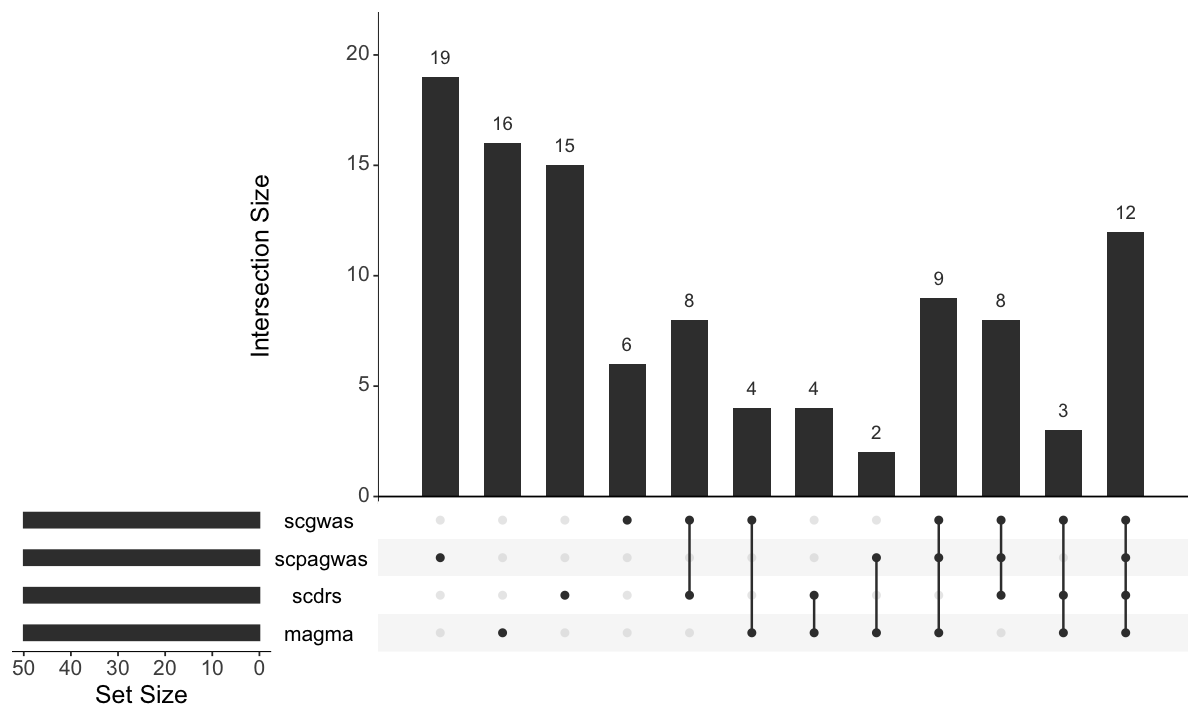

In [62]:
# C8
scg_c8 = fread("~/Downloads/RA_scgwas_geneoverlap_C8.tsv", skip=9, sep="\t")
scp_c8 = fread("~/Downloads/RA_scpagwas_geneoverlap_C8_top500.tsv", skip=9, sep="\t")
scp_norib_c8 = fread("~/Downloads/RA_scpagwas_norib_top500_C8.tsv", skip=9, sep="\t")
scdrs_c8 = fread("~/Downloads/RA_scdrs_geneoverlap_C8_top500.tsv", skip=9, sep="\t")
magma_c8 = fread("~/Downloads/RA_magma10kb_top500_C8.tsv", skip=9, sep="\t")
scg_c8[1:2,]
options(repr.plot.height=6, repr.plot.width=10)
upset(fromList(list("scgwas"=scg_c8[["Gene Set Name"]], "scpagwas"=scp_c8[["Gene Set Name"]], "scdrs"=scdrs_c8[["Gene Set Name"]], 
                   "magma"=magma_c8[["Gene Set Name"]])), 
      nsets=4, text.scale=1.8)

#scg_c8[["Gene Set Name"]]
scp_c8[["Gene Set Name"]]
scdrs_c8[["Gene Set Name"]]



In [55]:
print("Only MAGMA")
setdiff(magma_c8[["Gene Set Name"]], union(union(scg_c8[["Gene Set Name"]], scp_c8[["Gene Set Name"]]), scdrs_c8[["Gene Set Name"]]))
# hematopoietic stem cell (HSC)

print("Only SCGWAS")
setdiff(scg_c8[["Gene Set Name"]], union(union(magma_c8[["Gene Set Name"]], scp_c8[["Gene Set Name"]]), scdrs_c8[["Gene Set Name"]]))

print("Only SCDRS")
setdiff(scdrs_c8[["Gene Set Name"]], union(union(magma_c8[["Gene Set Name"]], scp_c8[["Gene Set Name"]]), scg_c8[["Gene Set Name"]]))

print("Only SCPAGWAS")
setdiff(scp_c8[["Gene Set Name"]], union(union(magma_c8[["Gene Set Name"]], scdrs_c8[["Gene Set Name"]]), scg_c8[["Gene Set Name"]]))

print("Only SCPAGWAS (NO rib) and NOT scpwagwas")
setdiff(setdiff(scp_norib_c8[["Gene Set Name"]], union(union(magma_c8[["Gene Set Name"]], scdrs_c8[["Gene Set Name"]]), scg_c8[["Gene Set Name"]])), scp_c8[["Gene Set Name"]])

print("Only SCPAGWAS (NO rib) and IN scpwagwas")
intersect(setdiff(scp_norib_c8[["Gene Set Name"]], union(union(magma_c8[["Gene Set Name"]], scdrs_c8[["Gene Set Name"]]), scg_c8[["Gene Set Name"]])), scp_c8[["Gene Set Name"]])

[1] "Only MAGMA"


[1] "HE_LIM_SUN_FETAL_LUNG_C2_CYCLING_DC_CELL"                
 [2] "AIZARANI_LIVER_C34_MHC_II_POS_B_CELLS"                   
 [3] "HE_LIM_SUN_FETAL_LUNG_C2_HSC_CELL"                       
 [4] "HE_LIM_SUN_FETAL_LUNG_C2_PRE_PDC_DC5_CELL"               
 [5] "TRAVAGLINI_LUNG_B_CELL"                                  
 [6] "HE_LIM_SUN_FETAL_LUNG_C4_TREG_CELL"                      
 [7] "HE_LIM_SUN_FETAL_LUNG_C5_CD5_POS_CCL22_POS_MATURE_B_CELL"
 [8] "HE_LIM_SUN_FETAL_LUNG_C2_ADC_1_CELL"                     
 [9] "ZHONG_PFC_C1_MICROGLIA"                                  
[10] "FAN_EMBRYONIC_CTX_BRAIN_B_CELL"                          
[11] "MURARO_PANCREAS_BETA_CELL"                               
[12] "HAY_BONE_MARROW_FOLLICULAR_B_CELL"                       
[13] "HE_LIM_SUN_FETAL_LUNG_C4_CYCLING_T_CELL"                 
[14] "HE_LIM_SUN_FETAL_LUNG_C2_MEGAKARYOCYTE"                  
[15] "HE_LIM_SUN_FETAL_LUNG_C5_LARGE_PRE_B_CELL"               
[16] "HE_LIM_SUN_FETAL_LUNG_C2_CXCL9_POS_MACROPHAGE_CELL"

[1] "Only SCGWAS"


[1] "DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_CD4_T_CELLS"
[2] "TRAVAGLINI_LUNG_NATURAL_KILLER_CELL"                
[3] "MENON_FETAL_KIDNEY_10_IMMUNE_CELLS"                 
[4] "TRAVAGLINI_LUNG_NEUTROPHIL_CELL"                    
[5] "TRAVAGLINI_LUNG_BASOPHIL_MAST_2_CELL"               
[6] "DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_B_CELLS"

[1] "Only SCDRS"


[1] "AIZARANI_LIVER_C2_KUPFFER_CELLS_1"              
 [2] "AIZARANI_LIVER_C6_KUPFFER_CELLS_2"              
 [3] "BUSSLINGER_ESOPHAGEAL_DENDRITIC_CELLS"          
 [4] "AIZARANI_LIVER_C25_KUPFFER_CELLS_4"             
 [5] "TRAVAGLINI_LUNG_EREG_DENDRITIC_CELL"            
 [6] "DESCARTES_FETAL_EYE_MICROGLIA"                  
 [7] "AIZARANI_LIVER_C23_KUPFFER_CELLS_3"             
 [8] "DESCARTES_FETAL_INTESTINE_MYELOID_CELLS"        
 [9] "TRAVAGLINI_LUNG_TREM2_DENDRITIC_CELL"           
[10] "DESCARTES_FETAL_PANCREAS_MYELOID_CELLS"         
[11] "AIZARANI_LIVER_C18_NK_NKT_CELLS_5"              
[12] "CUI_DEVELOPING_HEART_C7_MAST_CELL"              
[13] "DESCARTES_FETAL_ADRENAL_MYELOID_CELLS"          
[14] "DESCARTES_FETAL_THYMUS_ANTIGEN_PRESENTING_CELLS"
[15] "DESCARTES_FETAL_PLACENTA_MYELOID_CELLS"

[1] "Only SCPAGWAS"


[1] "TRAVAGLINI_LUNG_CD4_NAIVE_T_CELL"                                       
 [2] "RUBENSTEIN_SKELETAL_MUSCLE_SATELLITE_CELLS"                             
 [3] "BUSSLINGER_GASTRIC_PPP1R1B_POSITIVE_CELLS"                              
 [4] "FAN_OVARY_CL0_XBP1_SELK_HIGH_STROMAL_CELL"                              
 [5] "TRAVAGLINI_LUNG_BRONCHIAL_VESSEL_1_CELL"                                
 [6] "BUSSLINGER_GASTRIC_LYZ_POSITIVE_CELLS"                                  
 [7] "BUSSLINGER_DUODENAL_TRANSIT_AMPLIFYING_CELLS"                           
 [8] "TRAVAGLINI_LUNG_PROXIMAL_BASAL_CELL"                                    
 [9] "BUSSLINGER_DUODENAL_STEM_CELLS"                                         
[10] "BUSSLINGER_DUODENAL_DIFFERENTIATING_STEM_CELLS"                         
[11] "TRAVAGLINI_LUNG_CLUB_CELL"                                              
[12] "LAKE_ADULT_KIDNEY_C7_PROXIMAL_TUBULE_EPITHELIAL_CELLS_S3"               
[13] "LAKE_ADULT_KIDNEY_C8_DECENDING_THIN_LIMB"                               
[14] "LAKE_ADULT_KIDNEY_C19_COLLECTING_DUCT_INTERCALATED_CELLS_TYPE_A_MEDULLA"
[15] "LAKE_ADULT_KIDNEY_C12_THICK_ASCENDING_LIMB"                             
[16] "TRAVAGLINI_LUNG_MESOTHELIAL_CELL"                                       
[17] "MURARO_PANCREAS_ACINAR_CELL"                                            
[18] "LAKE_ADULT_KIDNEY_C9_THIN_ASCENDING_LIMB"                               
[19] "LAKE_ADULT_KIDNEY_C10_THIN_ASCENDING_LIMB"

[1] "Only SCPAGWAS (NO rib) and NOT scpwagwas"


[1] "GAUTAM_EYE_IRIS_CILIARY_BODY_ACTIVATED_T_CELLS"          
[2] "HE_LIM_SUN_FETAL_LUNG_C2_HSC_ELP_CELL"                   
[3] "HAY_BONE_MARROW_CD8_T_CELL"                              
[4] "HE_LIM_SUN_FETAL_LUNG_C5_CD5_POS_CCL22_NEG_MATURE_B_CELL"
[5] "TRAVAGLINI_LUNG_CD8_MEMORY_EFFECTOR_T_CELL"              
[6] "ZHENG_CORD_BLOOD_C10_MULTILYMPHOID_PROGENITOR"

[1] "Only SCPAGWAS (NO rib) and IN scpwagwas"


[1] "TRAVAGLINI_LUNG_CD4_NAIVE_T_CELL"

### Findings that don't make immediate sense:
* MAGMA: ZHONG_PFC_C1_MICROGLIA, MURARO_PANCREAS_BETA_CELL
* SCGWAS: None
* SCDRS: DESCARTES_FETAL_EYE_MICROGLIA
* SCPAGWAS: RUBENSTEIN_SKELETAL_MUSCLE_SATELLITE_CELLS, TRAVAGLINI_LUNG_BRONCHIAL_VESSEL_1_CELL, TRAVAGLINI_LUNG_CLUB_CELL, LAKE_ADULT_KIDNEY_C7_PROXIMAL_TUBULE_EPITHELIAL_CELLS_S3, LAKE_ADULT_KIDNEY_C8_DECENDING_THIN_LIMB', 'LAKE_ADULT_KIDNEY_C19_COLLECTING_DUCT_INTERCALATED_CELLS_TYPE_A_MEDULLA', 'LAKE_ADULT_KIDNEY_C12_THICK_ASCENDING_LIMB', 'TRAVAGLINI_LUNG_MESOTHELIAL_CELL''MURARO_PANCREAS_ACINAR_CELL, ''LAKE_ADULT_KIDNEY_C9_THIN_ASCENDING_LIMB', 'LAKE_ADULT_KIDNEY_C10_THIN_ASCENDING_LIMB'
    * Differentiation: BUSSLINGER_DUODENAL_TRANSIT_AMPLIFYING_CELLS', TRAVAGLINI_LUNG_PROXIMAL_BASAL_CELL, BUSSLINGER_DUODENAL_STEM_CELLS, BUSSLINGER_DUODENAL_DIFFERENTIATING_STEM_CELLS
* SCPAGWAS (No rib): None (seemed to get rid of the weird calls)

Warning message in fread("~/Downloads/RA_scgwas_geneoverlap.tsv", skip = 9, sep = "\t"):
“Stopped early on line 61. Expected 7 fields but found 0. Consider fill=TRUE and comment.char=. First discarded non-empty line: <<Gene/Gene Set Overlap Matrix>>”
Warning message in fread("~/Downloads/RA_scpagwas_geneoverlap_top500.tsv", skip = 9, :
“Stopped early on line 61. Expected 7 fields but found 0. Consider fill=TRUE and comment.char=. First discarded non-empty line: <<Gene/Gene Set Overlap Matrix>>”
Warning message in fread("~/Downloads/RA_scdrs_geneoverlap_top500.tsv", skip = 9, :
“Stopped early on line 61. Expected 7 fields but found 0. Consider fill=TRUE and comment.char=. First discarded non-empty line: <<Gene/Gene Set Overlap Matrix>>”


Gene Set Name                                    # Genes in Gene Set (K)
1 LIU_OVARIAN_CANCER_TUMORS_AND_XENOGRAFTS_XDGS_DN 1714                   
2 JIANG_MELANOMA_TRM9_CD8                           526                   
  Description                                                                                          
1 Genes differentially expressed between PDX and donor tumor samples from nine ovarian cancer patients.
2                                                                                                      
  # Genes in Overlap (k) k/K    p-value   FDR q-value
1 227                    0.1324 8.44e-181 2.00e-176  
2 153                    0.2909 1.00e-172 1.19e-168

[1] 49

[1] 50

[1] "JIANG_MELANOMA_TRM8_CD4"           "JIANG_MELANOMA_TRM9_CD8"          
[3] "LEE_DIFFERENTIATING_T_LYMPHOCYTE"  "SMID_BREAST_CANCER_NORMAL_LIKE_UP"
[5] "PUJANA_ATM_PCC_NETWORK"            "WALLACE_PROSTATE_CANCER_RACE_UP"

[1] "scgpagwas only"


[1] "GSE22886_NAIVE_TCELL_VS_DC_UP"                                       
 [2] "KEGG_MEDICUS_REFERENCE_TRANSLATION_INITIATION"                       
 [3] "REACTOME_EUKARYOTIC_TRANSLATION_ELONGATION"                          
 [4] "WP_CYTOPLASMIC_RIBOSOMAL_PROTEINS"                                   
 [5] "KEGG_RIBOSOME"                                                       
 [6] "REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY"          
 [7] "REACTOME_NONSENSE_MEDIATED_DECAY_NMD"                                
 [8] "REACTOME_SELENOAMINO_ACID_METABOLISM"                                
 [9] "REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE"
[10] "REACTOME_EUKARYOTIC_TRANSLATION_INITIATION"                          
[11] "GOBP_CYTOPLASMIC_TRANSLATION"                                        
[12] "OSMAN_BLADDER_CANCER_DN"                                             
[13] "REACTOME_CELLULAR_RESPONSE_TO_STARVATION"                            
[14] "REACTOME_INFLUENZA_INFECTION"                                        
[15] "REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS"                
[16] "GSE10325_LUPUS_CD4_TCELL_VS_LUPUS_MYELOID_UP"                        
[17] "REACTOME_RRNA_PROCESSING"                                            
[18] "REACTOME_SIGNALING_BY_ROBO_RECEPTORS"                                
[19] "REACTOME_TRANSLATION"                                                
[20] "GSE22886_NAIVE_CD4_TCELL_VS_DC_UP"                                   
[21] "GSE2405_0H_VS_24H_A_PHAGOCYTOPHILUM_STIM_NEUTROPHIL_UP"              
[22] "REACTOME_METABOLISM_OF_RNA"                                          
[23] "GSE22886_NAIVE_CD8_TCELL_VS_DC_UP"                                   
[24] "GSE2405_0H_VS_9H_A_PHAGOCYTOPHILUM_STIM_NEUTROPHIL_DN"               
[25] "REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES"                  
[26] "GSE10325_CD4_TCELL_VS_MYELOID_UP"                                    
[27] "HSIAO_HOUSEKEEPING_GENES"                                            
[28] "GSE22886_NAIVE_CD4_TCELL_VS_MONOCYTE_UP"                             
[29] "GSE11057_PBMC_VS_MEM_CD4_TCELL_DN"                                   
[30] "REACTOME_VIRAL_INFECTION_PATHWAYS"                                   
[31] "REACTOME_INFECTIOUS_DISEASE"                                         
[32] "REACTOME_NERVOUS_SYSTEM_DEVELOPMENT"                                 
[33] "GSE22886_NAIVE_TCELL_VS_MONOCYTE_UP"                                 
[34] "GSE42088_UNINF_VS_LEISHMANIA_INF_DC_4H_DN"                           
[35] "GSE22886_NAIVE_CD8_TCELL_VS_MONOCYTE_UP"                             
[36] "GSE29618_BCELL_VS_MONOCYTE_UP"                                       
[37] "GOBP_TRANSLATION"                                                    
[38] "GSE22886_NAIVE_BCELL_VS_NEUTROPHIL_UP"                               
[39] "GSE42088_UNINF_VS_LEISHMANIA_INF_DC_2H_DN"                           
[40] "BILANGES_SERUM_AND_RAPAMYCIN_SENSITIVE_GENES"                        
[41] "GSE10325_CD4_TCELL_VS_BCELL_UP"                                      
[42] "REACTOME_CELLULAR_RESPONSES_TO_STIMULI"                              
[43] "GSE29618_BCELL_VS_MONOCYTE_DAY7_FLU_VACCINE_UP"                      
[44] "JISON_SICKLE_CELL_DISEASE_DN"

[1] "scdrs only"


[1] "LIU_OVARIAN_CANCER_TUMORS_AND_XENOGRAFTS_XDGS_DN"                              
 [2] "GOBP_REGULATION_OF_IMMUNE_SYSTEM_PROCESS"                                      
 [3] "CHEN_METABOLIC_SYNDROM_NETWORK"                                                
 [4] "GOBP_CELL_ACTIVATION"                                                          
 [5] "GOBP_LYMPHOCYTE_ACTIVATION"                                                    
 [6] "GOBP_POSITIVE_REGULATION_OF_IMMUNE_SYSTEM_PROCESS"                             
 [7] "GOBP_T_CELL_ACTIVATION"                                                        
 [8] "POOLA_INVASIVE_BREAST_CANCER_UP"                                               
 [9] "MCLACHLAN_DENTAL_CARIES_UP"                                                    
[10] "GOBP_REGULATION_OF_IMMUNE_RESPONSE"                                            
[11] "GOBP_REGULATION_OF_CELL_ACTIVATION"                                            
[12] "GOBP_DEFENSE_RESPONSE"                                                         
[13] "RODWELL_AGING_KIDNEY_UP"                                                       
[14] "GOBP_REGULATION_OF_LYMPHOCYTE_ACTIVATION"                                      
[15] "QI_PLASMACYTOMA_UP"                                                            
[16] "GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE"                                   
[17] "GOBP_LEUKOCYTE_CELL_CELL_ADHESION"                                             
[18] "GOBP_CELL_ADHESION"                                                            
[19] "REACTOME_INNATE_IMMUNE_SYSTEM"                                                 
[20] "GOBP_POSITIVE_REGULATION_OF_MULTICELLULAR_ORGANISMAL_PROCESS"                  
[21] "GOBP_REGULATION_OF_CELL_ADHESION"                                              
[22] "GOBP_BIOLOGICAL_PROCESS_INVOLVED_IN_INTERSPECIES_INTERACTION_BETWEEN_ORGANISMS"
[23] "GOBP_REGULATION_OF_CELL_CELL_ADHESION"                                         
[24] "GOBP_IMMUNE_RESPONSE_REGULATING_SIGNALING_PATHWAY"                             
[25] "GOBP_INTRACELLULAR_SIGNALING_CASSETTE"                                         
[26] "ZHENG_BOUND_BY_FOXP3"                                                          
[27] "GOBP_POSITIVE_REGULATION_OF_CELL_ACTIVATION"                                   
[28] "GOBP_CELL_CELL_ADHESION"                                                       
[29] "GOBP_REGULATION_OF_T_CELL_ACTIVATION"                                          
[30] "GOBP_IMMUNE_EFFECTOR_PROCESS"                                                  
[31] "GOBP_IMMUNE_RESPONSE_REGULATING_CELL_SURFACE_RECEPTOR_SIGNALING_PATHWAY"       
[32] "LINDGREN_BLADDER_CANCER_CLUSTER_2B"                                            
[33] "GOBP_ACTIVATION_OF_IMMUNE_RESPONSE"                                            
[34] "HALLMARK_ALLOGRAFT_REJECTION"                                                  
[35] "RYTTCCTG_ETS2_B"                                                               
[36] "GOBP_LEUKOCYTE_DIFFERENTIATION"                                                
[37] "GOBP_DEFENSE_RESPONSE_TO_OTHER_ORGANISM"                                       
[38] "JAATINEN_HEMATOPOIETIC_STEM_CELL_DN"                                           
[39] "GOBP_CYTOKINE_PRODUCTION"                                                      
[40] "GOBP_MONONUCLEAR_CELL_DIFFERENTIATION"                                         
[41] "REACTOME_ADAPTIVE_IMMUNE_SYSTEM"                                               
[42] "GOBP_POSITIVE_REGULATION_OF_LEUKOCYTE_CELL_CELL_ADHESION"                      
[43] "GOBP_ADAPTIVE_IMMUNE_RESPONSE"                                                 
[44] "GOBP_INFLAMMATORY_RESPONSE"

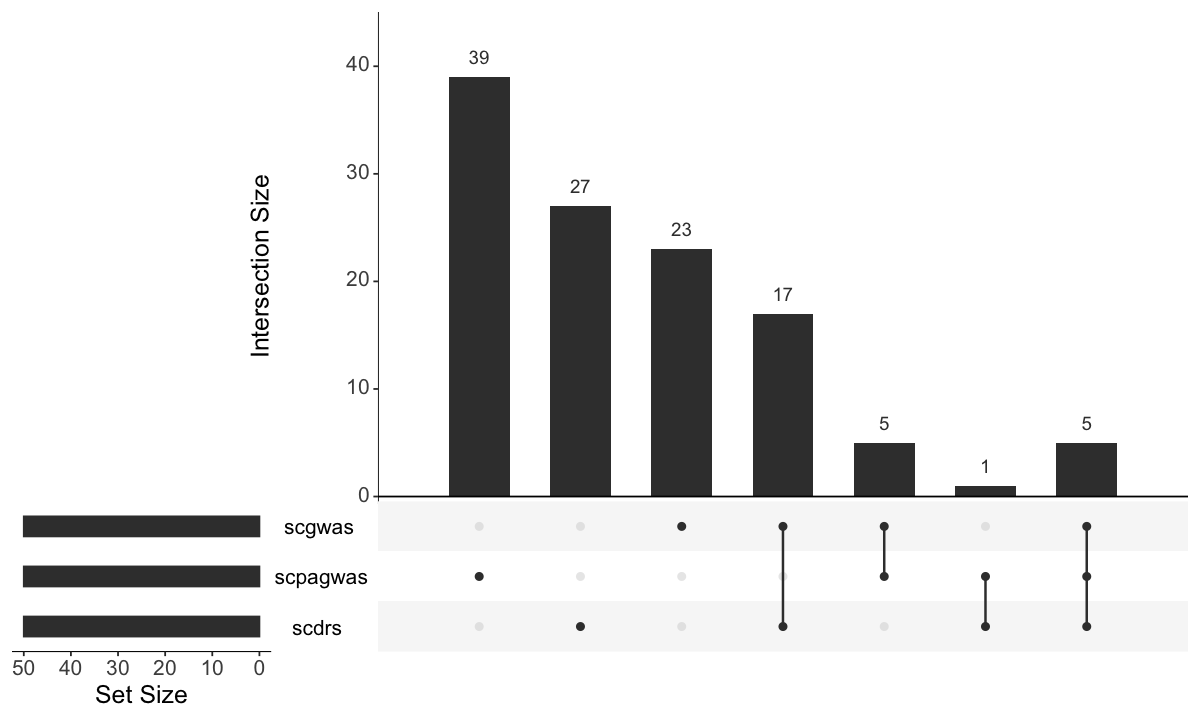

In [51]:
scg_cp = fread("~/Downloads/RA_scgwas_geneoverlap.tsv", skip=9, sep="\t")
scp_cp = fread("~/Downloads/RA_scpagwas_geneoverlap_top500.tsv", skip=9, sep="\t")
scdrs_cp = fread("~/Downloads/RA_scdrs_geneoverlap_top500.tsv", skip=9, sep="\t")
scdrs_cp[1:2,]
upset(fromList(list("scgwas"=scg_cp[["Gene Set Name"]], "scpagwas"=scp_cp[["Gene Set Name"]], "scdrs"=scdrs_cp[["Gene Set Name"]])), 
      nsets=3, text.scale=1.8)
length(unique(scdrs_cp$Description))
length(unique(scdrs_cp[["Gene Set Name"]]))


### UC

Warning message in fread("~/Downloads/UC_scgwas_geneoverlap_C8.tsv", skip = 9, sep = "\t"):
“Stopped early on line 17. Expected 7 fields but found 0. Consider fill=TRUE and comment.char=. First discarded non-empty line: <<Gene/Gene Set Overlap Matrix>>”
Warning message in fread("~/Downloads/UC_magma10kb_top500_C8.tsv", skip = 9, sep = "\t"):
“Stopped early on line 61. Expected 7 fields but found 0. Consider fill=TRUE and comment.char=. First discarded non-empty line: <<Gene/Gene Set Overlap Matrix>>”
Warning message in fread("~/Downloads/UC_scpagwas_norib_top500_C8.tsv", skip = 9, :
“Stopped early on line 61. Expected 7 fields but found 0. Consider fill=TRUE and comment.char=. First discarded non-empty line: <<Gene/Gene Set Overlap Matrix>>”
Warning message in fread("~/Downloads/UC_scpagwas_geneoverlap_C8_top500.tsv", skip = 9, :
“Stopped early on line 61. Expected 7 fields but found 0. Consider fill=TRUE and comment.char=. First discarded non-empty line: <<Gene/Gene Set Overlap Matrix

Gene Set Name                                  # Genes in Gene Set (K)
1 TRAVAGLINI_LUNG_PLATELET_MEGAKARYOCYTE_CELL    605                    
2 AIZARANI_LIVER_C24_EPCAM_POS_BILE_DUCT_CELLS_3 185                    
  Description # Genes in Overlap (k) k/K    p-value  FDR q-value
1             3                      0.0050 2.79e-05 0.0235     
2             2                      0.0108 1.86e-04 0.0453

[1] "Only MAGMA"


[1] "BUSSLINGER_GASTRIC_IMMUNE_CELLS"                         
 [2] "DESCARTES_FETAL_CEREBELLUM_MICROGLIA"                    
 [3] "HE_LIM_SUN_FETAL_LUNG_C4_CYCLING_NK_CELL"                
 [4] "HE_LIM_SUN_FETAL_LUNG_C4_CYCLING_T_CELL"                 
 [5] "MURARO_PANCREAS_ENDOTHELIAL_CELL"                        
 [6] "AIZARANI_LIVER_C25_KUPFFER_CELLS_4"                      
 [7] "HE_LIM_SUN_FETAL_LUNG_C7_PROLIFERATING_SCHWANN_CELL"     
 [8] "CUI_DEVELOPING_HEART_C9_B_T_CELL"                        
 [9] "AIZARANI_LIVER_C34_MHC_II_POS_B_CELLS"                   
[10] "TRAVAGLINI_LUNG_NEUTROPHIL_CELL"                         
[11] "DESCARTES_FETAL_CEREBRUM_MICROGLIA"                      
[12] "AIZARANI_LIVER_C23_KUPFFER_CELLS_3"                      
[13] "AIZARANI_LIVER_C28_NK_NKT_CELLS_6"                       
[14] "HE_LIM_SUN_FETAL_LUNG_C3_CYCLING_DEFINITIVE_ERYTHROBLAST"
[15] "GAO_LARGE_INTESTINE_24W_C11_PANETH_LIKE_CELL"            
[16] "HE_LIM_SUN_FETAL_LUNG_C5_PRO_B_CELL"                     
[17] "DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_DENDRITIC_CELLS" 
[18] "HE_LIM_SUN_FETAL_LUNG_C3_OMD_POS_ENDOTHELIAL_CELL"       
[19] "TRAVAGLINI_LUNG_B_CELL"                                  
[20] "DESCARTES_FETAL_MUSCLE_LYMPHOID_CELLS"                   
[21] "DESCARTES_FETAL_LIVER_LYMPHOID_CELLS"                    
[22] "HE_LIM_SUN_FETAL_LUNG_C0_MESENCHYMAL_2_CELL"             
[23] "HAY_BONE_MARROW_NEUTROPHIL"                              
[24] "FAN_EMBRYONIC_CTX_BIG_GROUPS_BRAIN_IMMUNE"               
[25] "DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_MATURE_NEURONS"  
[26] "HE_LIM_SUN_FETAL_LUNG_C1_PROXIMAL_SECRETORY_3_CELL"      
[27] "HE_LIM_SUN_FETAL_LUNG_C1_EARLY_STALK_CELL"

[1] "Only SCGWAS"


[1] "AIZARANI_LIVER_C7_EPCAM_POS_BILE_DUCT_CELLS_2"
[2] "RUBENSTEIN_SKELETAL_MUSCLE_NK_CELLS"

[1] "Only SCDRS"


[1] "HAY_BONE_MARROW_PLASMA_CELL"                             
 [2] "AIZARANI_LIVER_C8_RESIDENT_B_CELLS_1"                    
 [3] "BUSSLINGER_DUODENAL_MATURE_ENTEROCYTES"                  
 [4] "AIZARANI_LIVER_C22_RESIDENT_B_CELLS_2"                   
 [5] "BUSSLINGER_DUODENAL_LATE_IMMATURE_ENTEROCYTES"           
 [6] "DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_PLASMA_CELLS"    
 [7] "BUSSLINGER_GASTRIC_MATURE_PIT_CELLS"                     
 [8] "DESCARTES_FETAL_INTESTINE_INTESTINAL_EPITHELIAL_CELLS"   
 [9] "AIZARANI_LIVER_C38_RESIDENT_B_CELLS_3"                   
[10] "MENON_FETAL_KIDNEY_8_CONNECTING_TUBULE_CELLS"            
[11] "TRAVAGLINI_LUNG_GOBLET_CELL"                             
[12] "DESCARTES_FETAL_STOMACH_MUC13_DMBT1_POSITIVE_CELLS"      
[13] "BUSSLINGER_GASTRIC_IMMATURE_PIT_CELLS"                   
[14] "DESCARTES_FETAL_KIDNEY_URETERIC_BUD_CELLS"               
[15] "FAN_EMBRYONIC_CTX_BIG_GROUPS_MICROGLIA"                  
[16] "BUSSLINGER_DUODENAL_EARLY_IMMATURE_ENTEROCYTES"          
[17] "HE_LIM_SUN_FETAL_LUNG_C5_CD5_POS_CCL22_NEG_MATURE_B_CELL"
[18] "TRAVAGLINI_LUNG_ALVEOLAR_EPITHELIAL_TYPE_1_CELL"         
[19] "AIZARANI_LIVER_C39_EPCAM_POS_BILE_DUCT_CELLS_4"          
[20] "ZHONG_PFC_MAJOR_TYPES_MICROGLIA"                         
[21] "HE_LIM_SUN_FETAL_LUNG_C1_SQUAMOUS_CELL"                  
[22] "GAO_LARGE_INTESTINE_24W_C10_ENTEROCYTE"                  
[23] "DESCARTES_FETAL_PLACENTA_LYMPHOID_CELLS"

[1] "Only SCPAGWAS"


[1] "BUSSLINGER_DUODENAL_DIFFERENTIATING_STEM_CELLS"                         
 [2] "RUBENSTEIN_SKELETAL_MUSCLE_SATELLITE_CELLS"                             
 [3] "BUSSLINGER_DUODENAL_TRANSIT_AMPLIFYING_CELLS"                           
 [4] "BUSSLINGER_DUODENAL_STEM_CELLS"                                         
 [5] "LAKE_ADULT_KIDNEY_C8_DECENDING_THIN_LIMB"                               
 [6] "LAKE_ADULT_KIDNEY_C9_THIN_ASCENDING_LIMB"                               
 [7] "LAKE_ADULT_KIDNEY_C10_THIN_ASCENDING_LIMB"                              
 [8] "RUBENSTEIN_SKELETAL_MUSCLE_T_CELLS"                                     
 [9] "LAKE_ADULT_KIDNEY_C19_COLLECTING_DUCT_INTERCALATED_CELLS_TYPE_A_MEDULLA"
[10] "LAKE_ADULT_KIDNEY_C18_COLLECTING_DUCT_PRINCIPAL_CELLS_MEDULLA"          
[11] "RUBENSTEIN_SKELETAL_MUSCLE_SMOOTH_MUSCLE_CELLS"                         
[12] "TRAVAGLINI_LUNG_BRONCHIAL_VESSEL_1_CELL"                                
[13] "BUSSLINGER_GASTRIC_PPP1R1B_POSITIVE_CELLS"                              
[14] "FAN_OVARY_CL10_PUTATIVE_EARLY_ATRESIA_GRANULOSA_CELL"                   
[15] "RUBENSTEIN_SKELETAL_MUSCLE_B_CELLS"                                     
[16] "LAKE_ADULT_KIDNEY_C7_PROXIMAL_TUBULE_EPITHELIAL_CELLS_S3"               
[17] "FAN_OVARY_CL2_PUTATIVE_EARLY_ATRETIC_FOLLICLE_THECAL_CELL_1"            
[18] "FAN_OVARY_CL0_XBP1_SELK_HIGH_STROMAL_CELL"                              
[19] "BUSSLINGER_GASTRIC_LYZ_POSITIVE_CELLS"                                  
[20] "RUBENSTEIN_SKELETAL_MUSCLE_PCV_ENDOTHELIAL_CELLS"                       
[21] "TRAVAGLINI_LUNG_CD4_NAIVE_T_CELL"                                       
[22] "TRAVAGLINI_LUNG_CLUB_CELL"                                              
[23] "RUBENSTEIN_SKELETAL_MUSCLE_FBN1_FAP_CELLS"                              
[24] "MURARO_PANCREAS_MESENCHYMAL_STROMAL_CELL"                               
[25] "FAN_OVARY_CL1_GPRC5A_TNFRS12A_HIGH_SELECTABLE_FOLLICLE_STROMAL_CELL"    
[26] "MENON_FETAL_KIDNEY_1_EMBRYONIC_RED_BLOOD_CELLS"                         
[27] "MANNO_MIDBRAIN_NEUROTYPES_BASAL"                                        
[28] "TRAVAGLINI_LUNG_BASAL_CELL"                                             
[29] "FAN_OVARY_CL14_MATURE_SMOOTH_MUSCLE_CELL"                               
[30] "TRAVAGLINI_LUNG_MACROPHAGE_CELL"                                        
[31] "LAKE_ADULT_KIDNEY_C23_ENDOTHELIAL_CELLS_AVR"                            
[32] "FAN_OVARY_CL6_PUTATIVE_EARLY_ATRETIC_FOLLICLE_THECAL_CELL_2"

[1] "Only SCPAGWAS (NO rib) and NOT scpwagwas"


[1] "RUBENSTEIN_SKELETAL_MUSCLE_PERICYTES"               
 [2] "RUBENSTEIN_SKELETAL_MUSCLE_FAP_CELLS"               
 [3] "BUSSLINGER_ESOPHAGEAL_DENDRITIC_CELLS"              
 [4] "AIZARANI_LIVER_C6_KUPFFER_CELLS_2"                  
 [5] "FAN_OVARY_CL15_SMALL_ANTRAL_FOLLICLE_GRANULOSA_CELL"
 [6] "JONES_OVARY_STROMAL"                                
 [7] "FAN_OVARY_CL3_MATURE_CUMULUS_GRANULOSA_CELL_1"      
 [8] "FAN_OVARY_CL7_ANGEIOGENIC_ENDOTHELIAL_CELL"         
 [9] "BUSSLINGER_GASTRIC_PARIETAL_CELLS"                  
[10] "DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_MACROPHAGES"

[1] "Only SCPAGWAS (NO rib) and IN scpwagwas"


[1] "BUSSLINGER_DUODENAL_DIFFERENTIATING_STEM_CELLS"                         
 [2] "FAN_OVARY_CL10_PUTATIVE_EARLY_ATRESIA_GRANULOSA_CELL"                   
 [3] "RUBENSTEIN_SKELETAL_MUSCLE_SMOOTH_MUSCLE_CELLS"                         
 [4] "RUBENSTEIN_SKELETAL_MUSCLE_SATELLITE_CELLS"                             
 [5] "BUSSLINGER_DUODENAL_TRANSIT_AMPLIFYING_CELLS"                           
 [6] "LAKE_ADULT_KIDNEY_C10_THIN_ASCENDING_LIMB"                              
 [7] "BUSSLINGER_DUODENAL_STEM_CELLS"                                         
 [8] "RUBENSTEIN_SKELETAL_MUSCLE_FBN1_FAP_CELLS"                              
 [9] "FAN_OVARY_CL14_MATURE_SMOOTH_MUSCLE_CELL"                               
[10] "LAKE_ADULT_KIDNEY_C8_DECENDING_THIN_LIMB"                               
[11] "LAKE_ADULT_KIDNEY_C9_THIN_ASCENDING_LIMB"                               
[12] "MURARO_PANCREAS_MESENCHYMAL_STROMAL_CELL"                               
[13] "LAKE_ADULT_KIDNEY_C18_COLLECTING_DUCT_PRINCIPAL_CELLS_MEDULLA"          
[14] "FAN_OVARY_CL6_PUTATIVE_EARLY_ATRETIC_FOLLICLE_THECAL_CELL_2"            
[15] "FAN_OVARY_CL1_GPRC5A_TNFRS12A_HIGH_SELECTABLE_FOLLICLE_STROMAL_CELL"    
[16] "LAKE_ADULT_KIDNEY_C19_COLLECTING_DUCT_INTERCALATED_CELLS_TYPE_A_MEDULLA"
[17] "TRAVAGLINI_LUNG_MACROPHAGE_CELL"

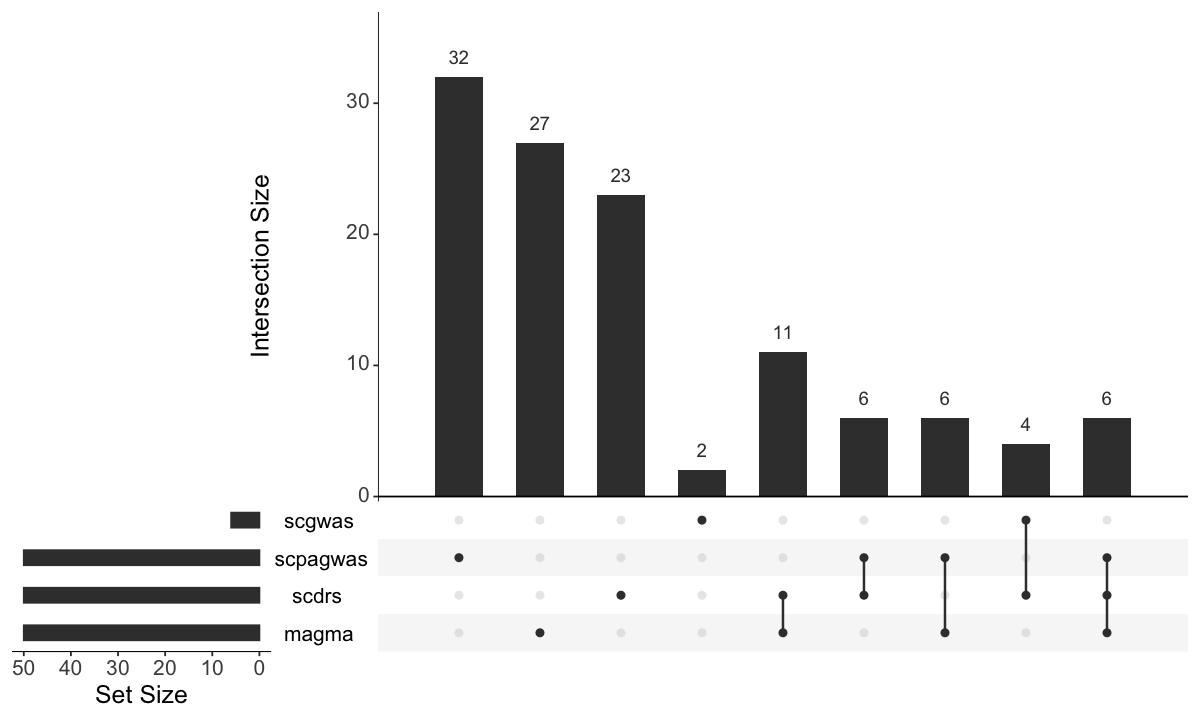

In [53]:
# C8
scg_c8 = fread("~/Downloads/UC_scgwas_geneoverlap_C8.tsv", skip=9, sep="\t")
magma_c8 = fread("~/Downloads/UC_magma10kb_top500_C8.tsv", skip=9, sep="\t")
scp_norib_c8 = fread("~/Downloads/UC_scpagwas_norib_top500_C8.tsv", skip=9, sep="\t")
scp_c8 = fread("~/Downloads/UC_scpagwas_geneoverlap_C8_top500.tsv", skip=9, sep="\t")
scdrs_c8 = fread("~/Downloads/UC_scdrs_geneoverlap_C8_top500.tsv", skip=9, sep="\t")
scg_c8[1:2,]
upset(fromList(list("scgwas"=scg_c8[["Gene Set Name"]], "scpagwas"=scp_c8[["Gene Set Name"]], "scdrs"=scdrs_c8[["Gene Set Name"]], 
                   "magma"=magma_c8[["Gene Set Name"]])), 
      nsets=4, text.scale=1.8)

print("Only MAGMA")
setdiff(magma_c8[["Gene Set Name"]], union(union(scg_c8[["Gene Set Name"]], scp_c8[["Gene Set Name"]]), scdrs_c8[["Gene Set Name"]]))
# hematopoietic stem cell (HSC)

print("Only SCGWAS")
setdiff(scg_c8[["Gene Set Name"]], union(union(magma_c8[["Gene Set Name"]], scp_c8[["Gene Set Name"]]), scdrs_c8[["Gene Set Name"]]))

print("Only SCDRS")
setdiff(scdrs_c8[["Gene Set Name"]], union(union(magma_c8[["Gene Set Name"]], scp_c8[["Gene Set Name"]]), scg_c8[["Gene Set Name"]]))

print("Only SCPAGWAS")
setdiff(scp_c8[["Gene Set Name"]], union(union(magma_c8[["Gene Set Name"]], scdrs_c8[["Gene Set Name"]]), scg_c8[["Gene Set Name"]]))

print("Only SCPAGWAS (NO rib) and NOT scpwagwas")
setdiff(setdiff(scp_norib_c8[["Gene Set Name"]], union(union(magma_c8[["Gene Set Name"]], scdrs_c8[["Gene Set Name"]]), scg_c8[["Gene Set Name"]])), scp_c8[["Gene Set Name"]])

print("Only SCPAGWAS (NO rib) and IN scpwagwas")
intersect(setdiff(scp_norib_c8[["Gene Set Name"]], union(union(magma_c8[["Gene Set Name"]], scdrs_c8[["Gene Set Name"]]), scg_c8[["Gene Set Name"]])), scp_c8[["Gene Set Name"]])

### Results that don't make immediate sense
* MAGMA: HE_LIM_SUN_FETAL_LUNG_C1_EARLY_STALK_CELL'
* SCGWAS: None
* SCDRS: 
    * DESCARTES_FETAL_KIDNEY_URETERIC_BUD_CELLS related to ducts
* SCPAGWAS: 
    * RUBENSTEIN_SKELETAL_MUSCLE_SATELLITE_CELLS, TRAVAGLINI_LUNG_BRONCHIAL_VESSEL_1_CELL, FAN_OVARY_CL10_PUTATIVE_EARLY_ATRESIA_GRANULOSA_CEL, FAN_OVARY_CL2_PUTATIVE_EARLY_ATRETIC_FOLLICLE_THECAL_CELL_1, RUBENSTEIN_SKELETAL_MUSCLE_FBN1_FAP_CELLS, FAN_OVARY_CL14_MATURE_SMOOTH_MUSCLE_CELL, FAN_OVARY_CL6_PUTATIVE_EARLY_ATRETIC_FOLLICLE_THECAL_CELL_2
    * Differentation: 'MANNO_MIDBRAIN_NEUROTYPES_BASAL, TRAVAGLINI_LUNG_BASAL_CELL
* SCPAGWAS (No rib):
    * Same as above

Warning message in fread("~/Downloads/UC_scgwas_geneoverlap_CP.tsv", skip = 9, sep = "\t"):
“Stopped early on line 19. Expected 7 fields but found 0. Consider fill=TRUE and comment.char=. First discarded non-empty line: <<Gene/Gene Set Overlap Matrix>>”
Warning message in fread("~/Downloads/UC_scpagwas_geneoverlap_CP_top500.tsv", skip = 9, :
“Stopped early on line 61. Expected 7 fields but found 0. Consider fill=TRUE and comment.char=. First discarded non-empty line: <<Gene/Gene Set Overlap Matrix>>”
Warning message in fread("~/Downloads/UC_scdrs_geneoverlap_CP_top500.tsv", skip = 9, :
“Stopped early on line 61. Expected 7 fields but found 0. Consider fill=TRUE and comment.char=. First discarded non-empty line: <<Gene/Gene Set Overlap Matrix>>”


Gene Set Name                          # Genes in Gene Set (K)
1 REACTOME_INNATE_IMMUNE_SYSTEM          1128                   
2 REACTOME_CELLULAR_RESPONSES_TO_STIMULI  828                   
  Description                   # Genes in Overlap (k) k/K    p-value 
1 Innate Immune System          64                     0.0567 5.33e-26
2 Cellular responses to stimuli 45                     0.0543 8.53e-18
  FDR q-value
1 2.09e-22   
2 1.67e-14

[1] 50

[1] 50

[1] "REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE"
 [2] "REACTOME_TRANSLATION"                                                
 [3] "REACTOME_CELLULAR_RESPONSES_TO_STIMULI"                              
 [4] "REACTOME_INFECTIOUS_DISEASE"                                         
 [5] "REACTOME_VIRAL_INFECTION_PATHWAYS"                                   
 [6] "WP_ELECTRON_TRANSPORT_CHAIN_OXPHOS_SYSTEM_IN_MITOCHONDRIA"           
 [7] "KEGG_OXIDATIVE_PHOSPHORYLATION"                                      
 [8] "KEGG_PARKINSONS_DISEASE"                                             
 [9] "REACTOME_AEROBIC_RESPIRATION_AND_RESPIRATORY_ELECTRON_TRANSPORT"     
[10] "REACTOME_INNATE_IMMUNE_SYSTEM"                                       
[11] "REACTOME_SARS_COV_INFECTIONS"                                        
[12] "WP_VEGFAVEGFR2_SIGNALING"                                            
[13] "REACTOME_NEUTROPHIL_DEGRANULATION"                                   
[14] "REACTOME_RESPIRATORY_ELECTRON_TRANSPORT"                             
[15] "WP_NONALCOHOLIC_FATTY_LIVER_DISEASE"                                 
[16] "REACTOME_MITOCHONDRIAL_PROTEIN_DEGRADATION"                          
[17] "REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS"                       
[18] "REACTOME_CYTOKINE_SIGNALING_IN_IMMUNE_SYSTEM"

[1] "scgpagwas only"


[1] "KEGG_MEDICUS_REFERENCE_TRANSLATION_INITIATION"                                                                 
 [2] "REACTOME_EUKARYOTIC_TRANSLATION_ELONGATION"                                                                    
 [3] "REACTOME_EUKARYOTIC_TRANSLATION_INITIATION"                                                                    
 [4] "KEGG_RIBOSOME"                                                                                                 
 [5] "WP_CYTOPLASMIC_RIBOSOMAL_PROTEINS"                                                                             
 [6] "REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY"                                                    
 [7] "REACTOME_NONSENSE_MEDIATED_DECAY_NMD"                                                                          
 [8] "REACTOME_SELENOAMINO_ACID_METABOLISM"                                                                          
 [9] "REACTOME_INFLUENZA_INFECTION"                                                                                  
[10] "REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS"                                                          
[11] "REACTOME_CELLULAR_RESPONSE_TO_STARVATION"                                                                      
[12] "REACTOME_SIGNALING_BY_ROBO_RECEPTORS"                                                                          
[13] "REACTOME_RRNA_PROCESSING"                                                                                      
[14] "REACTOME_METABOLISM_OF_RNA"                                                                                    
[15] "REACTOME_NERVOUS_SYSTEM_DEVELOPMENT"                                                                           
[16] "REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES"                                                            
[17] "REACTOME_DEVELOPMENTAL_BIOLOGY"                                                                                
[18] "REACTOME_ACTIVATION_OF_THE_MRNA_UPON_BINDING_OF_THE_CAP_BINDING_COMPLEX_AND_EIFS_AND_SUBSEQUENT_BINDING_TO_43S"
[19] "REACTOME_SARS_COV_2_MODULATES_HOST_TRANSLATION_MACHINERY"                                                      
[20] "REACTOME_SARS_COV_1_MODULATES_HOST_TRANSLATION_MACHINERY"                                                      
[21] "REACTOME_SARS_COV_1_HOST_INTERACTIONS"                                                                         
[22] "REACTOME_SARS_COV_1_INFECTION"                                                                                 
[23] "KEGG_HUNTINGTONS_DISEASE"                                                                                      
[24] "REACTOME_SARS_COV_2_HOST_INTERACTIONS"                                                                         
[25] "KEGG_ALZHEIMERS_DISEASE"                                                                                       
[26] "REACTOME_SARS_COV_2_INFECTION"                                                                                 
[27] "WP_OXIDATIVE_PHOSPHORYLATION"                                                                                  
[28] "REACTOME_FORMATION_OF_ATP_BY_CHEMIOSMOTIC_COUPLING"                                                            
[29] "KEGG_CARDIAC_MUSCLE_CONTRACTION"                                                                               
[30] "REACTOME_CRISTAE_FORMATION"                                                                                    
[31] "REACTOME_TP53_REGULATES_METABOLIC_GENES"                                                                       
[32] "KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_ABETA_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV"

[1] "scdrs only"


[1] "REACTOME_ROLE_OF_PHOSPHOLIPIDS_IN_PHAGOCYTOSIS"                                           
 [2] "REACTOME_FCGR3A_MEDIATED_IL10_SYNTHESIS"                                                  
 [3] "REACTOME_CELL_SURFACE_INTERACTIONS_AT_THE_VASCULAR_WALL"                                  
 [4] "REACTOME_FCGR_ACTIVATION"                                                                 
 [5] "REACTOME_TRANSPORT_OF_SMALL_MOLECULES"                                                    
 [6] "REACTOME_ANTI_INFLAMMATORY_RESPONSE_FAVOURING_LEISHMANIA_PARASITE_INFECTION"              
 [7] "REACTOME_ADAPTIVE_IMMUNE_SYSTEM"                                                          
 [8] "REACTOME_SCAVENGING_OF_HEME_FROM_PLASMA"                                                  
 [9] "REACTOME_LEISHMANIA_INFECTION"                                                            
[10] "REACTOME_BINDING_AND_UPTAKE_OF_LIGANDS_BY_SCAVENGER_RECEPTORS"                            
[11] "REACTOME_FCGAMMA_RECEPTOR_FCGR_DEPENDENT_PHAGOCYTOSIS"                                    
[12] "REACTOME_CREATION_OF_C4_AND_C2_ACTIVATORS"                                                
[13] "REACTOME_POTENTIAL_THERAPEUTICS_FOR_SARS"                                                 
[14] "REACTOME_CD22_MEDIATED_BCR_REGULATION"                                                    
[15] "WP_PANCREATIC_CANCER_SUBTYPES"                                                            
[16] "REACTOME_INITIAL_TRIGGERING_OF_COMPLEMENT"                                                
[17] "REACTOME_IMMUNOREGULATORY_INTERACTIONS_BETWEEN_A_LYMPHOID_AND_A_NON_LYMPHOID_CELL"        
[18] "REACTOME_SIGNALING_BY_THE_B_CELL_RECEPTOR_BCR"                                            
[19] "WP_PHOTODYNAMIC_THERAPYINDUCED_UNFOLDED_PROTEIN_RESPONSE"                                 
[20] "REACTOME_ANTIGEN_ACTIVATES_B_CELL_RECEPTOR_BCR_LEADING_TO_GENERATION_OF_SECOND_MESSENGERS"
[21] "REACTOME_FCERI_MEDIATED_MAPK_ACTIVATION"                                                  
[22] "KEGG_MAPK_SIGNALING_PATHWAY"                                                              
[23] "REACTOME_PARASITE_INFECTION"                                                              
[24] "KEGG_PROTEIN_EXPORT"                                                                      
[25] "REACTOME_FCERI_MEDIATED_CA_2_MOBILIZATION"                                                
[26] "REACTOME_ROLE_OF_LAT2_NTAL_LAB_ON_CALCIUM_MOBILIZATION"                                   
[27] "REACTOME_UNFOLDED_PROTEIN_RESPONSE_UPR"                                                   
[28] "REACTOME_COMPLEMENT_CASCADE"                                                              
[29] "WP_EXTRAFOLLICULAR_AND_FOLLICULAR_B_CELL_ACTIVATION_BY_SARSCOV2"                          
[30] "WP_IL18_SIGNALING"                                                                        
[31] "WP_MAPK_SIGNALING"                                                                        
[32] "REACTOME_FC_EPSILON_RECEPTOR_FCERI_SIGNALING"

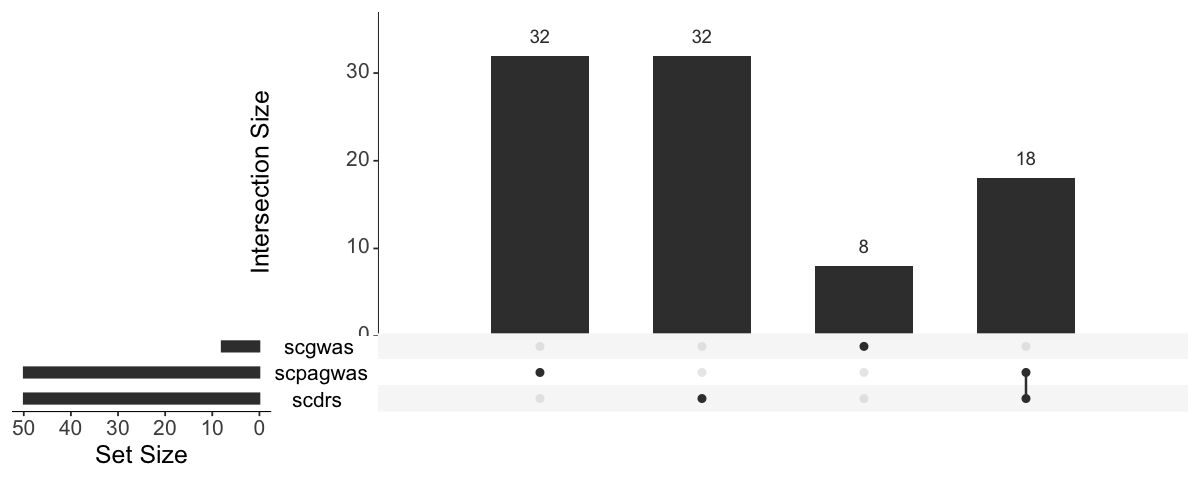

In [203]:
# C8
scg_cp = fread("~/Downloads/UC_scgwas_geneoverlap_CP.tsv", skip=9, sep="\t")
scp_cp = fread("~/Downloads/UC_scpagwas_geneoverlap_CP_top500.tsv", skip=9, sep="\t")
scdrs_cp = fread("~/Downloads/UC_scdrs_geneoverlap_CP_top500.tsv", skip=9, sep="\t")
scdrs_cp[1:2,]
upset(fromList(list("scgwas"=scg_cp[["Gene Set Name"]], "scpagwas"=scp_cp[["Gene Set Name"]], "scdrs"=scdrs_cp[["Gene Set Name"]])), 
      nsets=3, text.scale=1.8)
length(unique(scdrs_cp$Description))
length(unique(scdrs_cp[["Gene Set Name"]]))
intersect(scp_cp[["Gene Set Name"]], scdrs_cp[["Gene Set Name"]])
print("scgpagwas only")
setdiff(scp_cp[["Gene Set Name"]], scdrs_cp[["Gene Set Name"]])

print("scdrs only")
setdiff(scdrs_cp[["Gene Set Name"]], scp_cp[["Gene Set Name"]])

Warning message in fread("~/Downloads/UC_scgwas_geneoverlap.tsv", skip = 9, sep = "\t"):
“Stopped early on line 20. Expected 7 fields but found 0. Consider fill=TRUE and comment.char=. First discarded non-empty line: <<Gene/Gene Set Overlap Matrix>>”
Warning message in fread("~/Downloads/UC_scpagwas_geneoverlap_top500.tsv", skip = 9, :
“Stopped early on line 61. Expected 7 fields but found 0. Consider fill=TRUE and comment.char=. First discarded non-empty line: <<Gene/Gene Set Overlap Matrix>>”
Warning message in fread("~/Downloads/UC_scdrs_geneoverlap_top500.tsv", skip = 9, :
“Stopped early on line 61. Expected 7 fields but found 0. Consider fill=TRUE and comment.char=. First discarded non-empty line: <<Gene/Gene Set Overlap Matrix>>”


Gene Set Name                                 # Genes in Gene Set (K)
1 GSE29614_DAY3_VS_DAY7_TIV_FLU_VACCINE_PBMC_DN 191                    
2 SHEDDEN_LUNG_CANCER_GOOD_SURVIVAL_A12         318                    
  Description                                                                                                                                                                  
1 Genes down-regulated in comparison of peripheral blood mononuclear cells (PBMC) from TIV influenza vaccinee at day 3 post-vaccination versus those at day 7 post-vaccination.
2 Cluster 12 of method A: up-regulation of these genes in patients with non-small cell lung cancer (NSCLC) predicts good survival outcome.                                     
  # Genes in Overlap (k) k/K    p-value  FDR q-value
1 46                     0.2408 5.24e-47 1.24e-42   
2 51                     0.1604 1.69e-42 2.00e-38

[1] 49

[1] 50

[1] "LI_AMPLIFIED_IN_LUNG_CANCER"

[1] "scgpagwas only"


[1] "HSIAO_HOUSEKEEPING_GENES"                                                                                      
 [2] "JIANG_MELANOMA_TRM8_CD4"                                                                                       
 [3] "GSE2405_0H_VS_24H_A_PHAGOCYTOPHILUM_STIM_NEUTROPHIL_UP"                                                        
 [4] "GSE2405_0H_VS_9H_A_PHAGOCYTOPHILUM_STIM_NEUTROPHIL_DN"                                                         
 [5] "KEGG_MEDICUS_REFERENCE_TRANSLATION_INITIATION"                                                                 
 [6] "REACTOME_EUKARYOTIC_TRANSLATION_ELONGATION"                                                                    
 [7] "REACTOME_EUKARYOTIC_TRANSLATION_INITIATION"                                                                    
 [8] "KEGG_RIBOSOME"                                                                                                 
 [9] "WP_CYTOPLASMIC_RIBOSOMAL_PROTEINS"                                                                             
[10] "REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY"                                                    
[11] "GOBP_CYTOPLASMIC_TRANSLATION"                                                                                  
[12] "REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE"                                          
[13] "REACTOME_NONSENSE_MEDIATED_DECAY_NMD"                                                                          
[14] "REACTOME_SELENOAMINO_ACID_METABOLISM"                                                                          
[15] "REACTOME_INFLUENZA_INFECTION"                                                                                  
[16] "REACTOME_TRANSLATION"                                                                                          
[17] "REACTOME_REGULATION_OF_EXPRESSION_OF_SLITS_AND_ROBOS"                                                          
[18] "JIANG_MELANOMA_TRM3_CD8"                                                                                       
[19] "REACTOME_CELLULAR_RESPONSE_TO_STARVATION"                                                                      
[20] "REACTOME_SIGNALING_BY_ROBO_RECEPTORS"                                                                          
[21] "REACTOME_RRNA_PROCESSING"                                                                                      
[22] "REACTOME_CELLULAR_RESPONSES_TO_STIMULI"                                                                        
[23] "REACTOME_INFECTIOUS_DISEASE"                                                                                   
[24] "REACTOME_METABOLISM_OF_RNA"                                                                                    
[25] "REACTOME_NERVOUS_SYSTEM_DEVELOPMENT"                                                                           
[26] "PECE_MAMMARY_STEM_CELL_UP"                                                                                     
[27] "BILANGES_SERUM_AND_RAPAMYCIN_SENSITIVE_GENES"                                                                  
[28] "GOBP_ORGANONITROGEN_COMPOUND_BIOSYNTHETIC_PROCESS"                                                             
[29] "REACTOME_VIRAL_INFECTION_PATHWAYS"                                                                             
[30] "GOBP_TRANSLATION"                                                                                              
[31] "JIANG_MELANOMA_TRM9_CD8"                                                                                       
[32] "WANG_TUMOR_INVASIVENESS_UP"                                                                                    
[33] "GSE41978_ID2_KO_VS_ID2_KO_AND_BIM_KO_KLRG1_LOW_EFFECTOR_CD8_TCELL_DN"                                          
[34] "MARTENS_TRETINOIN_RESPONSE_DN"                                                                       

[1] "scdrs only"


[1] "GSE29614_DAY3_VS_DAY7_TIV_FLU_VACCINE_PBMC_DN"                                 
 [2] "SHEDDEN_LUNG_CANCER_GOOD_SURVIVAL_A12"                                         
 [3] "GSE22886_NAIVE_BCELL_VS_BM_PLASMA_CELL_DN"                                     
 [4] "GSE29614_CTRL_VS_DAY7_TIV_FLU_VACCINE_PBMC_DN"                                 
 [5] "TARTE_PLASMA_CELL_VS_B_LYMPHOCYTE_UP"                                          
 [6] "CHARAFE_BREAST_CANCER_LUMINAL_VS_MESENCHYMAL_UP"                               
 [7] "ENK_UV_RESPONSE_KERATINOCYTE_UP"                                               
 [8] "GSE29617_CTRL_VS_DAY7_TIV_FLU_VACCINE_PBMC_2008_DN"                            
 [9] "GSE13411_PLASMA_CELL_VS_MEMORY_BCELL_UP"                                       
[10] "PASQUALUCCI_LYMPHOMA_BY_GC_STAGE_UP"                                           
[11] "HELLER_HDAC_TARGETS_SILENCED_BY_METHYLATION_DN"                                
[12] "GSE12845_IGD_POS_VS_NEG_BLOOD_BCELL_DN"                                        
[13] "GOBP_BIOLOGICAL_PROCESS_INVOLVED_IN_INTERSPECIES_INTERACTION_BETWEEN_ORGANISMS"
[14] "SWEET_LUNG_CANCER_KRAS_UP"                                                     
[15] "MCLACHLAN_DENTAL_CARIES_UP"                                                    
[16] "SHAFFER_IRF4_TARGETS_IN_PLASMA_CELL_VS_MATURE_B_LYMPHOCYTE"                    
[17] "GOBP_SMALL_MOLECULE_METABOLIC_PROCESS"                                         
[18] "SHAFFER_IRF4_TARGETS_IN_MYELOMA_VS_MATURE_B_LYMPHOCYTE"                        
[19] "ANDERSEN_CHOLANGIOCARCINOMA_CLASS2"                                            
[20] "GOBP_REGULATION_OF_IMMUNE_SYSTEM_PROCESS"                                      
[21] "GSE29164_CD8_TCELL_VS_CD8_TCELL_AND_IL12_TREATED_MELANOMA_DAY7_DN"             
[22] "REACTOME_INNATE_IMMUNE_SYSTEM"                                                 
[23] "GSE22886_IGM_MEMORY_BCELL_VS_BM_PLASMA_CELL_DN"                                
[24] "FEVR_CTNNB1_TARGETS_UP"                                                        
[25] "SHAFFER_IRF4_TARGETS_IN_ACTIVATED_DENDRITIC_CELL"                              
[26] "GRAESSMANN_APOPTOSIS_BY_DOXORUBICIN_UP"                                        
[27] "ONDER_CDH1_TARGETS_2_DN"                                                       
[28] "GOBP_APOPTOTIC_PROCESS"                                                        
[29] "GOBP_RESPONSE_TO_ENDOPLASMIC_RETICULUM_STRESS"                                 
[30] "HOLLERN_EMT_BREAST_TUMOR_DN"                                                   
[31] "JIANG_MELANOMA_TRM1_CD8"                                                       
[32] "VECCHI_GASTRIC_CANCER_ADVANCED_VS_EARLY_DN"                                    
[33] "GOBP_POSITIVE_REGULATION_OF_IMMUNE_SYSTEM_PROCESS"                             
[34] "WAMUNYOKOLI_OVARIAN_CANCER_LMP_UP"                                             
[35] "COLDREN_GEFITINIB_RESISTANCE_DN"                                               
[36] "SABATES_COLORECTAL_ADENOMA_DN"                                                 
[37] "CREIGHTON_ENDOCRINE_THERAPY_RESISTANCE_3"                                      
[38] "MILI_PSEUDOPODIA_HAPTOTAXIS_DN"                                                
[39] "LIM_MAMMARY_STEM_CELL_DN"                                                      
[40] "HELLER_HDAC_TARGETS_DN"                                                        
[41] "GOBP_CELLULAR_RESPONSE_TO_ORGANIC_SUBSTANCE"                                   
[42] "GOBP_DEFENSE_RESPONSE"                                                         
[43] "GOBP_DEFENSE_RESPONSE_TO_OTHER_ORGANISM"                                       
[44] "GSE9006_TYPE_1_DIABETES_AT_DX_VS_4MONTH_POST_DX_PBMC_UP"                       
[45] "HALLMARK_TNFA_SIGNALING_VIA_NFKB"                                              
[46] "JIANG_MELANOMA_TRM2_CD8"                                                       
[47] "DELYS_THYROID_CANCER_UP"               

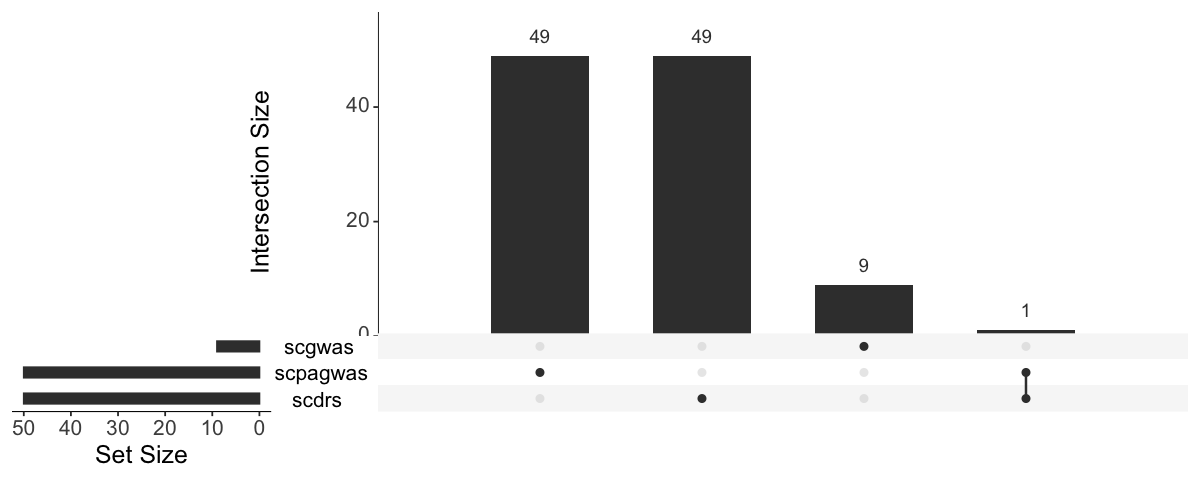

In [204]:
# C8
scg_cp = fread("~/Downloads/UC_scgwas_geneoverlap.tsv", skip=9, sep="\t")
scp_cp = fread("~/Downloads/UC_scpagwas_geneoverlap_top500.tsv", skip=9, sep="\t")
scdrs_cp = fread("~/Downloads/UC_scdrs_geneoverlap_top500.tsv", skip=9, sep="\t")
scdrs_cp[1:2,]
upset(fromList(list("scgwas"=scg_cp[["Gene Set Name"]], "scpagwas"=scp_cp[["Gene Set Name"]], "scdrs"=scdrs_cp[["Gene Set Name"]])), 
      nsets=3, text.scale=1.8)
length(unique(scdrs_cp$Description))
length(unique(scdrs_cp[["Gene Set Name"]]))
intersect(scp_cp[["Gene Set Name"]], scdrs_cp[["Gene Set Name"]])
print("scgpagwas only")
setdiff(scp_cp[["Gene Set Name"]], scdrs_cp[["Gene Set Name"]])

print("scdrs only")
setdiff(scdrs_cp[["Gene Set Name"]], scp_cp[["Gene Set Name"]])

In [180]:
fread("~/Downloads/UC_scgwas_geneoverlap_C8.tsv", skip=9, sep="\t")
# Lung plate
fread("~/Downloads/UC_scgwas_geneoverlap_CP.tsv", skip=9, sep="\t")
# Tight junction interactions, Leukocyte transendothelial migration, cell adhesion molecules

Warning message in fread("~/Downloads/UC_scgwas_geneoverlap_C8.tsv", skip = 9, sep = "\t"):
“Stopped early on line 17. Expected 7 fields but found 0. Consider fill=TRUE and comment.char=. First discarded non-empty line: <<Gene/Gene Set Overlap Matrix>>”


Gene Set Name                                                
1 TRAVAGLINI_LUNG_PLATELET_MEGAKARYOCYTE_CELL                  
2 AIZARANI_LIVER_C24_EPCAM_POS_BILE_DUCT_CELLS_3               
3 AIZARANI_LIVER_C4_EPCAM_POS_BILE_DUCT_CELLS_1                
4 AIZARANI_LIVER_C7_EPCAM_POS_BILE_DUCT_CELLS_2                
5 RUBENSTEIN_SKELETAL_MUSCLE_NK_CELLS                          
6 DESCARTES_FETAL_EYE_CORNEAL_AND_CONJUNCTIVAL_EPITHELIAL_CELLS
  # Genes in Gene Set (K)
1 605                    
2 185                    
3 191                    
4 219                    
5 226                    
6 244                    
  Description                                                                                                                       
1                                                                                                                                   
2                                                                                                                                   
3                                                                                                                                   
4                                                                                                                                   
5                                                                                                                                   
6 Marker genes curated from the annotated cluster as represented in the Descartes Human Gene Expression During Development database.
  # Genes in Overlap (k) k/K    p-value  FDR q-value
1 3                      0.0050 2.79e-05 0.0235     
2 2                      0.0108 1.86e-04 0.0453     
3 2                      0.0105 1.98e-04 0.0453     
4 2                      0.0091 2.61e-04 0.0453     
5 2                      0.0088 2.78e-04 0.0453     
6 2                      0.0082 3.23e-04 0.0453

Warning message in fread("~/Downloads/UC_scgwas_geneoverlap_CP.tsv", skip = 9, sep = "\t"):
“Stopped early on line 19. Expected 7 fields but found 0. Consider fill=TRUE and comment.char=. First discarded non-empty line: <<Gene/Gene Set Overlap Matrix>>”


Gene Set Name                                                
1 KEGG_MEDICUS_REFERENCE_TIGHT_JUNCTION_ACTIN_SIGNALING_PATHWAY
2 REACTOME_TIGHT_JUNCTION_INTERACTIONS                         
3 REACTOME_CELL_CELL_JUNCTION_ORGANIZATION                     
4 WP_7Q1123_COPY_NUMBER_VARIATION_SYNDROME                     
5 KEGG_LEUKOCYTE_TRANSENDOTHELIAL_MIGRATION                    
6 REACTOME_CELL_JUNCTION_ORGANIZATION                          
7 KEGG_TIGHT_JUNCTION                                          
8 KEGG_CELL_ADHESION_MOLECULES_CAMS                            
  # Genes in Gene Set (K)
1  37                    
2  30                    
3  90                    
4 106                    
5 116                    
6 117                    
7 132                    
8 133                    
  Description                                                                        
1 Pathway Definition from KEGG: (OCLN,CLDN) == TJP1 == CTTN == ARP2/3 == (ACTB,ACTG1)
2 Tight junction interactions                                                        
3 Cell-cell junction organization                                                    
4 7q11.23 copy number variation syndrome                                             
5 Leukocyte transendothelial migration                                               
6 Cell junction organization                                                         
7 Tight junction                                                                     
8 Cell adhesion molecules (CAMs)                                                     
  # Genes in Overlap (k) k/K    p-value  FDR q-value
1 3                      0.0811 6.03e-09 2.36e-05   
2 2                      0.0667 4.79e-06 9.39e-03   
3 2                      0.0222 4.40e-05 4.71e-02   
4 2                      0.0189 6.11e-05 4.71e-02   
5 2                      0.0172 7.32e-05 4.71e-02   
6 2                      0.0171 7.45e-05 4.71e-02   
7 2                      0.0152 9.48e-05 4.71e-02   
8 2                      0.0150 9.63e-05 4.71e-02

Observations: scDRS showed genes that were much stronger connecting to immunity:
* NF-KB
* JAK-STAT
* T-helper 17
* CD4+ alpha-beta T cell differentation
* Wnt signaling pathway
* fibroblast migration


In [126]:
#uc_scdrs_genes[1:2,]
paste0(uc_scpagwas_genes[uc_scpagwas_genes$RANK < 500,]$V1, collapse=",")

[1] "A2M,ACTB,ACTG1,ACTN1,ADAMDEC1,AGR2,AGR3,AIF1,ALDOA,ANAPC11,ANP32B,ANXA2,AP2S1,APOE,APP,APRT,ARPC3,ATP5B,ATP5C1,ATP5E,ATP5F1,ATP5G1,ATP5G2,ATP5G3,ATP5H,ATP5I,ATP5J2,ATP5L,ATP5O,BRI3,BRK1,BTF3,C12orf57,C14orf166,C14orf2,C15orf48,C17orf76-AS1,C19orf53,C1QA,C1QB,C1QBP,C1QC,C1R,C1S,C1orf162,C6orf48,CALD1,CALM2,CAPZB,CCNI,CD151,CD1E,CD9,CDC42EP5,CDX1,CEBPD,CFD,CFL1,CFP,CHCHD10,CHCHD2,CISD3,CLDN3,CLEC10A,CLEC4A,CLEC7A,CLTA,CNN3,COL1A1,COL1A2,COL3A1,COL6A1,COL6A2,COL6A3,COMMD6,COTL1,COX4I1,COX5B,COX6B1,COX6C,COX7A2,COX7B,COX7C,COX8A,CPVL,CSF1R,CST3,CSTA,CTSB,CTSK,CXCL1,CXCL2,CXCL3,CYC1,DBI,DCN,DDT,DEK,DNASE1L3,DSTN,EEF1A1,EEF1B2,EEF2,EGFR,EIF1AX,EIF3E,EIF3F,EIF3H,EIF3K,EIF3L,EIF3M,EIF4B,EIF4G2,EMILIN1,EMP2,ENO1,EPCAM,ERH,ESD,ETS2,FABP5,FAM26F,FAM3D,FAU,FBL,FBLN1,FCER1A,FCER1G,FCGR2A,FCGRT,FCN1,FKBP1A,FN1,FSTL1,FTH1,GAPDH,GAS5,GDI2,GGCT,GLTSCR2,GLUL,GNB2L1,GNG12,GNG5,GPX1,GPX2,GPX4,GRN,GSN,GSTO1,GSTP1,H2AFY,H3F3A,HCK,HEBP2,HES1,HIGD2A,HINT1,HLA-DPA1,HLA-DPB1,HLA-DQA1,HLA-DQB1,HLA-DRA,HLA-DRB1,HLA-DRB5,HMGA1,HMGB1,HMGN1,HMGN2,HNRNPA1,HNRNPA2B1,HNRNPA3,HNRNPC,HNRNPD,HNRNPK,HNRNPU,HSBP1,HSP90AB1,HSPD1,IER3,IFI30,IFITM3,IGFBP4,IGFBP5,IGFBP7,IGSF6,IL1B,IL6ST,IL8,IMPDH2,ITGB1,ITM2B,KIF5B,KLF4,KLF5,KRT18,LAMTOR4,LAPTM4A,LCN2,LDHA,LDHB,LEFTY1,LGALS2,LGALS3,LGALS3BP,LITAF,LSM3,LSM4,LSM5,LSM7,LST1,LUM,LYZ,MARCKS,MARCKSL1,MDH2,MEG3,MFAP4,MGST1,MGST2,MINOS1,MLEC,MLXIP,MMP2,MNDA,MORF4L1,MPEG1,MRPL12,MRPL20,MRPL23,MS4A6A,MS4A7,MT-ATP6,MT-CO1,MT-CO2,MT-CO3,MT-CYB,MT-ND1,MT-ND2,MT-ND3,MT-ND4,MT-ND5,MT-RNR1,MT-RNR2,MT1E,MYL6,MZT2B,NACA,NAP1L1,NBEAL1,NBL1,NCF2,NCL,NDUFA11,NDUFA4,NDUFB1,NDUFB2,NDUFB9,NDUFS5,NDUFS6,NEDD8,NFIC,NGFRAP1,NHP2,NNMT,NPM1,NSA2,NUCKS1,NUPR1,OLFM4,PA2G4,PABPC1,PCBD1,PCOLCE,PDLIM1,PEBP1,PFDN5,PFN1,PGLS,PHB,PHB2,PHLDA2,PIGR,PIK3CA,PKM,PLA2G2A,PLAUR,PMP22,POLR2L,POMP,PPA1,PPIA,PPP1R14B,PPP1R1B,PRAC1,PRDX5,PRKCA,PSMA4,PSMA7,PTGES3,PTMA,PTMS,PTP4A2,PYCARD,RAB13,RAB31,RAB32,RAB7A,RAC1,RAN,RANBP1,RARRES2,RBM3,RGS10,RHOA,RNF130,RP11-1143G9.4,RPL10,RPL10A,RPL11,RPL12,RPL13,RPL13A,RPL14,RPL15,RPL18,RPL18A,RPL19,RPL21,RPL22,RPL22L1,RPL23,RPL23A,RPL24,RPL26,RPL27,RPL27A,RPL28,RPL29,RPL3,RPL30,RPL31,RPL32,RPL34,RPL35,RPL35A,RPL36,RPL36A,RPL37,RPL37A,RPL38,RPL39,RPL4,RPL41,RPL5,RPL6,RPL7,RPL7A,RPL8,RPL9,RPLP0,RPLP1,RPLP2,RPS10,RPS11,RPS12,RPS13,RPS14,RPS15,RPS15A,RPS16,RPS18,RPS19,RPS2,RPS20,RPS21,RPS23,RPS24,RPS25,RPS26,RPS27,RPS27A,RPS28,RPS29,RPS3,RPS3A,RPS4X,RPS4Y1,RPS5,RPS6,RPS7,RPS8,RPS9,RPSA,RPSAP58,RSL1D1,RTN4,S100A10,S100A11,S100A13,S100A16,S100A4,S100A6,S100A9,S100P,SAMHD1,SEC11A,SEPW1,SERBP1,SERF2,SERPINB1,SERPINF1,SERPING1,SET,SF3B14,SFPQ,SH3BGRL3,SHFM1,SKP1,SLC12A2,SLC25A3,SLC25A5,SLC25A6,SLIRP,SNHG5,SNHG6,SNRPB,SNRPD1,SNRPD2,SNRPE,SNRPF,SNRPG,SNX3,SOD1,SOD2,SOD3,SOX4,SPARC,SPI1,SPINK1,SRP14,SRSF3,SSBP1,ST13,STARD10,STMN1,STRA13,SUMO2,TAGLN2,TALDO1,TBCA,TCEB2,TFF3,TGFBI,THY1,TIMM13,TIMM8B,TIMP2,TKT,TM9SF3,TMA7,TMEM123,TMEM176A,TMEM176B,TMSB10,TMSB4X,TNFSF13B,TOMM20,TOMM22,TOMM7,TPI1,TPM1,TPM2,TPM3,TPT1,TSPAN8,TSPO,TUBA1B,TUBB,TXN,TYROBP,UBA52,UQCR10,UQCR11,UQCRB,UQCRC2,UQCRQ,USMG5,UXT,VCAN,VDAC1,VDAC2,VSIG4,WFDC2,YBX1,YBX3,YWHAB,YWHAE,YWHAZ,ZFAS1"

## Evaluate the possible biases from ribosomal genes
* Graph the expression of the ribosomal genes called by scpgwas and the zscores of the cells (violin and correlation)
* Grpah the ribosomal genes expression of the cell types called significant compared to those not (boxplot)

In [129]:
# Get the ribosomal genes
# read in the normalized expression


Attaching package: ‘gridExtra’


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:BiocGenerics’:

    combine


The following object is masked from ‘package:dplyr’:

    combine




## GO output:
- scDRS top 100

In [90]:
uc_graph_df[uc_graph_df$gene %in% uc_df$genes]$CORR

NULL

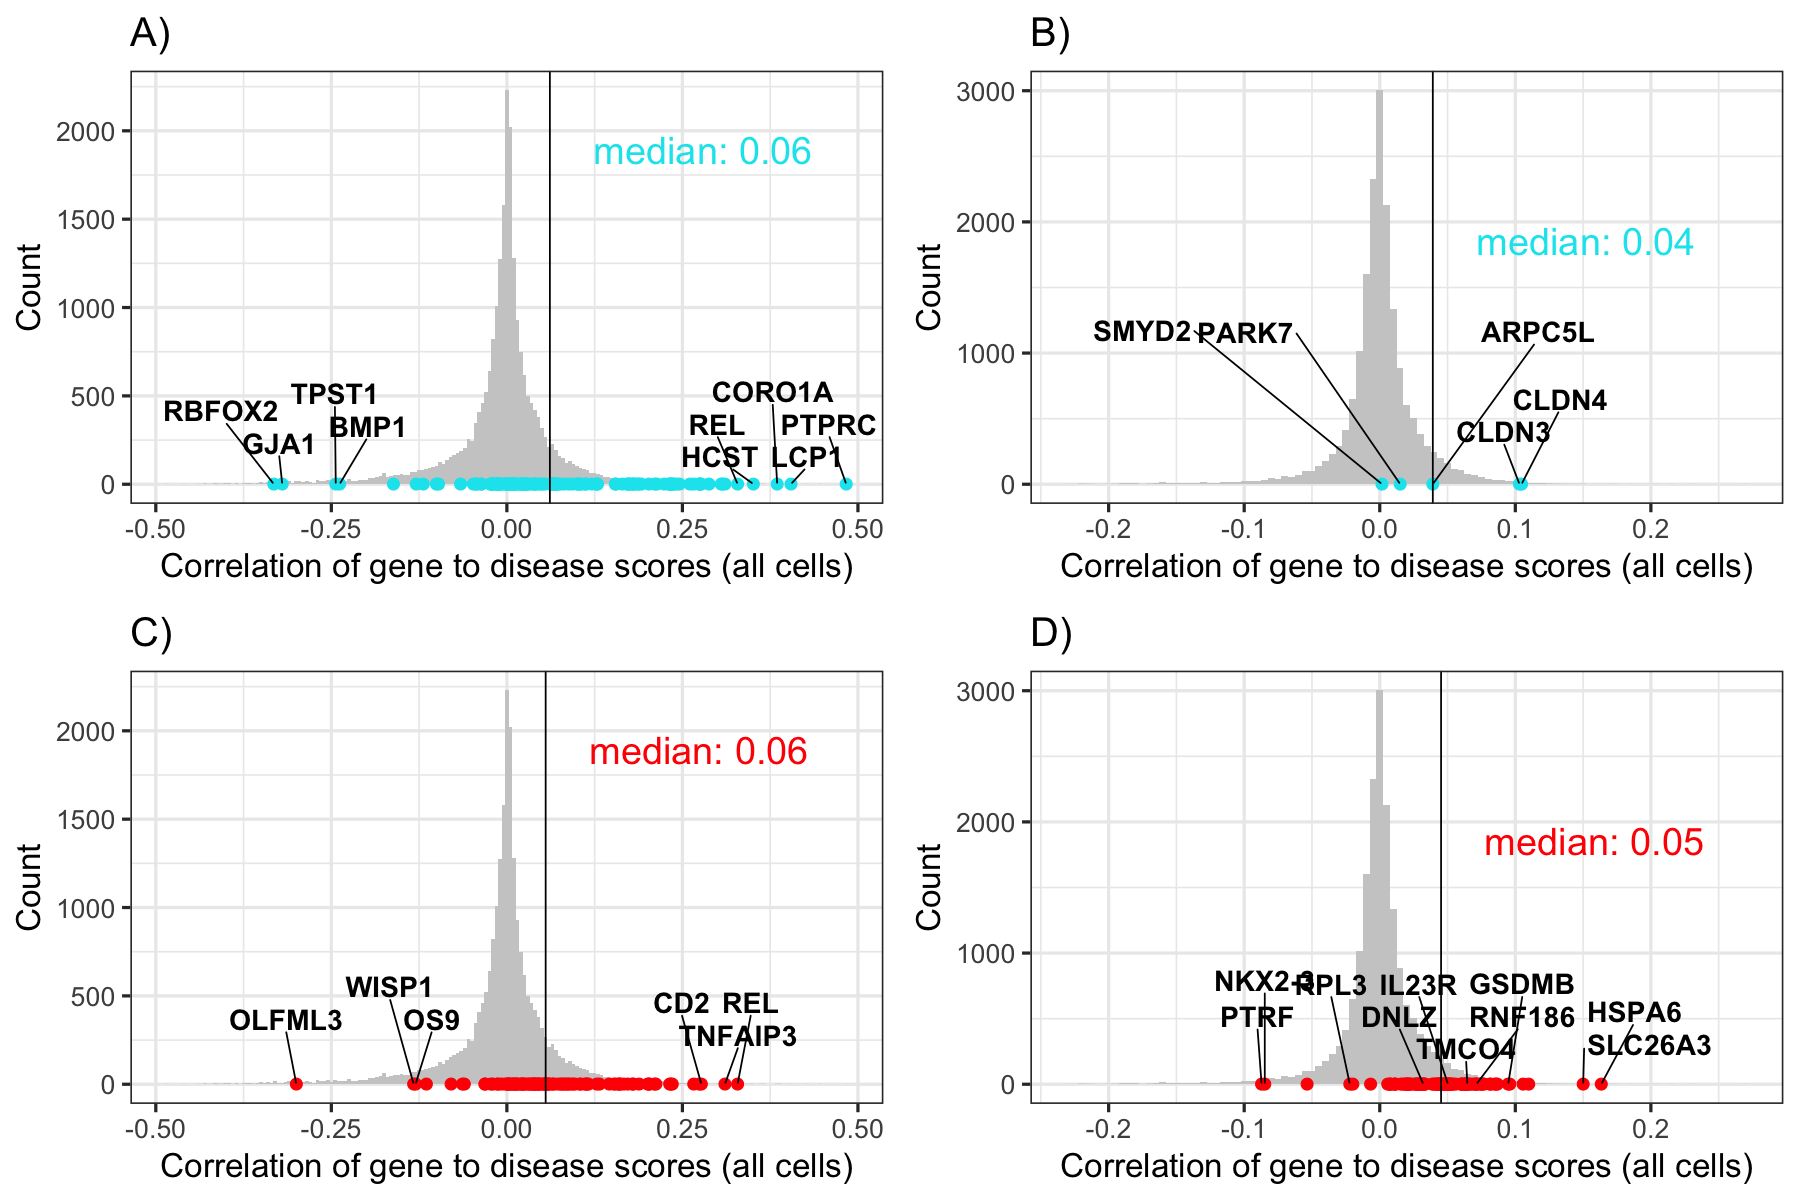

In [39]:
options(repr.plot.height = 10, repr.plot.width =15 )
p <- plot_grid(p33, p1, p44, p2, nrow=2)
p

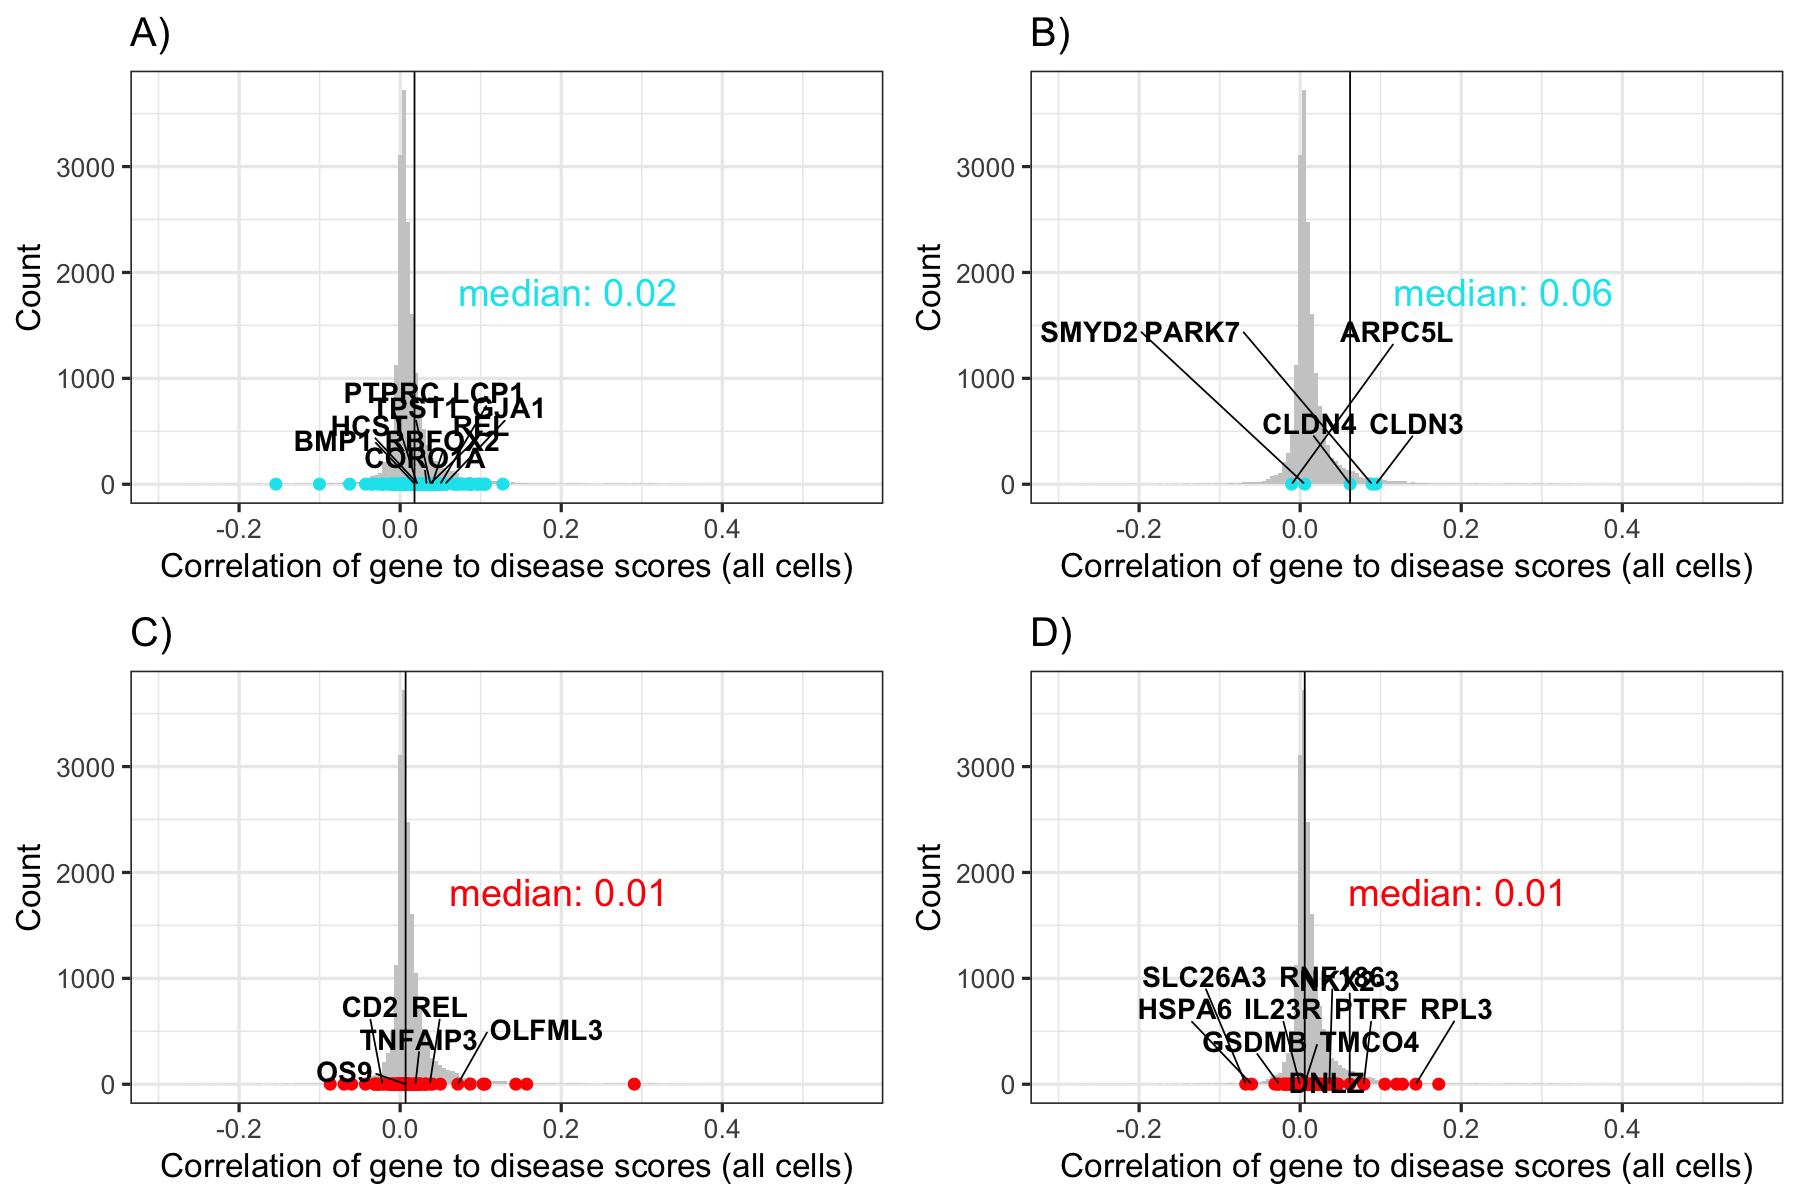

In [53]:
options(repr.plot.height = 10, repr.plot.width =15 )
p <- plot_grid(p33, p1, p44, p2, nrow=2)
p

In [51]:
uc_scpagwas_genes[1:2,]
colnames(uc_scpagwas_genes) <- c("V1", "CORR", "RANK", "RANK_abs")
colnames(ra_scpagwas_genes) <- c("V1", "CORR", "RANK", "RANK_abs")

V1    CORR      RANK RANK_abs
1 RPS24 0.5553919 0    0       
2 RPL23 0.3940468 1    1

In [52]:
# plot all correlation values and see where the scGWAS genes are
p1 <- ggplot() + geom_histogram(data=uc_scpagwas_genes, aes(x=CORR), binwidth=0.005, fill="grey80") + 
geom_point(data=uc_scpagwas_genes[uc_scpagwas_genes$V1 %in% uc_df$genes], color="turquoise2", aes(x=CORR, y=1), size=3) + 
labs(x="Correlation of gene to disease scores (all cells)", y="Count") + ggtitle("B) ") +
# geom_text_repel(data=scdrs_genes[scdrs_genes$V1 %in% c("LMNA", "CD2", "PTPRC", "CORO1A", "HCST", "REL", "CXCR4", "TNFAIP3")],
#                 aes(x=CORR, y=1, label=V1), vjust=-2.5, size=4.5, fontface="bold") +
geom_text_repel(data=uc_scpagwas_genes[uc_scpagwas_genes$V1 %in% c("CLDN3", "CLDN4")],
                aes(x=CORR, y=1, label=V1), vjust=-2.5, size=6, fontface="bold") +
geom_text_repel(data=uc_scpagwas_genes[uc_scpagwas_genes$V1 %in% c("PARK7", "SMYD2")],
                aes(x=CORR, y=1, label=V1), hjust=2.5, vjust=-7, size=6, color="black", fontface="bold") +
geom_text_repel(data=uc_scpagwas_genes[uc_scpagwas_genes$V1 %in% c( "ARPC5L")],
                aes(x=CORR, y=1, label=V1), hjust=-0.4, vjust=-7, size=6, fontface="bold") +
theme_bw(base_size=20) + 
geom_vline(xintercept=median(uc_scpagwas_genes[uc_scpagwas_genes$V1 %in% uc_df$genes]$CORR)) + 
geom_text(vjust=1.2, hjust=-0.2, size=8,color="turquoise2", aes(x=median(uc_scpagwas_genes[uc_scpagwas_genes$V1 %in% uc_df$genes]$CORR),y=2000, 
                                                                label=paste("median:", round(median(uc_scpagwas_genes[uc_scpagwas_genes$V1 %in% uc_df$genes]$CORR), 2))))

# plot all correlation values and see where the scGWAS genes are
p2 <- ggplot() + geom_histogram(data=uc_scpagwas_genes, aes(x=CORR), binwidth=0.005, fill="grey80") + 
geom_point(data=uc_scpagwas_genes[uc_scpagwas_genes$V1 %in% uc_magma_genes_5035$GENE[1:100]], color="red", fill="red", aes(x=CORR, y=1), size=3) + 
labs(x="Correlation of gene to disease scores (all cells)", y="Count") + ggtitle("D)") +
geom_text_repel(data=uc_scpagwas_genes[uc_scpagwas_genes$V1 %in% c("RPL3", "PTRF", "SLC26A3", "HSPA6", "RNF186", "IL23R", "TMCO4", "DNLZ", "GSDMB")], 
                aes(x=CORR, y=1, label=V1), vjust=-3, size=6, fontface="bold") +
geom_text_repel(data=uc_scpagwas_genes[uc_scpagwas_genes$V1 %in% c("NKX2-3")], 
                aes(x=CORR, y=1, label=V1), vjust=-4.6, size=6, fontface="bold") +
theme_bw(base_size=20) + 
geom_vline(xintercept=median(uc_scpagwas_genes[uc_scpagwas_genes$V1 %in% uc_magma_genes_5035$GENE[1:100]]$CORR)) + 
geom_text(hjust=-0.2, vjust=1.2, size=8,color="red", aes(x=median(uc_scpagwas_genes[uc_scpagwas_genes$V1 %in% uc_magma_genes_5035$GENE[1:100]]$CORR),y=2000, 
                                              label=paste("median:",round(median(uc_scpagwas_genes[uc_scpagwas_genes$V1 %in% uc_magma_genes_5035$GENE[1:100]]$CORR), 2))))

# plot all correlation values and see where the scGWAS genes are
p33 <- ggplot() + geom_histogram(data=ra_scpagwas_genes, aes(x=CORR), binwidth=0.005, fill="grey80") + 
geom_point(data=ra_scpagwas_genes[ra_scpagwas_genes$V1 %in% ra_df$genes], color="turquoise2", aes(x=CORR, y=1), size=3) + 
labs(x="Correlation of gene to disease scores (all cells)", y="Count") + ggtitle("A)") +
# geom_text_repel(data=scdrs_genes[scdrs_genes$V1 %in% c("LMNA", "CD2", "PTPRC", "CORO1A", "HCST", "REL", "CXCR4", "TNFAIP3")],
#                 aes(x=CORR, y=1, label=V1), vjust=-2.5, size=4.5, fontface="bold") +
geom_text_repel(data=ra_scpagwas_genes[ra_scpagwas_genes$V1 %in% c("PTPRC", "LCP1", "CORO1A", "HCST", "REL")],
                aes(x=CORR, y=1, label=V1), vjust=-2.5, size=6, fontface="bold") +
geom_text_repel(data=ra_scpagwas_genes[ra_scpagwas_genes$V1 %in% c("RBFOX2", "GJA1", "TPST1", "BMP1")],
                aes(x=CORR, y=1, label=V1), hjust=.5, vjust=-2.5, size=6, color="black", fontface="bold") +
# geom_text_repel(data=scdrs_genes[scdrs_genes$V1 %in% c( "ARPC5L")],
#                 aes(x=CORR, y=1, label=V1), hjust=-0.4, vjust=-7, size=4.5, color="black", fontface="bold") +
theme_bw(base_size=20) + 
geom_vline(xintercept=median(ra_scpagwas_genes[ra_scpagwas_genes$V1 %in% ra_df$genes]$CORR)) + 
geom_text(vjust=1.2, hjust=-0.2, size=8,color="turquoise2", aes(x=median(ra_scpagwas_genes[ra_scpagwas_genes$V1 %in% ra_df$genes]$CORR),y=2000, 
                                                                label=paste("median:", round(median(ra_scpagwas_genes[ra_scpagwas_genes$V1 %in% ra_df$genes]$CORR), 2))))

# plot all correlation values and see where the scGWAS genes are
p44 <- ggplot() + geom_histogram(data=ra_scpagwas_genes, aes(x=CORR), binwidth=0.005, fill="grey80") + 
geom_point(data=ra_scpagwas_genes[ra_scpagwas_genes$V1 %in% ra_magma_genes_5035$GENE[1:100]], color="red", fill="red", aes(x=CORR, y=1), size=3) + 
labs(x="Correlation of gene to disease scores (all cells)", y="Count") + ggtitle("C) ") +
geom_text_repel(data=ra_scpagwas_genes[ra_scpagwas_genes$V1 %in% c("OLFML3", "WISP1", "OS9", "REL", "TNFAIP3", "CD2")], 
                aes(x=CORR, y=1, label=V1), vjust=-3, size=6, fontface="bold") +
# geom_text_repel(data=scdrs_genes[scdrs_genes$V1 %in% c("NKX2-3")], 
#                 aes(x=CORR, y=1, label=V1), vjust=-4.5, size=4.5, fontface="bold") +
theme_bw(base_size=20) + 
geom_vline(xintercept=median(ra_scpagwas_genes[ra_scpagwas_genes$V1 %in% ra_magma_genes_5035$GENE[1:100]]$CORR)) + 
geom_text(hjust=-0.2, vjust=1.2, size=8,color="red", aes(x=median(ra_scpagwas_genes[ra_scpagwas_genes$V1 %in% ra_magma_genes_5035$GENE[1:100]]$CORR),y=2000, 
                                              label=paste("median:",round(median(ra_scpagwas_genes[ra_scpagwas_genes$V1 %in% ra_magma_genes_5035$GENE[1:100]]$CORR), 2))))

In [33]:
paste0(ra_magma_genes_5035$GENE[1:500], collapse=",")

[1] "COG6,ANKRD55,SPRED2,MAGI3,AP4B1,DCLRE1B,OLFML3,STAT4,TNPO3,REL,CCR6,PLCL2,PTPN2,GATA3,FCGR2A,IL2RA,RAVER1,FAM213B,MMEL1,DDX6,C5orf30,TNFAIP3,CD28,NAB1,SUOX,PHTF1,RSBN1,PTPN22,BCL2L15,HIPK1,CTLA4,IRF5,RAB5B,ZGLP1,WISP1,ARID5B,PADI4,CD40,PRKCQ,TXNDC11,FDX2,AFF3,UBE2L3,ZPBP2,TRAF1,PHF19,ICAM3,CDK2,IFNGR2,SNN,ERBB3,CCDC116,RASGRP1,PLGRKT,RPL3,GSDMB,SPC24,ICOS,TM6SF2,IKZF4,FLT3,ERBB2,NFKBIE,HSPA6,ICOSLG,HAPLN4,RPS26,YDJC,PGAP3,CCL21,PEMT,FAM205A,OS9,EBF1,AGAP2,PSD4,TMEM191C,RUNX3,RPL6,CD5,ORMDL3,RBM17,IL6R,YRDC,TEC,CILP2,GTF2I,PDE4A,TMEM265,TYK2,SYNGR1,C1orf122,SLC44A2,YJEFN3,TCAP,PTPN11,NDUFA13,ADAD1,TMEM258,PHLDB1,TMEM50B,SUGP1,BLK,PLCL1,HELZ2,IL21,GATAD2A,TSPAN14,NPIPB9,PUS10,VPS37C,PFKFB3,PADI2,MFAP2,SDCCAG8,ATP13A2,SYT6,CUX2,TFAP2C,ACAD10,ATP2A1,TXK,BOLA2,UBE2Q1,PRR14,KRI1,ZNF629,ANTXR2,KLF2,MAU2,FBXL20,FEN1,YAF2,ICAM5,CORO1A,TRAF6,ZAR1,CFLAR,B4GALNT1,CDK12,TDRD10,PA2G4,FBRS,SDHB,NCAN,FRYL,TGOLN2,SHE,TRAFD1,BOLL,MIEN1,BCL7C,PHETA1,TAGAP,RABEP2,SH2B1,GNG4,NCF1,ALDH2,METTL1,ATG4D,HOXA1,IL2,RPL41,TNFSF18,SLC10A4,TUFM,TSFM,NCOA5,HECTD4,EEF1AKMT3,ADAMTSL1,BET1L,INAVA,SH2B3,TTC34,CD247,KIF5A,TAF3,SLC26A10,ITPKA,ELL2,SMIM29,TMEM116,JAZF1,ICAM1,RIC8A,ATXN2L,OTULIN,CXCL17,ERP29,PSMD13,CDKN2D,ASAP1,RNASET2,IL12RB2,MANEAL,PPARG,ACOXL,SCIMP,SEMA6D,ZC3H10,MAPK3,NEK6,FAM213A,NAA25,ZBTB46,PRSS48,GMEB2,TNFSF4,ICAM4,ARHGEF25,PRCC,RIN3,MAPKAPK5,MYRF,CDC37,SLC51A,GIN1,POLR3B,RIMBP3C,TAL1,ATXN2,FCAMR,STAT1,ALS2CR12,IL2RB,EOMES,LIPE,HSPA12B,CASP8,RAG1,FCRL3,ODF3,GATD3A,USP6,PEAK1,HIBCH,ZNF232,NYAP2,PPIP5K2,MKRN2,SLAIN2,KDM4B,DYDC1,CDK6,RPS7,CACNB4,KSR1,ARMC2,ZNF146,ZNF565,KIAA1109,NTRK1,KLLN,MKRN2OS,RGS19,TFCP2,TMEM151B,MFSD6,SIRT3,PIGR,PHKG2,FGFR1OP,BANK1,C11orf97,LTK,TMED5,DYDC2,PAQR8,INPP1,CD274,LKAAEAR1,JADE2,ZNF594,ULBP3,INPP5B,INSRR,OCIAD1,CEP170,PDIK1L,TNFRSF11A,CCDC18,CCRL2,SLX1A,ESYT1,RFTN2,PDP2,C5,ZC3H11A,PCNA,ART5,CD19,DNAJC28,HMG20A,PSTPIP1,PTPRC,ZBTB21,RPS27,CYP3A4,CLN3,FNDC11,PLCB3,SH3D19,KLF3,ZFP14,AVIL,ETV7,HSPBP1,SCGB1C2,MARS2,APOBR,STARD3,RNF40,SLC35B2,TCP11L2,ZFP82,DNLZ,SIGLEC1,NDUFS1,PLEKHA1,S1PR5,TNFSF9,KTN1,LITAF,NIPAL1,LPAR2,LONRF2,GRB7,FAM167A,BAD,GFI1,POU6F1,ACTR2,SLC2A9,ZNF394,ATP5MF,GMIP,C7orf66,KEAP1,CD79B,TCF7,SLC9B1,ABCC12,CHRNA9,SLCO4C1,TRIM47,LAX1,CPSF4,RAB14,ANKRD49,SNX13,ARHGAP31,ATP5MF-PTCD1,PCYT1A,PIGN,CNTRL,SIGLEC6,ARHGEF26,ZNF592,AARS2,ZC3H7A,CARD9,NUSAP1,CHRNB2,KLF13,ABHD16B,ZNF789,ATG5,ARID2,NDUFAF1,BAG1,RTF1,FAM126B,ZDHHC19,SLU7,MTF2,SPINK4,FAM200A,GNB1,CCDC189,RETSAT,RASA2,C2CD6,SOCS1,GART,SEC16B,MRPS31,PSMD14,ASCC3,NEMP2,TRAM1L1,HORMAD2,PTCD1,CD2,C1orf146,CCR3,EPHA10,GFRAL,RERE,GLI1,TCEA2,SMIM13,AMER3,GPR137,FAM237A,SCN4A,ZNF416,ACAD11,RIC1,HIC2,SIM1,PPHLN1,GDPD3,APH1A,MRE11,ZCRB1,EEF1B2,CARD11,CFDP1,CHD7,ZNF655,TRAM2,SCAF11,RBM23,MAT1A,KDM7A,STMN3,SLTM,CAPSL,IL17C,ARHGAP1,IL1R1,CASP10,NFATC2IP,NPIPB6,LRRC3C,PPP1R14B,FAM45A,HSPB6,TNFRSF14,CACNA1S,PEX13,KIF21B,KANK2,EXD1,TCTE1,NDUFB3,TMEM145,SGF29,FOXO1,AP1M2,ZNF438,KRT24,PXT1,STAM2,CCDC88B,MAB21L2,ZBED8,DNMT3L,ZKSCAN5,HCLS1,CXCR5,DBNDD1,CHMP5,CTF1,NUPR1,LGR5,MIEF2,SULT1A1,SMARCE1,INPP5A,CDR2L,SMIM14,LRBA,TMEM170A,ST3GAL4,MDH2,HOXA2,FKBP2,TCTEX1D2,PADI3,MTMR3,KPRP,CD226,MEGF8,ZIK1,DCST2,OIP5,SON,PRMT5,GAK,GH1,SMAD3,DTX3,LY6E,DR1,WBP2,TRIM65,CPNE7"

In [34]:
paste0(uc_magma_genes_5035$GENE[1:500], collapse=",")

[1] "IFNG-AS1,APEH,GPX1,CTB-13F3.1,AMT,CARD9,RHOA,HSPA6,NKX2-3,DAG1,TCTA,TNFSF15,LAMB1,STK4,SLC26A3,DNLZ,RNF123,SDCCAG3,IL10,BSN-AS2,GSDMB,C1orf106,FCGR3A,JAK2,C3orf62,IP6K2,RP13-131K19.6,RP11-168O16.1,SLC26A6,REL,ORMDL3,IMPDH2,KIF21B,STAT3,TMCO4,RP3-395M20.8,CELSR3,TNFRSF14,IL23R,USP4,RP3-395M20.9,NOTCH1,TRAIP,NCKIPSD,DALRD3,GMPPB,RP11-94L15.2,KIAA1841,RNF186,RP11-91K11.2,OTUD3,FCGR2A,PUS10,NICN1,FAM3A,SNAPC4,RPL3,IP6K1,GSDMA,NDUFAF3,C9orf163,AP001058.3,SEC16A,RP11-194N12.2,MON1A,MST1R,RBM6,QRICH1,GPSM1,RP11-431K24.1,FAM212A,STAT5B,FAM213B,UBA7,GPR35,RBM5,CCL20,GNA12,RP11-400F19.18,RP3-395M20.12,PEX13,MMEL1,CSF3,C11orf30,HES5,PSMD3,NR5A2,ZFP90,KLHDC8B,IL19,RP13-131K19.7,IRF5,TPPP,STAT5A,RP3-333H23.8,GRB7,PARK7,RGS14,CAMSAP2,MTMR3,SMARCE1,CD274,IL12RB2,RP11-355B11.2,USP34,GNG8,TTC34,HOXA11,SEMA3F,SLC35D1,TOM1,CXCL5,C5orf55,SERBP1,UBLCP1,HOXA11-AS,MTX1,THBS3,RP11-263K19.4,PANK4,RORC,ERRFI1,P4HTM,SMAD3,ARIH2OS,CLN3,TRIM46,CEP72,KRT222,ANKMY1,USP19,AC003104.1,CXCR2,APOBR,QARS,CTD-2589H19.6,ICOSLG,AHSA2,LINC00035,ARIH2,ABHD11,RP11-1348G14.4,NPIPB6,CLDN4,DACT3,WBSCR27,LPP,LEF1,UQCRC1,HOXA13,PTGIR,ITGAL,RP11-111M22.3,ZNF300,RP11-22P6.3,MAP3K8,ERBB2,PF4,CLDN3,KRTCAP2,COL7A1,EXOC3,ATXN2L,SUMO4,HMGXB4,LPXN,PRKAR2A,LMAN2,C1orf222,IKZF3,MIEN1,PRKCB,RP11-22P6.2,CCDC101,SH2B1,AC016747.3,PFKFB4,ATP6V0A1,RP11-441O15.3,C2orf74,PTPN2,BOLA2,WDR6,RP11-305L7.6,UQCR10,TUFM,UBE2L3,AAMP,C5orf56,PIM3,ZDHHC11B,NXPE4,HOTTIP,HOXA10,SAMSN1,XPO1,RP4-758J18.2,FYB,PGAP3,TET2,EFNA1,CH25H,TMBIM1,ITPKA,NTAN1,AC116366.6,DAGLB,CCRL2,ZMAT5,CCDC71,SYNGR1,TRAF3IP2,GATA3,ZFP91,RNPEPL1,TNPO3,AHRR,ANKRD65,SULT1A2,SULT1A1,CD19,PEMT,NCF1,RP11-373D23.2,CCNL2,TMEM52,DNMT3A,SLX1A,RP11-126L15.4,FAM220A,CASC3,RP11-517H2.6,LINC00511,RAPGEFL1,TRPS1,GPC1,YDJC,SLC12A9,NUPR1,THRA,LSP1,MIER1,ASCC2,YEATS4,VWA1,ACAP3,MRPL20,TRAF3IP3,NR4A1,RAB7L1,REV3L,HORMAD1,SLC50A1,NXPE1,SHISA5,CTA-714B7.5,PSEN2,IL1RL1,MSL1,ACHE,ZSCAN9,RABEP2,PLCG2,ARPC2,GLCCI1,RNF145,MXRA8,OIP5,CFDP1,PTRF,PRKAR2A-AS1,CTSS,AUH,CADM2,SATB2,CORO1A,RP11-455F5.5,BRD7,GBA,NUSAP1,OSMR,PIDD,AC010883.5,OIP5-AS1,DERL1,GNB1,TCAP,NF2,ATAD3C,RP11-305L7.3,TOP2A,RP4-758J18.13,PRELID1,NAGLU,SLC25A22,ADCY3,FAM26F,RP13-131K19.1,RP5-1136G13.2,GPBAR1,RP11-421L21.3,NOB1,TLN2,FAM132A,ITLN1,TALDO1,FGFR1OP,GOLPH3L,FAM198B,STRN4,ZNF428,TNS4,P4HA2,SOCS1,ITGB1BP1,UFSP1,CISD2,TMEM170A,RPLP2,PUSL1,RTF1,HIST1H4K,LTK,TUBG1,RP11-252K23.2,HIST1H4J,SLC9B1,NDUFAF7,CUL2,DPM3,TRIP6,CHAC1,NFATC2IP,NUCKS1,FAM189B,UBE2D3,RP11-98D18.9,CRTC3,PPIL4,RP11-18I14.10,SRRT,PDDC1,MANBA,FAM26E,C2CD4D,HIST1H2AL,CCR5,FAM53B,IGFBP4,ZC3H4,ST5,TNFSF8,TBC1D1,PTRHD1,ORAOV1,USP36,RP11-10L12.4,HIST1H1B,SCAMP3,TSPAN14,HIST1H3I,EPHB4,CPSF3,TAB2,RP11-514O12.4,RP11-214N9.1,SMG7,SLC25A20,SCNN1D,ARHGAP22,NDFIP1,TFR2,UBE2J2,CERS2,PDXDC1,CTD-3193K9.4,CCDC153,HHEX,RWDD1,PCOLCE,SETDB1,RNASET2,SLC41A1,RP11-400F19.6,PPP1R1B,CTD-2228K2.5,CBL,SELP,CENPO,TRPA1,GTF2IRD2B,MOSPD3,FOSL2,ITGB8,FAIM3,NDUFAF1,THADA,RP1-28O10.1,CREM,SLC39A11,CADM4,RP11-378A13.1,RP1-166H4.2,IL1R2,ATL1,METTL10,ZC3H12D,IPO8,HIST1H4I,CTD-2267D19.2,RP11-421L21.2,KPNA1,ITLN2,ESPN,RP11-383H13.1,AC093157.1,CNTNAP1,CDKN1A,ZNHIT1,WNT2,RARA,NKD1,HSD17B1,RP11-324I22.3,DPH5,HSD11B1,NCR3LG1,RP11-1055B8.7,MAPKAPK2,BACH2,TMEM160,ZNF431,RN7SKP16,NADK,DUSP8,TGFBR2,AC004069.2,DDX59,AP006621.5,SLC9B2,ATP1B3,SMURF1,KPNA2,BDKRB2,AF213884.2,LTF,IRF2BP2,CPEB3,SELL,RP11-305L7.7,CDC6,C1orf112,RAMP2,CLDN15,TMEM180,FOXP1,RP1-140A9.1,PRKD3,RAMP2-AS1,CORO2A,PGBD1,RP11-215G15.5,DET1,CALM3,SCNN1B,MXD3,CTA-293F17.1,BOK-AS1,NFKB1,TRIM14,NPAS1,GLI1,KRTAP5-AS1,WDR5B,GAB2,IRF6,TDRKH,RP11-299J3.8,CCND3,CROCCP2,RP11-452H21.4,NCF2,RAB24,NUCB2,TMEM150B,SSU72,PHC2,IFNG,TRIM73,ZKSCAN3,IL18RAP,KDELR2,TMA7,CD44,SELE,CYTH1,CLECL1,STARD3,KSR1,NARS2"

In [ ]:

# add labels for annotations
ra_df$category <- ifelse(ra_df$genes %in% ra_df[ra_df$rank > 1000,]$genes, 0, 1)
ra_df$category <- as.factor(ra_df$category)

# create the labels 
ra_my_labels <- glue_data(
  ra_df, 
  "<span style='color: {if_else(category==0, 'red', 'black')}'>{genes}</span>"
  )
names(ra_my_labels) <- ra_df$genes

# add labels for annotations
uc_df$category <- ifelse(uc_df$genes %in% uc_df[uc_df$rank > 1000,]$genes, 0, 1)
uc_df$category <- as.factor(uc_df$category)

# create the labels 
uc_my_labels <- glue_data(
  uc_df, 
  "<span style='color: {if_else(category==0, 'red', 'black')}'>{genes}</span>"
  )
names(uc_my_labels) <- uc_df$genes